In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
# import sympy
import scipy.stats as st
import scipy.special
import pandas
import csv
import math
import multiprocessing as mp
import datetime
from decimal import *
from mpl_toolkits.mplot3d import Axes3D
# from google.colab import drive

## **Google Drive**

In [12]:
# connect to google drive to save the csv file
# drive.mount('drive')
# os.chdir("drive/My Drive/Yen-Ting Lin/Code")

## **Back-off Calculation**

### **Retransmission at same RAP**

In [2]:
# alpha with i
def find_kmin(T_RAREP, T_RAR, W_RAR, W_BO, i):
  return np.ceil((i - 1) + ((1 - (T_RAR + W_RAR + W_BO)) / T_RAREP))
  # return np.ceil((i - 1) - (((T_RAR + W_RAR + W_BO) - 1) / T_RAREP)) # same equation

def find_kmax(T_RAREP, T_RAR, W_RAR, W_BO, i):
  return np.floor(i - ((T_RAR + W_RAR + 1) / T_RAREP))

def find_alpha(T_RAREP, T_RAR, W_RAR, W_BO, i, k, kmin, kmax):
  if kmin <= k <= (i - ((T_RAR + W_RAR + W_BO) / T_RAREP)):
    return (((k - 1) * T_RAREP) + T_RAR + W_RAR + W_BO - ((i - 2) * T_RAREP)) / W_BO
  elif (i - ((T_RAR + W_RAR + W_BO) / T_RAREP)) < k < ((i - 1) - ((T_RAR + W_RAR) / T_RAREP)):
    return ((T_RAREP) / W_BO)
  elif ((i - 1) - ((T_RAR + W_RAR) / T_RAREP)) <= k <= kmax:
    return (((i - 1) * T_RAREP) - (((k - 1) * T_RAREP) + T_RAR + W_RAR)) / W_BO
  else:
    return 0

### **Retransmission of fallback RAP**

In [3]:
def find_jmin(T_RAREP_4sra, T_RAREP_2sra, T_RAR, W_RAR, i):
  return np.ceil((((i - 2) * T_RAREP_4sra) + T_RAR + W_RAR - 1) / T_RAREP_2sra) + 1

def find_jmax(T_RAREP_4sra, T_RAREP_2sra, T_RAR, W_RAR, i):
  return np.floor((((i - 1) * T_RAREP_4sra) + T_RAR + W_RAR - 2) / T_RAREP_2sra) + 1

## **Main Function**

In [12]:
def main(retrans_4sra, retrans_2sra, retrans_FB, W_BO_4sra, W_BO_2sra, W_BO_FB, N_4SRA, N_2SRA):
  # initail number of fallback UE
  M_FB = [0.0 for i in range(0, M - 1)]

  Ms_4SRA_list = [0.0 for i in range(0, len(M_4SRA))]
  Mf_4SRA_list = [0.0 for i in range(0, len(M_4SRA))]
  Ps_4SRA_list = [0.0 for i in range(0, len(M_4SRA))]
  Da_4SRA_list = [0.0 for i in range(0, len(M_4SRA))]
  Ur_PRACH_4SRA_list = [0.0 for i in range(0, len(M_4SRA))]
  Ur_PUSCH_4SRA_list = [0.0 for i in range(0, len(M_4SRA))]
  MiSn_4SRA_list = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
  # MiSn_4SRA_list = [0.0 for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]

  Ms_2SRA_list = [0.0 for i in range(0, len(M_2SRA))]
  Mf_2SRA_list = [0.0 for i in range(0, len(M_2SRA))]
  Ps_2SRA_list = [0.0 for i in range(0, len(M_2SRA))]
  Da_2SRA_list = [0.0 for i in range(0, len(M_2SRA))]
  Ur_PRACH_2SRA_list = [0.0 for i in range(0, len(M_2SRA))]
  Ur_PUSCH_2SRA_list = [0.0 for i in range(0, len(M_2SRA))]
  MiSn_2SRA_list = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
  # MiSn_2SRA_list = [0.0 for i in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra) + 1)]

  Ms_FB_list = [0.0 for i in range(0, len(M_4SRA))]
  Mf_FB_list = [0.0 for i in range(0, len(M_4SRA))]
  Ps_FB_list = [0.0 for i in range(0, len(M_4SRA))]
  Da_FB_list = [0.0 for i in range(0, len(M_4SRA))]
  Ur_PRACH_FB_list = [0.0 for i in range(0, len(M_4SRA))]
  Ur_PUSCH_FB_list = [0.0 for i in range(0, len(M_4SRA))]
  MiSn_FB_list = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
  # MiSn_FB_list = [0.0 for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]

  Ms_T_list = [0.0 for i in range(0, M - 1)]
  Ps_T_list = [0.0 for i in range(0, M - 1)]
  Da_2SRA_T_list = [0.0 for i in range(0, M - 1)]
  Da_T_list = [0.0 for i in range(0, M - 1)]
  Ur_PRACH_T_list = [0.0 for i in range(0, M - 1)]
  Ur_PUSCH_4SRA_T_list = [0.0 for i in range(0, M - 1)]
  Ur_PUSCH_T_list = [0.0 for i in range(0, M - 1)]
  Wr_PUSCH_4SRA_T_list = [0.0 for i in range(0, M - 1)]
  Wr_PUSCH_2SRA_list = [0.0 for i in range(0, M - 1)]
  Wr_PUSCH_T_list = [0.0 for i in range(0, M - 1)]
  MiSn_T_list = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
  # MiSn_T_list = [0.0 for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]

  Slot = [i for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
  # Slot = [i for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]
  Mi_FB_list = [0.0 for i in range(0, len(Slot))]
  
  j_list = [0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
  j_start = 0.0

  for ue in range(0, M - 1):
    if opt_time_test == "off" and opt_resource_test == "off":
      print("ue : ", M_2SRA[ue] + M_4SRA[ue])
    # initial the MiSn and MiFn: Mi[slot][num of trans + 1]
    # the last time of retrans needed to be ignored
    '''
    MiCn_4SRA = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]
    MiSn_4SRA = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]
    MiFn_4SRA = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]
    T_4SRA = [0.0 for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]

    MiCn_2SRA = [[0.0] * int((retrans_2sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra) + 1)]
    MiSn_2SRA = [[0.0] * int((retrans_2sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra) + 1)]
    MiFn_2SRA = [[0.0] * int((retrans_2sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra) + 1)]
    T_2SRA = [0.0 for i in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra) + 1)]

    MiCn_FB = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]
    MiSn_FB = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]
    MiFn_FB = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]
    T_FB = [0.0 for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]
    '''
    MiCn_4SRA = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    MiSn_4SRA = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    MiFn_4SRA = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    Mi_Wr_PUSCH_4SRA_FB = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    T_4SRA = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]

    MiCn_2SRA = [[0.0] * int((retrans_2sra + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    MiSn_2SRA = [[0.0] * int((retrans_2sra + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    MiFn_2SRA = [[0.0] * int((retrans_2sra + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    Mi_Wr_PUSCH_2SRA = [N_2SRA for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    T_2SRA = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]

    MiCn_FB = [[0.0] * int((retrans_FB + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    MiSn_FB = [[0.0] * int((retrans_FB + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    MiFn_FB = [[0.0] * int((retrans_FB + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    T_FB = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]

    # num of total UE in slot 0
    # MiFn_2SRA[0][0] = M_2SRA[ue]
    # MiFn_2SRA[0][0] = traffic_arrival(M_2SRA[ue], T_sat, t_c, T_s, T_RAREP_2sra)[0] + uniform_test
    delta_2SRA, uniform_2SRA, interval_2SRA = traffic_arrival(traffic_mode, M_2SRA[ue], T_sat, t_c, T_s, T_RAREP_2sra)
    if pre_backoff == "off":
      MiFn_2SRA[0][0] = delta_2SRA
    elif pre_backoff == "on":
      for prebackoff_slot in range(0, math.ceil(pre_backoff_wbo / T_RAREP_2sra)):
        MiFn_2SRA[prebackoff_slot][0] = delta_2SRA / math.ceil(pre_backoff_wbo / T_RAREP_2sra)
    if interval_2SRA[0] == -1:
      for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1):
        # print(traffic_arrival(M_2SRA[ue], T_sat, t_c, T_s)[1])
        # MiFn_2SRA[i][0] += uniform_test
        MiFn_2SRA[i][0] += uniform_2SRA
    else:
      for i in range(0, len(interval_2SRA)):
        MiFn_2SRA[interval_2SRA[i]][0] += uniform_2SRA
    # print(np.matrix(MiFn_2SRA))

    # 2SRA procedure sure be finished before 4SRA procedure
    for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
    # for i in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra)):
      # print("i = ", i, "\n")
      kmin_2sra = find_kmin(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, i)
      kmax_2sra = find_kmax(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, i)
      # print("kmin = ", kmin, "kmax = ", kmax, "\n")
      m_2SRA_accum = 0
      for n in range(0, int(retrans_2sra + 1)):
        m_2SRA_accum += MiFn_2SRA[i][n] # Mi
      # print("m_2SRA_accum = ", m_2SRA_accum)

      if N_2SRA == 0:
        E_M = 0
      else:
        E_M = np.exp(-(m_2SRA_accum / N_2SRA))
        # print("i =", i, ",E_M =", E_M)

      for n in range(0, int(retrans_2sra + 1)):
        # print("n = ", n, "\n")
        k_list_2SRA = []
        # if the waiting time for receiving MSG2 is larger than T_RAREP
        k_shift_2SRA = math.ceil((T_RAR_2sra + W_RAR_2sra) / T_RAREP_2sra)
        # print("k_shift_2SRA", k_shift_2SRA)
        if MiFn_2SRA[i][n] != 0:
          for k in range(int(kmin_2sra), int(kmax_2sra + 1)):
            # print("k = ", k, "\n")
            alpha_2sra = find_alpha(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, i, k, kmin_2sra, kmax_2sra)
            if preamble_detection == "false":
              k_list_2SRA.append(alpha_2sra * (MiFn_2SRA[i][n] * (1.0 - E_M)))
              # k_list_2SRA.append(alpha * MiCn_2SRA[i][n])
            elif preamble_detection == "true":
              if i == 0:
                # transmit the first preamble
                if n == 0 and MiFn_2SRA[i][n] * E_M * P_N(n + 1) >= N_UL_2sra:
                  k_list_2SRA.append(alpha_2sra * (MiFn_2SRA[i][n] - N_UL_2sra))
                elif n == 0 and MiFn_2SRA[i][n] * E_M * P_N(n + 1) < N_UL_2sra:
                  k_list_2SRA.append(alpha_2sra * (MiFn_2SRA[i][n] * (1.0 - E_M * P_N(n + 1))))
                elif n != 0:
                  k_list_2SRA.append(alpha_2sra * (0))
              else:
                total_MiFn_2SRA = 0
                for n_2sra in range(0, int(retrans_2sra + 1)):
                  total_MiFn_2SRA += MiFn_2SRA[i][n_2sra] * E_M * P_N(n_2sra + 1)
                # print("n =", n, ",total_MiFn_2SRA =", total_MiFn_2SRA)
                # print("P_N =", P_N, ",MiFn_2SRA[i][n] * E_M * P_N =", MiFn_2SRA[i][n] * E_M * P_N)
                if total_MiFn_2SRA <= N_UL_2sra:
                  k_list_2SRA.append(alpha_2sra * (MiFn_2SRA[i][n] * (1.0 - E_M * P_N(n + 1))))
                  # k_list_2SRA.append(alpha * MiCn_2SRA[i][n])
                else:
                  k_list_2SRA.append(alpha_2sra * (MiFn_2SRA[i][n] - (((MiFn_2SRA[i][n] * E_M * P_N(n + 1)) / total_MiFn_2SRA) * N_UL_2sra)))
                  # print("S =", (MiFn_2SRA[i][n] * E_M * P_N) / total_MiFn_2SRA)
                  # print("S' =", ((MiFn_2SRA[i][n] * E_M * P_N) / total_MiFn_2SRA) * N_UL_2sra)
                  # print("F-S' =", MiFn_2SRA[i][n] - (((MiFn_2SRA[i][n] * E_M * P_N) / total_MiFn_2SRA) * N_UL_2sra))
                  # print("alpha*(F-S') =", alpha * (MiFn_2SRA[i][n] - (((MiFn_2SRA[i][n] * E_M * P_N) / total_MiFn_2SRA) * N_UL_2sra)))

                  # k_list_2SRA.append(alpha * (MiFn_2SRA[i][n] - MiSn_2SRA[i][n]))
            # print("alpha = ", alpha, "\n")
          # process the data to put it into array like type 1
          # print("k_list_2SRA", len(k_list_2SRA))
          for itr_k in range(0, len(k_list_2SRA)):
            # print("i + itr_k + k_shift_2SRA", i + itr_k + k_shift_2SRA)
            # if you find problem after adjusting the parameters, you need to set T_RAREP > T_RAR + W_RAR
            # if you still want to set T_RAREP < T_RAR + W_RAR, you need to change the value "1" in "i + itr_k + 1"
            # print(k_list_2SRA[(len(k_list_2SRA) - 1) - itr_k])
            if (i + itr_k + k_shift_2SRA) <= test_maxslot(I_max_4sra, I_max_2sra, I_max_FB):
              MiFn_2SRA[i + itr_k + k_shift_2SRA][n + 1] += k_list_2SRA[(len(k_list_2SRA) - 1) - itr_k]
            # print("MiCn = ", MiFn[i][n] * (1.0 - E_M), "\n")
            # print(np.matrix(MiFn))
      # print("MiFn_2SRA", MiFn_2SRA[i])

      for n in range(0, int(retrans_2sra + 1)):
        # move MiSn and MiCn calculation part above the kmin, kma, alpha calculation part
        if preamble_detection == "false":
          # the RA complete time exceeds the coverage time
          if (i + T_RA_CMPLT_2sra) > T_cell:
            MiSn_2SRA[i][n] = 0
            MiCn_2SRA[i][n] = MiFn_2SRA[i][n]
          # the RA complete time still in the coverage time
          else:
            MiSn_2SRA[i][n] = MiFn_2SRA[i][n] * E_M
            MiCn_2SRA[i][n] = MiFn_2SRA[i][n] * (1.0 - E_M)
          '''
          MiSn_2SRA[i][n] = MiFn_2SRA[i][n] * E_M
          MiCn_2SRA[i][n] = MiFn_2SRA[i][n] * (1.0 - E_M)
          '''
        elif preamble_detection == "true":
          # transmission at the first RA slot
          if i == 0:
            # transmit the first preamble
            if n == 0 and MiFn_2SRA[i][n] * E_M * P_N(n + 1) >= N_UL_2sra:
              MiSn_2SRA[i][n] = N_UL_2sra
              MiCn_2SRA[i][n] = MiFn_2SRA[i][n] - N_UL_2sra
            elif n == 0 and MiFn_2SRA[i][n] * E_M * P_N(n + 1) < N_UL_2sra:
              MiSn_2SRA[i][n] = MiFn_2SRA[i][n] * E_M * P_N(n + 1)
              MiCn_2SRA[i][n] = MiFn_2SRA[i][n] * (1.0 - E_M * P_N(n + 1))
            elif n != 0:
              MiSn_2SRA[i][n] = 0
              MiCn_2SRA[i][n] = 0
          else:
            # the RA complete time exceeds the coverage time
            if (i + T_RA_CMPLT_2sra) > T_cell:
              MiSn_2SRA[i][n] = 0
              MiCn_2SRA[i][n] = MiFn_2SRA[i][n]
            # the RA complete time still in the coverage time
            else:
              total_MiFn_2SRA = 0
              for n_2sra in range(0, int(retrans_2sra + 1)):
                # print("n_2sra", n_2sra, "MiFn_2SRA_Loop", MiFn_2SRA[i][n_2sra] * E_M * (1 - (1 / math.exp(n_2sra + 1))))
                total_MiFn_2SRA += MiFn_2SRA[i][n_2sra] * E_M * P_N(n_2sra + 1)
              # transmission at the rest of RA slot
              if total_MiFn_2SRA <= N_UL_2sra:
                MiSn_2SRA[i][n] = MiFn_2SRA[i][n] * E_M * P_N(n + 1)
              else:
                # print("MiFn_2SRA_One", MiFn_2SRA[i][n] * E_M * P_N, total_MiFn_2SRA)
                MiSn_2SRA[i][n] = ((MiFn_2SRA[i][n] * E_M * P_N(n + 1)) / total_MiFn_2SRA) * N_UL_2sra
              MiCn_2SRA[i][n] = MiFn_2SRA[i][n] - MiSn_2SRA[i][n]
        # if n == retrans_2sra:
        #   if (MiCn_2SRA[i][n]) != 0:
        #     M_FB[ue] += MiCn_2SRA[i][n]
        #     Mi_FB_list[i + 1] += MiCn_2SRA[i][n]
        #     MiFn_FB[i + 1][0] += MiCn_2SRA[i][n]
      # print("MiCn_2SRA", MiCn_2SRA[i])
      # print("MiSn_2SRA", MiSn_2SRA[i])
      # print("--------------------------------------------------------------------")

      # define delay
      if payload_decoding == "true":
        # T_2SRA[i] = (i - 1) * T_RAREP_2sra + T_RAR_2sra + W_RAR_2sra + 9 + T_total_2sra + T_MSG_2sra
        # T_2SRA[i] = (i - 1) * T_RAREP_2sra + T_RAR_2sra + W_RAR_2sra + T_MSG_2sra
        T_2SRA[i] = (i - 1) * T_RAREP_2sra + T_MSG_2sra
      elif payload_decoding == "false":
        # T_2SRA[i] = (i - 1) * T_RAREP_2sra + T_RAR_2sra + W_RAR_2sra + 9 + T_total_2sra
        # T_2SRA[i] = (i - 1) * T_RAREP_2sra + T_RAR_2sra + W_RAR_2sra + 1
        T_2SRA[i] = (i - 1) * T_RAREP_2sra + T_RA_CMPLT_2sra

    # print("-------------------------------------------------------------")
    # num of total UE in slot 0
    # MiFn_4SRA[0][0] = M_4SRA[ue]
    # MiFn_4SRA[0][0] = traffic_arrival(M_4SRA[ue], T_sat, t_c, T_s, T_RAREP_4sra)[0] + uniform_test
    delta_4SRA, uniform_4SRA, interval_4SRA = traffic_arrival(traffic_mode, M_4SRA[ue], T_sat, t_c, T_s, T_RAREP_4sra)
    if pre_backoff == "off":
      MiFn_4SRA[0][0] = delta_4SRA
    elif pre_backoff == "on":
      for prebackoff_slot in range(0, math.ceil(pre_backoff_wbo / T_RAREP_4sra)):
        MiFn_4SRA[prebackoff_slot][0] = delta_4SRA / math.ceil(pre_backoff_wbo / T_RAREP_4sra)
    if interval_4SRA[0] == -1:
      for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1):
        # MiFn_4SRA[i][0] += uniform_test
        MiFn_4SRA[i][0] += uniform_4SRA
    else:
      for i in range(0, len(interval_4SRA)):
        MiFn_4SRA[interval_4SRA[i]][0] += uniform_4SRA
    
    # sum all the failed 2SRA UE to become total number of M_FB
    '''
    if T_RAREP_4sra < T_RAREP_2sra:
      for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
      # for i in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra)):
        # if (MiCn_2SRA[i][3]) != 0: -> cannot use this condition, it will make error
        M_FB[ue] += MiCn_2SRA[i][3]
        # print(M_FB[ue], MiCn_2SRA[i])
        # jmin and jmax must minus 2 here to fix the problem caused by starting slot i = 0
        jmin = find_jmin(T_RAREP_4sra, T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, i) - 2
        jmax = find_jmax(T_RAREP_4sra, T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, i) - 2
        # print(i - 1, jmax, jmin)
        if jmax == jmin:
          MiFn_FB[i - 1][0] = MiCn_2SRA[int(jmax)][retrans_2sra]
        # print(MiFn_FB[i])
    if T_RAREP_4sra == T_RAREP_2sra:
      for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
      # for i in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra)):
        if (MiCn_2SRA[i][retrans_2sra]) != 0:
          M_FB[ue] += MiCn_2SRA[i][retrans_2sra]
          # print(M_FB[ue], MiCn_2SRA[i])
          jmax = find_jmax(T_RAREP_4sra, T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, i) - 2
          # print(i, jmax)
          MiFn_FB[i - 1][0] = MiCn_2SRA[int(jmax)][retrans_2sra]
          # print(MiFn_FB[i])
    if T_RAREP_4sra > T_RAREP_2sra:
      # max value of i iteration could be 4sra or 2sra, they will still have the same result
      for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
      # for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra)):
        if (MiCn_2SRA[i][3]) != 0:
          M_FB[ue] += MiCn_2SRA[i][3]
          # print(MiCn_2SRA[i])
          # jmin and jmax must minus 2 here to fix the problem caused by starting slot i = 0
          jmin = find_jmin(T_RAREP_4sra, T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, i) - 2
          jmax = find_jmax(T_RAREP_4sra, T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, i) - 2
          # print(i, jmin, jmax)
          for j in range(int(jmin), int(jmax + 1)):
            MiFn_FB[i - 1][0] += MiCn_2SRA[j][retrans_2sra]
          # print(MiFn_FB[i])
          # print("---------------------------------------------")
    # print(np.matrix(MiCn_2SRA))
    # print(np.matrix(MiFn_FB))
    '''
    
    # for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
    #   print(MiCn_2SRA[i])
    # print("---------------------------------")
    # for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):  
    #   print(MiFn_FB[i])
    # print("---------------------------------")
    # This part is just to find the start point of j, just used to verify the I_RA
    # to check in all MiCn_2SRA, whether they have 1 in all value
    j_mode_check = 0
    for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
      if (MiCn_2SRA[i][retrans_2sra]) >= 1:
        j_mode_check = 1
    for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
    # for i in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra)):
      if (MiCn_2SRA[i][retrans_2sra]) != 0:
        M_FB[ue] += MiCn_2SRA[i][retrans_2sra]
        Mi_FB_list[i + 1] += MiCn_2SRA[i][retrans_2sra]
        # print(M_FB[ue], MiCn_2SRA[i])
        j = find_jmax(T_RAREP_4sra, T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, i) - 2
        # print(i, j)
        # if without j_mode_check, the j_list[i] cannot have correct value
        if j_mode_check == 1:
          if (MiCn_2SRA[i][retrans_2sra]) >= 1:
            j_list[i] = j
        elif j_mode_check == 0:
          j_list[i] = j
        if (int(j)) <= test_maxslot(I_max_4sra, I_max_2sra, I_max_FB):
          MiFn_FB[i + 1][0] = MiCn_2SRA[int(j)][retrans_2sra]
        # print(MiFn_FB[i])
      # print("i = ", i, "; j = ", j_list[i])
    # print(j_list)
    # find the first non-zero value of the j_list, to offset the start of the FB procedure
    j_start = next((i for i, x in enumerate(j_list) if x), 0)
    # print(j_start)
    # print("####################################")

    # 4SRA procedure
    for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
    # for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra)):
      # print("i = ", i, "\n")
      kmin_4sra = find_kmin(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, i)
      kmax_4sra = find_kmax(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, i)
      kmin_FB = find_kmin(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_FB, i)
      kmax_FB = find_kmax(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_FB, i)
      # print("kmin = ", kmin, "kmax = ", kmax, "\n")
      m_4SRA_accum = 0
      m_FB_accum = 0
      for n in range(0, int(retrans_4sra + 1)):
        m_4SRA_accum += MiFn_4SRA[i][n] # Mi
      for n in range(0, int(retrans_FB + 1)):
        m_FB_accum += MiFn_FB[i][n] # Mi

      if N_4SRA == 0:
        E_M = 0
      else:
        E_M = np.exp(-((m_4SRA_accum + m_FB_accum) / N_4SRA))

      # In case of we use different "retrans" for 4SRA and Fallback
      for n in range(0, int(min(retrans_4sra, retrans_FB) + 1)):
        # print("n = ", n, "\n")
        k_list_4SRA = []
        k_list_FB = []
        # if the waiting time for receiving MSG2 is larger than T_RAREP
        k_shift_4SRA = math.ceil((T_RAR_4sra + W_RAR_4sra) / T_RAREP_4sra)
        # print("k_shift_4SRA", k_shift_4SRA)
        k_shift_FB = math.ceil((T_RAR_4sra + W_RAR_4sra) / T_RAREP_4sra)
        # print("k_shift_FB", k_shift_FB)
        if (MiFn_4SRA[i][n] + MiFn_FB[i][n]) != 0:
          for k in range(int(kmin_4sra), int(kmax_4sra + 1)):
            # print("k = ", k, "\n")
            alpha_4SRA = find_alpha(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, i, k, kmin_4sra, kmax_4sra)
            if preamble_detection == "false":
              k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] * (1.0 - E_M)))
              # k_list_4SRA.append(alpha_4SRA * MiCn_4SRA[i][n])
            elif preamble_detection == "true":
              if i == 0:
                # transmit the first preamble
                if n == 0 and MiFn_4SRA[i][n] * E_M * P_N(n + 1) >= N_UL_4sra:
                  k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] - N_UL_4sra))
                elif n == 0 and MiFn_4SRA[i][n] * E_M * P_N(n + 1) < N_UL_4sra:
                  k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] * (1.0 - E_M * P_N(n + 1))))
                elif n != 0:
                  k_list_4SRA.append(alpha_4SRA * (0))
              else:
                total_MiFn_4SRA_FB = 0
                for n_4sra in range(0, int(retrans_4sra + 1)):
                  total_MiFn_4SRA_FB += (MiFn_4SRA[i][n_4sra]) * E_M * P_N(n_4sra + 1)
                for n_FB in range(0, int(retrans_FB + 1)):
                  total_MiFn_4SRA_FB += (MiFn_FB[i][n_FB]) * E_M * P_N(n_FB + 1)
                if total_MiFn_4SRA_FB <= N_UL_4sra:
                  k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] * (1.0 - E_M * P_N(n + 1))))
                  # k_list_4SRA.append(alpha_4SRA * MiCn_4SRA[i][n])
                else:
                  k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] - (((MiFn_4SRA[i][n] * E_M * P_N(n + 1)) / total_MiFn_4SRA_FB) * N_UL_4sra)))
                  # k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] - MiSn_4SRA[i][n]))
          for k in range(int(kmin_FB), int(kmax_FB + 1)):
            # print("k = ", k, "\n")
            alpha_FB = find_alpha(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_FB, i, k, kmin_FB, kmax_FB)
            if preamble_detection == "false":
              k_list_FB.append(alpha_FB * (MiFn_FB[i][n] * (1.0 - E_M)))
              # k_list_FB.append(alpha_FB * MiCn_FB[i][n])
            elif preamble_detection == "true":
              if i == 0:
                # transmit the first preamble
                if n == 0 and MiFn_FB[i][n] * E_M * P_N(n + 1) >= N_UL_4sra:
                  k_list_FB.append(alpha_FB * (MiFn_FB[i][n] - N_UL_4sra))
                elif n == 0 and MiFn_FB[i][n] * E_M * P_N(n + 1) < N_UL_4sra:
                  k_list_FB.append(alpha_FB * (MiFn_FB[i][n] * (1.0 - E_M * P_N(n + 1))))
                elif n != 0:
                  k_list_FB.append(alpha_FB * (0))
              else:
                total_MiFn_4SRA_FB = 0
                for n_4sra in range(0, int(retrans_4sra + 1)):
                  total_MiFn_4SRA_FB += (MiFn_4SRA[i][n_4sra]) * E_M * P_N(n_4sra + 1)
                for n_FB in range(0, int(retrans_FB + 1)):
                  total_MiFn_4SRA_FB += (MiFn_FB[i][n_FB]) * E_M * P_N(n_FB + 1)
                if total_MiFn_4SRA_FB <= N_UL_4sra:
                  k_list_FB.append(alpha_FB * (MiFn_FB[i][n] * (1.0 - E_M * P_N(n + 1))))
                  # k_list_FB.append(alpha_FB * MiCn_FB[i][n])
                else:
                  k_list_FB.append(alpha_FB * (MiFn_FB[i][n] - (((MiFn_FB[i][n] * E_M * P_N(n + 1)) / total_MiFn_4SRA_FB) * N_UL_4sra)))
                  # k_list_FB.append(alpha_FB * (MiFn_FB[i][n] - MiSn_FB[i][n]))
            # print("alpha = ", alpha, "\n")
          # process the data to put it into array like type 1
          # print("k_list_4SRA", len(k_list_4SRA))
          for itr_k in range(0, len(k_list_4SRA)):
            # print("i + itr_k + k_shift_4SRA", i + itr_k + k_shift_4SRA)
            # itr_k must plus 1 here to fix the problem caused by starting from slot i = 0
            # if you find problem after adjusting the parameters, you need to set T_RAREP > T_RAR + W_RAR
            # if you still want to set T_RAREP < T_RAR + W_RAR, you need to change the value "1" in "i + itr_k + 1"
            if (i + itr_k + k_shift_4SRA) <= test_maxslot(I_max_4sra, I_max_2sra, I_max_FB):
              MiFn_4SRA[i + itr_k + k_shift_4SRA][n + 1] += k_list_4SRA[(len(k_list_4SRA) - 1) - itr_k]
            # print("MiCn = ", MiFn[i][n] * (1.0 - E_M), "\n")
            # print(np.matrix(MiFn))
          for itr_k in range(0, len(k_list_FB)):
            # itr_k must plus 1 here to fix the problem caused by starting from slot i = 0
            # if you find problem after adjusting the parameters, you need to set T_RAREP > T_RAR + W_RAR
            # if you still want to set T_RAREP < T_RAR + W_RAR, you need to change the value "1" in "i + itr_k + 1"
            if (i + itr_k + k_shift_FB) <= test_maxslot(I_max_4sra, I_max_2sra, I_max_FB):
              MiFn_FB[i + itr_k + k_shift_FB][n + 1] += k_list_FB[(len(k_list_FB) - 1) - itr_k]
            # print("MiCn = ", MiFn[i][n] * (1.0 - E_M), "\n")
            # print(np.matrix(MiFn))
      for n in range(int(min(retrans_4sra, retrans_FB) + 1), int(max(retrans_4sra, retrans_FB) + 1)):
        # print("n = ", n, "\n")
        k_list_4SRA = []
        k_list_FB = []
        k_shift_4SRA = math.ceil((T_RAR_4sra + W_RAR_4sra) / T_RAREP_4sra)
        k_shift_FB = math.ceil((T_RAR_4sra + W_RAR_4sra) / T_RAREP_4sra)
        if retrans_4sra > retrans_FB:
          if (MiFn_4SRA[i][n]) != 0:
            for k in range(int(kmin_4sra), int(kmax_4sra + 1)):
              # print("k = ", k, "\n")
              alpha_4SRA = find_alpha(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, i, k, kmin_4sra, kmax_4sra)
              if preamble_detection == "false":
                k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] * (1.0 - E_M)))
                # k_list_4SRA.append(alpha_4SRA * MiCn_4SRA[i][n])
              elif preamble_detection == "true":
                total_MiFn_4SRA_FB = 0
                for n_4sra in range(0, int(retrans_4sra + 1)):
                  total_MiFn_4SRA_FB += (MiFn_4SRA[i][n_4sra]) * E_M * P_N(n_4sra + 1)
                for n_FB in range(0, int(retrans_FB + 1)):
                  total_MiFn_4SRA_FB += (MiFn_FB[i][n_FB]) * E_M * P_N(n_FB + 1)
                if total_MiFn_4SRA_FB <= N_UL_4sra:
                  k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] * (1.0 - E_M * P_N(n + 1))))
                  # k_list_4SRA.append(alpha_4SRA * MiCn_4SRA[i][n])
                else:
                  k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] - (((MiFn_4SRA[i][n] * E_M * P_N(n + 1)) / total_MiFn_4SRA_FB) * N_UL_4sra)))
                  # k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] - MiSn_4SRA[i][n]))
              # print("alpha = ", alpha, "\n")
            # process the data to put it into array like type 1
            for itr_k in range(0, len(k_list_4SRA)):
              # itr_k must plus 1 here to fix the problem caused by starting from slot i = 0
              # if you find problem after adjusting the parameters, you need to set T_RAREP > T_RAR + W_RAR
              # if you still want to set T_RAREP < T_RAR + W_RAR, you need to change the value "1" in "i + itr_k + 1"
              if (i + itr_k + k_shift_4SRA) <= test_maxslot(I_max_4sra, I_max_2sra, I_max_FB):
                MiFn_4SRA[i + itr_k + k_shift_4SRA][n + 1] += k_list_4SRA[(len(k_list_4SRA) - 1) - itr_k]
              # print("MiCn = ", MiFn[i][n] * (1.0 - E_M), "\n")
              # print(np.matrix(MiFn))
        elif retrans_4sra < retrans_FB:
          if (MiFn_FB[i][n]) != 0:
            for k in range(int(kmin_FB), int(kmax_FB + 1)):
              # print("k = ", k, "\n")
              alpha_FB = find_alpha(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_FB, i, k, kmin_FB, kmax_FB)
              if preamble_detection == "false":
                k_list_FB.append(alpha_FB * (MiFn_FB[i][n] * (1.0 - E_M)))
                # k_list_FB.append(alpha_FB * MiCn_FB[i][n])
              elif preamble_detection == "true":
                total_MiFn_4SRA_FB = 0
                for n_4sra in range(0, int(retrans_4sra + 1)):
                  total_MiFn_4SRA_FB += (MiFn_4SRA[i][n_4sra]) * E_M * P_N(n_4sra + 1)
                for n_FB in range(0, int(retrans_FB + 1)):
                  total_MiFn_4SRA_FB += (MiFn_FB[i][n_FB]) * E_M * P_N(n_FB + 1)
                if total_MiFn_4SRA_FB <= N_UL_4sra:
                  k_list_FB.append(alpha_FB * (MiFn_FB[i][n] * (1.0 - E_M * P_N(n + 1))))
                  # k_list_FB.append(alpha_FB * MiCn_FB[i][n])
                else:
                  k_list_FB.append(alpha_FB * (MiFn_FB[i][n] - (((MiFn_FB[i][n] * E_M * P_N(n + 1)) / total_MiFn_4SRA_FB) * N_UL_4sra)))
                  # k_list_FB.append(alpha_FB * (MiFn_FB[i][n] - MiSn_FB[i][n]))
              # print("alpha = ", alpha, "\n")
            # process the data to put it into array like type 1
            for itr_k in range(0, len(k_list_FB)):
              # itr_k must plus 1 here to fix the problem caused by starting from slot i = 0
              # if you find problem after adjusting the parameters, you need to set T_RAREP > T_RAR + W_RAR
              # if you still want to set T_RAREP < T_RAR + W_RAR, you need to change the value "1" in "i + itr_k + 1"
              if (i + itr_k + k_shift_FB) <= test_maxslot(I_max_4sra, I_max_2sra, I_max_FB):
                MiFn_FB[i + itr_k + k_shift_FB][n + 1] += k_list_FB[(len(k_list_FB) - 1) - itr_k]
              # print("MiCn = ", MiFn[i][n] * (1.0 - E_M), "\n")
              # print(np.matrix(MiFn))

      for n in range(0, int(min(retrans_4sra, retrans_FB) + 1)):
        # move MiSn and MiCn calculation part above the kmin, kma, alpha calculation part
        if preamble_detection == "false":
          # the RA complete time exceeds the coverage time
          if (i + T_RA_CMPLT_4sra) > T_cell:
            MiSn_4SRA[i][n] = 0
            MiSn_FB[i][n] = 0
            MiCn_4SRA[i][n] = MiFn_4SRA[i][n]
            MiCn_FB[i][n] = MiFn_FB[i][n]
          # the RA complete time still in the coverage time
          else:
            MiSn_4SRA[i][n] = MiFn_4SRA[i][n] * E_M
            MiSn_FB[i][n] = MiFn_FB[i][n] * E_M
            MiCn_4SRA[i][n] = MiFn_4SRA[i][n] * (1.0 - E_M)
            MiCn_FB[i][n] = MiFn_FB[i][n] * (1.0 - E_M)
          '''
          MiSn_4SRA[i][n] = MiFn_4SRA[i][n] * E_M
          MiSn_FB[i][n] = MiFn_FB[i][n] * E_M
          MiCn_4SRA[i][n] = MiFn_4SRA[i][n] * (1.0 - E_M)
          MiCn_FB[i][n] = MiFn_FB[i][n] * (1.0 - E_M)
          '''
        elif preamble_detection == "true":
          # transmission at the first RA slot
          if i == 0:
            # transmit the first preamble
            if n == 0 and MiFn_4SRA[i][n] * E_M * P_N(n + 1) >= N_UL_4sra:
              MiSn_4SRA[i][n] = N_UL_4sra
              MiCn_4SRA[i][n] = MiFn_4SRA[i][n] - N_UL_4sra
            elif n == 0 and MiFn_4SRA[i][n] * E_M * P_N(n + 1) < N_UL_4sra:
              MiSn_4SRA[i][n] = MiFn_4SRA[i][n] * E_M * P_N(n + 1)
              MiCn_4SRA[i][n] = MiFn_4SRA[i][n] * (1.0 - E_M * P_N(n + 1))
            elif n != 0:
              MiSn_4SRA[i][n] = 0
              MiCn_4SRA[i][n] = 0
          else:
            # the RA complete time exceeds the coverage time
            if (i + T_RA_CMPLT_4sra) > T_cell:
              MiSn_4SRA[i][n] = 0
              MiSn_FB[i][n] = 0
              MiCn_4SRA[i][n] = MiFn_4SRA[i][n]
              MiCn_FB[i][n] = MiFn_FB[i][n]
            # the RA complete time still in the coverage time
            else:
              total_MiFn_4SRA_FB = 0
              for n_4sra in range(0, int(retrans_4sra + 1)):
                total_MiFn_4SRA_FB += (MiFn_4SRA[i][n_4sra]) * E_M * P_N(n_4sra + 1)
              for n_FB in range(0, int(retrans_FB + 1)):
                total_MiFn_4SRA_FB += (MiFn_FB[i][n_FB]) * E_M * P_N(n_FB + 1)
              # transmission at the rest of RA slot
              if total_MiFn_4SRA_FB <= N_UL_4sra:
                MiSn_4SRA[i][n] = MiFn_4SRA[i][n] * E_M * P_N(n + 1)
                MiSn_FB[i][n] = MiFn_FB[i][n] * E_M * P_N(n + 1)
              else:
                MiSn_4SRA[i][n] = ((MiFn_4SRA[i][n] * E_M * P_N(n + 1)) / total_MiFn_4SRA_FB) * N_UL_4sra
                MiSn_FB[i][n] = ((MiFn_FB[i][n] * E_M * P_N(n + 1)) / total_MiFn_4SRA_FB) * N_UL_4sra
              MiCn_4SRA[i][n] = MiFn_4SRA[i][n] - MiSn_4SRA[i][n]
              MiCn_FB[i][n] = MiFn_FB[i][n] - MiSn_FB[i][n]
              # print("i", i, "total_MiFn", total_MiFn_4SRA_FB)
              # print("************************************************************************************")
      for n in range(int(min(retrans_4sra, retrans_FB) + 1), int(max(retrans_4sra, retrans_FB) + 1)):
        if retrans_4sra > retrans_FB:
          # move MiSn and MiCn calculation part above the kmin, kma, alpha calculation part
          if preamble_detection == "false":
            MiSn_4SRA[i][n] = MiFn_4SRA[i][n] * E_M
            MiCn_4SRA[i][n] = MiFn_4SRA[i][n] * (1.0 - E_M)
          elif preamble_detection == "true":
            total_MiFn_4SRA_FB = 0
            for n_4sra in range(0, int(retrans_4sra + 1)):
              total_MiFn_4SRA_FB += (MiFn_4SRA[i][n_4sra]) * E_M * P_N(n_4sra + 1)
            for n_4sra in range(0, int(retrans_FB + 1)):
              total_MiFn_4SRA_FB += (MiFn_FB[i][n_4sra]) * E_M * P_N(n_4sra + 1)
            # transmission at the rest of RA slot
            if total_MiFn_4SRA_FB <= N_UL_4sra:
              MiSn_4SRA[i][n] = MiFn_4SRA[i][n] * E_M * P_N(n + 1)
            else:
              MiSn_4SRA[i][n] = ((MiFn_4SRA[i][n] * E_M * P_N(n + 1)) / total_MiFn_4SRA_FB) * N_UL_4sra
            MiCn_4SRA[i][n] = MiFn_4SRA[i][n] - MiSn_4SRA[i][n]
            # print("i", i, "total_MiFn", total_MiFn_4SRA_FB)
            # print("************************************************************************************")
        elif retrans_4sra < retrans_FB:
          # move MiSn and MiCn calculation part above the kmin, kma, alpha calculation part
          if preamble_detection == "false":
            MiSn_FB[i][n] = MiFn_FB[i][n] * E_M
            MiCn_FB[i][n] = MiFn_FB[i][n] * (1.0 - E_M)
          elif preamble_detection == "true":
            # transmission at the first RA slot
            total_MiFn_4SRA_FB = 0
            for n_4sra in range(0, int(retrans_4sra + 1)):
              total_MiFn_4SRA_FB += (MiFn_4SRA[i][n_4sra]) * E_M * P_N(n_4sra + 1)
            for n_4sra in range(0, int(retrans_FB + 1)):
              total_MiFn_4SRA_FB += (MiFn_FB[i][n_4sra]) * E_M * P_N(n_4sra + 1)
            # transmission at the rest of RA slot
            if total_MiFn_4SRA_FB <= N_UL_4sra:
              MiSn_FB[i][n] = MiFn_FB[i][n] * E_M * P_N(n + 1)
            else:
              MiSn_FB[i][n] = ((MiFn_FB[i][n] * E_M * P_N(n + 1)) / total_MiFn_4SRA_FB) * N_UL_4sra
            MiCn_FB[i][n] = MiFn_FB[i][n] - MiSn_FB[i][n]
              # print("i", i, "total_MiFn", total_MiFn_4SRA_FB)
              # print("************************************************************************************")
      # print("MiSn_4SRA", MiSn_4SRA[i])
      # print("MiFn_4SRA", MiFn_4SRA[i])
      # print("MiFn_FB", MiFn_FB[i])
      # print("-------------------------------------------------------------")
      # print("MiFn_4SRA_FB", MiFn_4SRA[i] + MiFn_FB[i])
      # print("=============================================================")

      # define delay
      if payload_decoding == "true":
        # T_4SRA[i] = (i - 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + 15 + T_total_4sra + T_MSG_4sra
        # T_FB[i] = (i - 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + 15 + T_total_FB + T_MSG_4sra
        # T_4SRA[i] = (i - 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + T_MSG_4sra
        T_4SRA[i] = (i - 1) * T_RAREP_4sra + T_MSG_4sra
        if T_RAREP_2sra == T_RAREP_4sra:
          T_FB[i] = (i - 1) * T_RAREP_4sra + T_MSG_4sra
        else:
          if i < j_start:
            T_FB[i] = 0
          else:
            # T_FB[i] = (i - j_list[i] - 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + 15 + T_MSG_4sra
            # T_FB[i] = (i - j_start - 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + T_MSG_4sra
            T_FB[i] = (j_start - 1) * T_RAREP_2sra + (i - j_start) * T_RAREP_4sra + T_MSG_4sra
      elif payload_decoding == "false":
        # T_4SRA[i] = (i - 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + 15 + T_total_4sra
        # T_FB[i] = (i - 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + 15 + T_total_FB
        # T_4SRA[i] = (i - 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + 15
        T_4SRA[i] = (i - 1) * T_RAREP_4sra + T_RA_CMPLT_4sra
        if T_RAREP_2sra == T_RAREP_4sra:
          T_FB[i] = (i - 1) * T_RAREP_4sra + T_RA_CMPLT_4sra
        else:
          if i < j_start:
            T_FB[i] = 0
          else:
            # T_FB[i] = (i - j_list[i] - 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + 15
            # T_FB[i] = (i - j_start - 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + 15
            T_FB[i] = (j_start - 1) * T_RAREP_2sra + (i - j_start) * T_RAREP_4sra + T_RA_CMPLT_4sra
    
    # Ms, Ps, Da
    for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
    # for i in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra)):
      if opt_time_test == "on" and D_max_check_enable_search == "true":
        if sum(MiSn_2SRA[i]) != 0 and T_2SRA[i] > D_max:
          D_max_check_search[0] = 0
        if sum(MiSn_4SRA[i]) != 0 and T_4SRA[i] > D_max:
          D_max_check_search[1] = 0
        if sum(MiSn_FB[i]) != 0 and T_FB[i] > D_max:
          D_max_check_search[2] = 0
      for n in range(0, int(retrans_2sra + 1)):
        # sum the number of succeed UE for every transmission in each slot
        Ms_2SRA_list[ue] += MiSn_2SRA[i][n]
        Mf_2SRA_list[ue] += MiFn_2SRA[i][n]
        Da_2SRA_list[ue] += MiSn_2SRA[i][n] * float(T_2SRA[i])
        MiSn_2SRA_list[i] += MiSn_2SRA[i][n]
      for n in range(0, int(retrans_4sra + 1)):
        # sum the number of succeed UE for every transmission in each slot
        Ms_4SRA_list[ue] += MiSn_4SRA[i][n]
        Mf_4SRA_list[ue] += MiFn_4SRA[i][n]
        Da_4SRA_list[ue] += MiSn_4SRA[i][n] * float(T_4SRA[i])
        MiSn_4SRA_list[i] += MiSn_4SRA[i][n]
      for n in range(0, int(retrans_FB + 1)):
        # sum the number of succeed UE for every transmission in each slot
        Ms_FB_list[ue] += MiSn_FB[i][n]
        Mf_FB_list[ue] += MiFn_FB[i][n]
        Da_FB_list[ue] += MiSn_FB[i][n] * float(T_FB[i])
        MiSn_FB_list[i] += MiSn_FB[i][n]
    #     print(MiSn_FB[i][n] * float(T_FB[i]))
    #   print("------------------------------------")
    # print("####################################")

    # total number of succeed UE when there have k UE in the system
    Ms_4SRA_list[ue] = round(Ms_4SRA_list[ue] * 1000000) / 1000000
    Ms_2SRA_list[ue] = round(Ms_2SRA_list[ue] * 1000000) / 1000000
    Ms_FB_list[ue] = round(Ms_FB_list[ue] * 1000000) / 1000000
    Ms_T_list[ue] = round((Ms_4SRA_list[ue] + Ms_2SRA_list[ue] + Ms_FB_list[ue]) * 1000000) / 1000000
    
    Mf_4SRA_list[ue] = round(Mf_4SRA_list[ue] * 1000000) / 1000000
    Mf_2SRA_list[ue] = round(Mf_2SRA_list[ue] * 1000000) / 1000000
    Mf_FB_list[ue] = round(Mf_FB_list[ue] * 1000000) / 1000000

    # total number of fallback UE
    M_FB[ue] = round(M_FB[ue] * 1000000) / 1000000

    # MiSn (only work for when 2SRA T_RAREP = 4SRA T_RAREP)
    if T_RAREP_4sra == T_RAREP_2sra:
      for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
      # for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra)):
        MiSn_4SRA_list[i] = round(MiSn_4SRA_list[i] * 1000000) / 1000000
        MiSn_2SRA_list[i] = round(MiSn_2SRA_list[i] * 1000000) / 1000000
        MiSn_FB_list[i] = round(MiSn_FB_list[i] * 1000000) / 1000000
        MiSn_T_list[i] = round((MiSn_4SRA_list[i] + MiSn_2SRA_list[i] + MiSn_FB_list[i]) * 1000000) / 1000000

   # Calculate wasted UL resources from each i slot
    for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
      MiSn_2SRA_count = 0.0
      MiFn_4SRA_FB_count = 0.0
      MiSn_4SRA_FB_count = 0.0
      for n in range(0, int(retrans_2sra + 1)):
        MiSn_2SRA_count += MiSn_2SRA[i][n]
      for n in range(0, int(retrans_4sra + 1)):
        MiFn_4SRA_FB_count += MiFn_4SRA[i][n]
        MiSn_4SRA_FB_count += MiSn_4SRA[i][n]
      for n in range(0, int(retrans_FB + 1)):
        MiFn_4SRA_FB_count += MiFn_FB[i][n]
        MiSn_4SRA_FB_count += MiSn_FB[i][n]
      Mi_Wr_PUSCH_2SRA[i] -= MiSn_2SRA_count
      if MiFn_4SRA_FB_count != 0:
        Mi_Wr_PUSCH_4SRA_FB[i] += (1 - (MiSn_4SRA_FB_count / MiFn_4SRA_FB_count)) * N_4SRA
      else:
        Mi_Wr_PUSCH_4SRA_FB[i] += 0.0
   
    # Access Success Probability
    # for 4SRA
    if M_4SRA[ue] != 0:
      # Ps_4SRA_list[ue] = round((Ms_4SRA_list[ue] / (M_4SRA[ue] + (uniform_test * T_cell))) * 1000000) / 1000000
      Ps_4SRA_list[ue] = round((Ms_4SRA_list[ue] / (M_4SRA[ue])) * 1000000) / 1000000
      if Ps_4SRA_list[ue] >= 1.0:
        Ps_4SRA_list[ue] = 1.0
    else:
      Ps_4SRA_list[ue] = 0
    # for 2SRA
    if M_2SRA[ue] != 0:
      # Ps_2SRA_list[ue] = round((Ms_2SRA_list[ue] / (M_2SRA[ue] + (uniform_test * T_cell))) * 1000000) / 1000000
      Ps_2SRA_list[ue] = round((Ms_2SRA_list[ue] / (M_2SRA[ue])) * 1000000) / 1000000
      if Ps_2SRA_list[ue] >= 1.0:
        Ps_2SRA_list[ue] = 1.0
    else:
      Ps_2SRA_list[ue] = 0
    # for Fallback
    if M_FB[ue] != 0:
      Ps_FB_list[ue] = round((Ms_FB_list[ue] / M_FB[ue]) * 1000000) / 1000000
      if Ps_FB_list[ue] >= 1.0:
        Ps_FB_list[ue] = 1.0
    else:
      Ps_FB_list[ue] = 0
    # for total
    if M_4SRA[ue] + M_2SRA[ue] != 0:
      # Ps_T_list[ue] = round((Ms_T_list[ue] / (M_4SRA[ue] + M_2SRA[ue] + (2 * uniform_test * T_cell))) * 1000000) / 1000000
      Ps_T_list[ue] = round((Ms_T_list[ue] / (M_4SRA[ue] + M_2SRA[ue])) * 1000000) / 1000000
      if Ps_T_list[ue] >= 1.0:
        Ps_T_list[ue] = 1.0
    else:
      Ps_T_list[ue] = 0

    # Average Access Delay
    # for total for 2SRA
    if M_2SRA[ue] != 0:
      Da_2SRA_T_list[ue] = round(((Da_2SRA_list[ue] + Da_FB_list[ue]) / (round((Ms_2SRA_list[ue] + Ms_FB_list[ue]) * 1000000) / 1000000)) * 1000000) / 1000000
    else:
      Da_2SRA_T_list[ue] = 0.0
    # for total
    if M_4SRA[ue] + M_2SRA[ue] != 0:
      Da_T_list[ue] = round(((Da_4SRA_list[ue] + Da_2SRA_list[ue] + Da_FB_list[ue]) / Ms_T_list[ue]) * 1000000) / 1000000
    else:
      Da_T_list[ue] = 0.0
    # for 4SRA
    if M_4SRA[ue] != 0 and Ms_4SRA_list[ue] != 0:
      Da_4SRA_list[ue] = round((Da_4SRA_list[ue] / Ms_4SRA_list[ue]) * 1000000) / 1000000
    else:
      Da_4SRA_list[ue] = 0.0
    # for 2SRA
    if M_2SRA[ue] != 0 and Ms_2SRA_list[ue] != 0:
      Da_2SRA_list[ue] = round((Da_2SRA_list[ue] / Ms_2SRA_list[ue]) * 1000000) / 1000000
    else:
      Da_2SRA_list[ue] = 0.0
    # for Fallback
    if M_FB[ue] != 0 and Ms_FB_list[ue] != 0:
      # print(Da_FB_list[ue], Ms_FB_list[ue])
      Da_FB_list[ue] = round((Da_FB_list[ue] / Ms_FB_list[ue]) * 1000000) / 1000000
    else:
      Da_FB_list[ue] = 0.0

    # Resource Utilization
    # for 4SRA
    if N_4SRA != 0:
      Ur_PRACH_4SRA_list[ue] = round((Ms_4SRA_list[ue] / (test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) * N_4SRA)) * 1000000) / 1000000
      # Ur_PUSCH_4SRA_list[ue] = Ms_4SRA_list[ue]
      Ur_PUSCH_4SRA_list[ue] = Mf_4SRA_list[ue]
    else:
      Ur_PRACH_4SRA_list[ue] = 0.0
      Ur_PUSCH_4SRA_list[ue] = 0.0
    # for 2SRA
    if N_2SRA != 0:
      Ur_PRACH_2SRA_list[ue] = round((Ms_2SRA_list[ue] / (test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) * N_2SRA)) * 1000000) / 1000000
      Ur_PUSCH_2SRA_list[ue] = test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) * N_2SRA
    else:
      Ur_PRACH_2SRA_list[ue] = 0.0
      Ur_PUSCH_2SRA_list[ue] = 0.0
    # for Fallback
    if N_4SRA != 0:
      Ur_PRACH_FB_list[ue] = round((Ms_FB_list[ue] / (test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) * N_4SRA)) * 1000000) / 1000000
      # Ur_PUSCH_FB_list[ue] = Ms_FB_list[ue]
      Ur_PUSCH_FB_list[ue] = Mf_FB_list[ue]
    else:
      Ur_PRACH_FB_list[ue] = 0.0
      Ur_PUSCH_FB_list[ue] = 0.0
    # for total
    if N_4SRA != 0 and N_2SRA != 0:
      Ur_PUSCH_4SRA_T_list[ue] = round((Ur_PUSCH_4SRA_list[ue] + Ur_PUSCH_FB_list[ue]) * 1000000) / 1000000
      Ur_PUSCH_T_list[ue] = round((Ur_PUSCH_4SRA_list[ue] + Ur_PUSCH_2SRA_list[ue] + Ur_PUSCH_FB_list[ue]) * 1000000) / 1000000
    else:
      Ur_PUSCH_4SRA_T_list[ue] = 0.0
      Ur_PUSCH_T_list[ue] = 0.0

    # Wasted uplink resources
    if N_4SRA != 0 and N_2SRA != 0:
      Wr_PUSCH_4SRA_T_list[ue] = sum(Mi_Wr_PUSCH_4SRA_FB)
      Wr_PUSCH_2SRA_list[ue] = sum(Mi_Wr_PUSCH_2SRA)
      Wr_PUSCH_T_list[ue] = sum(Mi_Wr_PUSCH_2SRA) + sum(Mi_Wr_PUSCH_4SRA_FB)
    
    # print(len(M), len(Ms_list), len(Ps_list), len(Da_list))

  if test_mode == 0:
    return M_4SRA, Ms_4SRA_list, Ps_4SRA_list, Da_4SRA_list, Ur_PRACH_4SRA_list, Ur_PUSCH_4SRA_list, \
      M_2SRA, Ms_2SRA_list, Ps_2SRA_list, Da_2SRA_list, Ur_PRACH_2SRA_list, Ur_PUSCH_2SRA_list, \
        M_FB, Ms_FB_list, Ps_FB_list, Da_FB_list, Ur_PRACH_FB_list, Ur_PUSCH_FB_list, \
          Ms_T_list, Ps_T_list, Da_2SRA_T_list, Da_T_list, Ur_PUSCH_4SRA_T_list, Ur_PUSCH_T_list, \
            Wr_PUSCH_4SRA_T_list, Wr_PUSCH_2SRA_list, Wr_PUSCH_T_list
  elif test_mode == 1:
    return Slot, MiSn_4SRA_list, MiSn_2SRA_list, j_start, Mi_FB_list, MiSn_FB_list, MiSn_T_list

## **Initial Functons**

In [5]:
def test_maxslot(I_max_4sra, I_max_2sra, I_max_FB):
  # return max(I_max_4sra, I_max_2sra, I_max_FB)
  # return 100
  return int(T_cell / T_RAREP)

def P_N(n):
  return 1 - (1 / math.exp(n + 1))

def P_E(P_F_HARQ, N_HARQ):
  P_E_MSG = math.pow(P_F_HARQ, N_HARQ)
  for j in range(0, int(N_HARQ - 1)):
    P_E_MSG += math.pow(P_F_HARQ, j) * (1 - P_F_HARQ) * math.pow(P_F_HARQ, N_HARQ)
  return P_E_MSG

def average_T_MSG(P_F_HARQ, N_HARQ, T_M3, T_M4, T_HARQ):
  T_MSG_bar = 0
  for u in range(1, int(N_HARQ)):
    for v in range(1, int(N_HARQ)):
      T_MSG_bar += math.pow(P_F_HARQ, (u + v - 2)) * math.pow((1 - P_F_HARQ), 2) * ((u - 1) * T_M3 + (v - 1) * T_M4 + (u + v) * T_HARQ + 1)
  return T_MSG_bar

def trans_delay(R_E, H_S, alpha, c):
  D = math.sqrt((math.pow(R_E, 2) * math.pow(math.sin(math.radians(alpha)), 2)) + math.pow(H_S, 2) + (2 * R_E * H_S)) - (R_E * math.sin(math.radians(alpha)))
  # print((D / c) * 1000)
  return (D / c) * 1000 # ms

def rar_window(W_RAR):
  spec_rar = 0
  slot_list = [1, 2, 4, 8, 10, 20, 40, 80]
  for r in range(0, len(slot_list)):
    if W_RAR >= slot_list[r]:
      spec_rar = slot_list[r]
    else:
      spec_rar = W_RAR
  return spec_rar

# uniform distribution + delta function
def traffic_arrival(mode, total_M, T_sat, t_c, T_s, T_RAREP):
  p_t = float(total_M / T_sat)
  # one-shot arrival in first RA slot
  delta = round(float(p_t * t_c))
  # rest of devices
  rest_M = float(total_M) - delta
  # number of RA slot
  T_RA = float((T_sat - t_c) * 1000) / T_RAREP
  # continuous uniform distribution
  if mode == "cud":
    # uniform arrival in every RA slot
    uniform = float(p_t * T_s / 1000) * T_RAREP
    interval = [-1]
    error = 0.0
  # discrete uniform distribution
  elif mode == "dud":
    # uniform arrival in every RA slot
    # check whether the rest of devices can spread equally in T_RA with value 1 (at least)
    if rest_M >= 1:
      if rest_M < T_RA: # uniformed value less than one
        # discrete uniform distribution
        uniform = 1
        interval = []
        # put uniformed device in the middle of each interval
        for i in range(math.floor((T_RA / rest_M) / 2), round(T_RA), math.floor(T_RA / rest_M)):
          interval.append(i)
        # calculate discretization error
        error = round(abs(float(p_t * T_s / 1000) * T_RAREP - 1) * T_RA, 5)
      else: # uniformed value equal / more than one
        # continuous uniform distribution
        uniform = float(p_t * T_s / 1000) * T_RAREP
        interval = [-1]
        error = 0.0
    else:
      uniform = 0
      interval = [-1]
      error = 0.0
  # remove uniform distribution part
  elif mode == "OSonly":
    # uniform arrival in every RA slot
    uniform = 0
    interval = [-1]
    error = 0.0
  elif mode == "UDonly":
    delta = 0
    # uniform arrival in every RA slot
    uniform = float(p_t * T_s / 1000) * T_RAREP
    interval = [-1]
    error = 0.0
  # print(uniform)
  return delta, uniform, interval

# def maxslot(T_RAREP, T_RAR, W_RAR, W_BO, retrans):
def I_RA_slot(type, T_RAREP, T_RAR, W_RAR, W_BO, retrans_pre, retrans):
  # retrans = N_PTmax - 1
  if type == "4SRA" or type == "2SRA":
    I_s = 1
  elif type == "FB":
    # T_RAR, W_RAR, T_RAREP, retrans are from 2SRA, not 4SRA
    # if 4SRA and 2SRA have nno different config. with these parameters, no error appears
    I_s = 1 + (retrans_pre) * math.ceil((T_RAR + W_RAR + 1) / T_RAREP)
  I_RA = I_s + (retrans) * math.ceil((T_RAR + W_RAR + W_BO) / T_RAREP)
  return int(I_RA)

def D_max_check_opt(I_RA, T_RAREP, T_RA_CMPLT, D_max):
  if (I_RA - 1) * T_RAREP + T_RA_CMPLT <= D_max:
    # print((I_RA - 1) * T_RAREP + T_RA_CMPLT)
    return 1
  else:
    return 0

def error_rate(estimated, real):
  error = 0.0
  if real != 0:
    error = float((abs(estimated - real) / real) * 100)
    if error > 1.0 * 100:
      error = 1.0 * 100
  else:
    if estimated != 0:
      error = 1.0 * 100
    else:
      error = 0.0
  return error

## **Initial Parameters**

In [6]:
arrival_rate = [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1] # lambda

test_mode = 1 # 0 for MS, 1 for MiSn
arrival_mode = 1 # 0 for no lambda, 1 for lambda
environment = "NTN" # TN or NTN
preamble_detection = "false" # true or false
payload_decoding = "false" # true or false
payload = "regenerative" # regenerative or transparent
traffic_mode = "OSonly" # continuous (cud) or discrete (dud) uniform distribution or OSonly for remove ud part or UDonly for remove one-shot part
pre_backoff = "off" # on for enable pre-backoff, off for disable pre-backoff
opt_time_test = "off" # on for in testing, off for not in testing
D_max_check_search_enable = "false"
opt_resource_test = "off" # on for in testing, off for not in testing

## **Test Result**

In [13]:
# arrival_rate = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] # lambda
# uniform_test = 10
T_RAREP = 5 # 5 ms
pre_backoff_wbo = 480
T_sat = 5400 # 5400 sec = 90 min
T_cell = 13400 # 480000 ms = 480 sec = 8 mins # 240000 ms = 240 sec = 4 mins # 13400 ms = 13.4 sec
t_c = 5386.6 # 4920 # 5160 # 5386.6 sec # t_c = T_sat - T_cell
T_s = 1 # slot time in ms

T_RTD = 12.89
N = 4

if test_mode == 0:
  # total number of UE
  '''
  M = 11
  M_T = [120, 240, 360, 480, 600, 720, 840, 960, 1080, 1200]
  # initail number of 2SRA UE
  sigma_PMF = [float(N_2SRA[0] / (N_2SRA[0] + N_4SRA[0])) for i in range(0, len(M_T))]
  M_2SRA = [(i * j) for i, j in zip(M_T, sigma_PMF)] # do 2-step RA
  M_4SRA = [i - j for i, j in zip(M_T, M_2SRA)] # do 4-step RA
  '''
  
  m_4SRA = 1 # proportion of M_T
  m_2SRA = 1 # proportion of M_T
  
  M_T = []
  
  if arrival_mode == 0:
    
    total_M = 12000 # 12000
    for i in range(0, (total_M + 1), 100):
      M_T.append(i)
    # M_T = [total_M]
    
    '''
    M_T = [120, 240, 360, 480, 600, 720, 840, 960, 1080, 1200]
    '''
    # M_4SRA = [120, 240, 360, 480, 600, 720, 840, 960, 1080, 1200]
    # M_4SRA = [150, 300, 450, 600, 750, 900, 1050, 1200, 1350, 1500, 3000, 4500, 6000, 7500, 9000, 10500, 12000, 13500, 15000]
    # M_2SRA = [120, 240, 360, 480, 600, 720, 840, 960, 1080, 1200]
    # M_2SRA = [150, 300, 450, 600, 750, 900, 1050, 1200, 1350, 1500, 3000, 4500, 6000, 7500, 9000, 10500, 12000, 13500, 15000]

  elif arrival_mode == 1:
    for i in range(0, len(arrival_rate)):
      total_M = int(math.ceil(arrival_rate[i] * T_sat)) # M_T = lambda * T_sat
      M_T.append(total_M)
    
  M_4SRA = []
  M_2SRA = []
  for i in range(0, len(M_T)):
    M_4SRA.append(M_T[i] * (m_4SRA / (m_4SRA + m_2SRA)))
    M_2SRA.append(M_T[i] * (m_2SRA / (m_4SRA + m_2SRA)))
  M = len(M_T) + 1
 
  # number of preamble
  N_4SRA = [27]
  N_2SRA = [27]

  W_RAR_4sra = 20
  W_RAR_2sra = 20

  # number of max retransmission
  retrans_4sra = 5 # N_PTmax - 1
  retrans_2sra = 5
  retrans_FB = 5
  
  W_BO_4sra = 20
  W_BO_2sra = 20
  W_BO_FB = 20

elif test_mode == 1:
  M = 2
  M_4SRA = [540]
  M_2SRA = [540]
  
  # number of preamble
  N_4SRA = [27]
  N_2SRA = [27]

  W_RAR_4sra = 20
  W_RAR_2sra = 20

  # number of max retransmission
  retrans_4sra = 5 # N_PTmax - 1
  retrans_2sra = 5
  retrans_FB = 5
  
  W_BO_4sra = 20
  W_BO_2sra = 20
  W_BO_FB = 20

# general constants
'''
R_E = 6371 # km
H_S = 600 # 35786 # km
alpha = [10] # degree, from 10 to 90
c = 299792.458 # km/s
v = 7.5 # velocity, km/s
T_orbit = (2 * math.pi * (R_E + H_S)) / v # orbital period
w_orbit = (2 * math.pi) / T_orbit # angular velocity
T_cell = 0.9 * (1 / w_orbit) # time in each cell
R_c = H_S * 0.01745 # cell range, tan(pi/180) = 0.01745 # km
'''

# latency from MSG1 to MSG4
'''
T_RAREP_4sra = 5
T_RAR_4sra = 2
N_RAR_4sra = 3
if environment == "NTN":
  # W_RAR_4sra = 25
  if payload == "regenerative":
    W_RAR_4sra = 2 * math.ceil(trans_delay(R_E, H_S, alpha[0], c))
  elif payload == "transparent":
    W_RAR_4sra = 4 * math.ceil(trans_delay(R_E, H_S, alpha[0], c))
  # print("W_RAR_4sra", W_RAR_4sra)
elif environment == "TN":
  W_RAR_4sra = 5
N_UL_4sra = N_RAR_4sra * W_RAR_4sra
W_BO_4sra = 40
P_F_HARQ_4sra = 0.1
N_HARQ_4sra = 5
P_ERROR_4sra = P_E(P_F_HARQ_4sra, N_HARQ_4sra)
T_M1_4sra = trans_delay(R_E, H_S, alpha[0], c)
T_M2_4sra = trans_delay(R_E, H_S, alpha[0], c)
T_M3_4sra = trans_delay(R_E, H_S, alpha[0], c)
T_M4_4sra = trans_delay(R_E, H_S, alpha[0], c)
T_HARQ_4sra = 4
T_MSG_4sra = average_T_MSG(P_F_HARQ_4sra, N_HARQ_4sra,
              T_M3_4sra, T_M4_4sra, T_HARQ_4sra)
T_total_4sra = T_M1_4sra + T_M2_4sra + T_M3_4sra + T_M4_4sra
'''
T_RAREP_4sra = 5
T_RAR_4sra = 3
T_K2_4sra = 0.5
T_delta_4sra = 1.5
T_CR_4sra = 24

# latency from MSGA to MSGB
'''
T_RAREP_2sra = 5
T_RAR_2sra = 2
N_RAR_2sra = 3
if environment == "NTN":
  # W_RAR_2sra = 25
  if payload == "regenerative":
    W_RAR_2sra = 2 * math.ceil(trans_delay(R_E, H_S, alpha[0], c))
  elif payload == "transparent":
    W_RAR_2sra = 4 * math.ceil(trans_delay(R_E, H_S, alpha[0], c))
  # print("W_RAR_2sra", W_RAR_2sra)
elif environment == "TN":
  W_RAR_2sra = 5
N_UL_2sra = N_RAR_2sra * W_RAR_2sra
W_BO_2sra = 120
W_BO_FB = 40
P_F_HARQ_2sra = 0.1
N_HARQ_2sra = 5
P_ERROR_2sra = P_E(P_F_HARQ_2sra, N_HARQ_2sra)
T_MA_2sra = trans_delay(R_E, H_S, alpha[0], c) + trans_delay(R_E, H_S, alpha[0], c) # MSGA Preamble + MSGA PUSCH
T_MB_2sra = trans_delay(R_E, H_S, alpha[0], c)
T_M3_2sra = trans_delay(R_E, H_S, alpha[0], c)
T_M4_2sra = trans_delay(R_E, H_S, alpha[0], c)
T_HARQ_2sra = 4
T_MSG_2sra = average_T_MSG(P_F_HARQ_2sra, N_HARQ_2sra,
              T_M3_2sra, T_M4_2sra, T_HARQ_2sra)
T_total_2sra = T_MA_2sra + T_MB_2sra
T_total_FB = T_MA_2sra + T_MB_2sra + T_M3_2sra + T_M4_2sra
'''
T_RAREP_2sra = 5
T_RAR_2sra = 3

# T_K2_2sra = 0.5
# T_delta_2sra = 1.5
# T_CR_2sra = 24

# T_access_4sra = 2 * T_RTD + 2 * T_s + T_RAR_4sra + W_RAR_4sra + T_K2_4sra + T_delta_4sra + T_CR_4sra
T_access_4sra = 2 * T_RTD + 2 * T_s + W_RAR_4sra + T_K2_4sra + T_delta_4sra + T_CR_4sra
# T_access_2sra = T_RTD + 2 * T_s + T_RAR_2sra + W_RAR_2sra
T_access_2sra = T_RTD + 2 * T_s + W_RAR_2sra
T_data = T_RTD + T_K2_4sra + N * T_s
T_RA_CMPLT_4sra = T_access_4sra + T_data
T_RA_CMPLT_2sra = T_access_2sra + T_data
# print(T_RA_CMPLT_4sra, T_RA_CMPLT_2sra)

N_RAR_4sra = 3
N_RAR_2sra = 3
N_UL_4sra = 15 # N_RAR_4sra * W_RAR_4sra
N_UL_2sra = 15 # N_RAR_2sra * W_RAR_2sra
T_MSG_4sra = T_RA_CMPLT_4sra
T_MSG_2sra = T_RA_CMPLT_2sra

I_max_4sra = T_cell # maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra)
I_max_2sra = T_cell # maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra)
# I_max_FB = retrans_2sra + math.ceil((T_RAR_4sra + W_RAR_4sra) / retrans_2sra) + maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_FB, retrans_FB)
I_max_FB = T_cell # I_max_2sra + maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_FB, retrans_FB)
# print("I_max_4sra", I_max_4sra, "I_max_2sra", I_max_2sra, "I_max_FB", I_max_FB)

if test_mode == 0:
  columns = ["M_4SRA", "N_4SRA", "wrar_4SRA", "wbo_4SRA", "rts_4SRA", "Ms_4SRA", "Ps_4SRA", "Da_4SRA", "Ur_PRACH_4SRA", "Ur_PUSCH_4SRA",
             "M_2SRA", "N_2SRA", "wrar_2SRA", "wbo_2SRA", "rts_2SRA", "Ms_2SRA", "Ps_2SRA", "Da_2SRA", "Ur_PRACH_2SRA", "Ur_PUSCH_2SRA",
             "M_FB", "wbo_FB", "rts_FB", "Ms_FB", "Ps_FB", "Da_FB", "Ur_PRACH_FB", "Ur_PUSCH_FB",
             "Ms_T", "Ps_T", "Da_2SRA_T", "Da_T", "Ur_PUSCH_4SRA_T", "Ur_PUSCH_T", "Wr_PUSCH_4SRA_T", "Wr_PUSCH_2SRA", "Wr_PUSCH_T"]
  M_4SRA, Ms_4SRA_list, Ps_4SRA_list, Da_4SRA_list, Ur_PRACH_4SRA_list, Ur_PUSCH_4SRA_list, \
    M_2SRA, Ms_2SRA_list, Ps_2SRA_list, Da_2SRA_list, Ur_PRACH_2SRA_list, Ur_PUSCH_2SRA_list, \
      M_FB, Ms_FB_list, Ps_FB_list, Da_FB_list, Ur_PRACH_FB_list, Ur_PUSCH_FB_list, \
        Ms_T_list, Ps_T_list, Da_2SRA_T_list, Da_T_list, Ur_PUSCH_4SRA_T_list, Ur_PUSCH_T_list, \
          Wr_PUSCH_4SRA_T_list, Wr_PUSCH_2SRA_list, Wr_PUSCH_T_list = main(retrans_4sra, 
                                                                         retrans_2sra, 
                                                                         retrans_FB, 
                                                                         W_BO_4sra, 
                                                                         W_BO_2sra, 
                                                                         W_BO_FB,
                                                                         N_4SRA[0],
                                                                         N_2SRA[0])
  
  N_4SRA_list = [N_4SRA[0] for i in range(0, M - 1)]
  N_2SRA_list = [N_2SRA[0] for i in range(0, M - 1)]
  
  wrar_4SRA_list = [W_RAR_4sra for i in range(0, M - 1)]
  wrar_2SRA_list = [W_RAR_2sra for i in range(0, M - 1)]

  wbo_4SRA_list = [W_BO_4sra for i in range(0, M - 1)]
  wbo_2SRA_list = [W_BO_2sra for i in range(0, M - 1)]
  wbo_FB_list = [W_BO_FB for i in range(0, M - 1)]

  rts_4SRA_list = [retrans_4sra for i in range(0, M - 1)]
  rts_2SRA_list = [retrans_2sra for i in range(0, M - 1)]
  rts_FB_list = [retrans_FB for i in range(0, M - 1)]

  data = {"M_4SRA": M_4SRA, "N_4SRA": N_4SRA_list, "wrar_4SRA": wrar_4SRA_list, "wbo_4SRA": wbo_4SRA_list, "rts_4SRA": rts_4SRA_list, "Ms_4SRA": Ms_4SRA_list,
          "Ps_4SRA": Ps_4SRA_list, "Da_4SRA": Da_4SRA_list, "Ur_PRACH_4SRA": Ur_PRACH_4SRA_list, "Ur_PUSCH_4SRA": Ur_PUSCH_4SRA_list,
          "M_2SRA": M_2SRA, "N_2SRA": N_2SRA_list, "wrar_2SRA": wrar_2SRA_list, "wbo_2SRA": wbo_2SRA_list, "rts_2SRA": rts_2SRA_list, "Ms_2SRA": Ms_2SRA_list,
          "Ps_2SRA": Ps_2SRA_list, "Da_2SRA": Da_2SRA_list, "Ur_PRACH_2SRA": Ur_PRACH_2SRA_list, "Ur_PUSCH_2SRA": Ur_PUSCH_2SRA_list,
          "M_FB": M_FB, "wbo_FB": wbo_FB_list, "rts_FB": rts_FB_list, "Ms_FB": Ms_FB_list,
          "Ps_FB": Ps_FB_list, "Da_FB": Da_FB_list, "Ur_PRACH_FB": Ur_PRACH_FB_list, "Ur_PUSCH_FB": Ur_PUSCH_FB_list,
          "Ms_T": Ms_T_list, "Ps_T": Ps_T_list, "Da_2SRA_T": Da_2SRA_T_list, "Da_T": Da_T_list, 
          "Ur_PUSCH_4SRA_T": Ur_PUSCH_4SRA_T_list, "Ur_PUSCH_T": Ur_PUSCH_T_list,
          "Wr_PUSCH_4SRA_T": Wr_PUSCH_4SRA_T_list, "Wr_PUSCH_2SRA": Wr_PUSCH_2SRA_list, "Wr_PUSCH_T": Wr_PUSCH_T_list}

elif test_mode == 1:
  columns = ["Slot", "M_4SRA", "N_4SRA", "MiSn_4SRA", "M_2SRA", "N_2SRA", "MiSn_2SRA", "j_start", "Mi_FB", "MiSn_FB", "MiSn_T"]
  Slot, MiSn_4SRA_list, MiSn_2SRA_list, j_start, Mi_FB_list, MiSn_FB_list, MiSn_T_list = main(retrans_4sra, 
                                                                                              retrans_2sra, 
                                                                                              retrans_FB, 
                                                                                              W_BO_4sra, 
                                                                                              W_BO_2sra, 
                                                                                              W_BO_FB,
                                                                                              N_4SRA[0],
                                                                                              N_2SRA[0])

  M_4SRA_list = [M_4SRA[0] for i in range(0, len(Slot))]
  M_2SRA_list = [M_4SRA[0] for i in range(0, len(Slot))]

  N_4SRA_list = [N_4SRA[0] for i in range(0, len(Slot))]
  N_2SRA_list = [N_2SRA[0] for i in range(0, len(Slot))]

  data = {"Slot": Slot,
          "M_4SRA": M_4SRA_list, "N_4SRA": N_4SRA_list, "MiSn_4SRA": MiSn_4SRA_list,
          "M_2SRA": M_2SRA_list, "N_2SRA": N_2SRA_list, "MiSn_2SRA": MiSn_2SRA_list,
          "j_start": j_start, "Mi_FB": Mi_FB_list, "MiSn_FB": MiSn_FB_list, "MiSn_T": MiSn_T_list}

result = pandas.DataFrame(data)
# cvs_pandas = result.to_csv("ana_testresult_test_2.csv", mode='w+', index=False, header=True, columns=columns)
cvs_pandas = result.to_csv("ana_testresult.csv", mode='w+', index=False, header=True, columns=columns)
# cvs_pandas = result.to_csv("ana_testresult_m_3.csv", mode='w+', index=False, header=True, columns=columns)
# cvs_pandas = result.to_csv("ana_testresult_N_4.csv", mode='w+', index=False, header=True, columns=columns)
# cvs_pandas = result.to_csv("ana_testresult_wrar_3.csv", mode='w+', index=False, header=True, columns=columns)
# cvs_pandas = result.to_csv("ana_testresult_nptmax_4.csv", mode='w+', index=False, header=True, columns=columns)
# cvs_pandas = result.to_csv("ana_testresult_wbo_4.csv", mode='w+', index=False, header=True, columns=columns)

ue :  1080


## **Results with Pre-backoff**

In [11]:
def figure_plot_IEEE_VTC(data_m_1, data_m_2, data_m_3, data_m_4, 
                         data_m_5, data_m_6, data_m_7, data_m_8, 
                         data_m_9, data_m_10, data_m_11, data_m_12, 
                         text_1, text_2, text_3, text_4):
    plt.subplot(131)
    if data_m_1 is not None:
        plt.plot(data_m_1.M_4SRA+data_m_1.M_2SRA, data_m_1.Ps_T, '--', lw = 1.5, color = 'darkgray', label = 'sim, ' + text_1)
    if data_m_2 is not None:
        plt.plot(data_m_2.M_4SRA+data_m_2.M_2SRA, data_m_2.Ps_T, '--', lw = 1.5, color = 'deepskyblue', label = 'sim, ' + text_2)
    if data_m_3 is not None:
        plt.plot(data_m_3.M_4SRA+data_m_3.M_2SRA, data_m_3.Ps_T, '--', lw = 1.5, color = 'salmon', label = 'sim, ' + text_3)
    if data_m_4 is not None:
        plt.plot(data_m_4.M_4SRA+data_m_4.M_2SRA, data_m_4.Ps_T, '--', lw = 1.5, color = 'darkgreen', label = 'sim, ' + text_4)
    if data_m_5 is not None:
        plt.plot(data_m_5.M_4SRA+data_m_5.M_2SRA, data_m_5.Ps_T, '-', lw = 1.5, color = 'dimgray', label = 'sim_PBO1, ' + text_1)
    if data_m_6 is not None:
        plt.plot(data_m_6.M_4SRA+data_m_6.M_2SRA, data_m_6.Ps_T, '-', lw = 1.5, color = 'dodgerblue', label = 'sim_PBO1, ' + text_2)
    if data_m_7 is not None:
        plt.plot(data_m_7.M_4SRA+data_m_7.M_2SRA, data_m_7.Ps_T, '-', lw = 1.5, color = 'lightcoral', label = 'sim_PBO1, ' + text_3)
    if data_m_8 is not None:
        plt.plot(data_m_8.M_4SRA+data_m_8.M_2SRA, data_m_8.Ps_T, '-', lw = 1.5, color = 'limegreen', label = 'sim_PBO1, ' + text_4)
    if data_m_9 is not None:
        plt.plot(data_m_9.M_4SRA+data_m_9.M_2SRA, data_m_9.Ps_T, '-.', lw = 1.5, color = 'black', label = 'sim_PBO2, ' + text_1)
    if data_m_10 is not None:
        plt.plot(data_m_10.M_4SRA+data_m_10.M_2SRA, data_m_10.Ps_T, '-.', lw = 1.5, color = 'blue', label = 'sim_PBO2, ' + text_2)
    if data_m_11 is not None:
        plt.plot(data_m_11.M_4SRA+data_m_11.M_2SRA, data_m_11.Ps_T, '-.', lw = 1.5, color = 'red', label = 'sim_PBO2, ' + text_3)
    if data_m_12 is not None:
        plt.plot(data_m_12.M_4SRA+data_m_12.M_2SRA, data_m_12.Ps_T, '-.', lw = 1.5, color = 'green', label = 'sim_PBO2, ' + text_4)

    plt.xscale('log')
    plt.xlabel("Total Number of Contention UEs ($M_T$)")
    plt.ylabel("Total Successful Accessed Probability ($P_s$)")
    plt.grid(True, which="both")

    plt.legend(markerscale=1, fontsize=7.5, loc='upper right', bbox_to_anchor=(1, 1))

    plt.subplot(132)
    if data_m_1 is not None:
        plt.plot(data_m_1.M_4SRA+data_m_1.M_2SRA, data_m_1.Da_T, '--', lw = 1.5, color = 'darkgray', label = 'sim, ' + text_1)
    if data_m_2 is not None:
        plt.plot(data_m_2.M_4SRA+data_m_2.M_2SRA, data_m_2.Da_T, '--', lw = 1.5, color = 'deepskyblue', label = 'sim, ' + text_2)
    if data_m_3 is not None:
        plt.plot(data_m_3.M_4SRA+data_m_3.M_2SRA, data_m_3.Da_T, '--', lw = 1.5, color = 'salmon', label = 'sim, ' + text_3)
    if data_m_4 is not None:
        plt.plot(data_m_4.M_4SRA+data_m_4.M_2SRA, data_m_4.Da_T, '--', lw = 1.5, color = 'darkgreen', label = 'sim, ' + text_4)
    if data_m_5 is not None:
        plt.plot(data_m_5.M_4SRA+data_m_5.M_2SRA, data_m_5.Da_T, '-', lw = 1.5, color = 'dimgray', label = 'sim_PBO1, ' + text_1)
    if data_m_6 is not None:
        plt.plot(data_m_6.M_4SRA+data_m_6.M_2SRA, data_m_6.Da_T, '-', lw = 1.5, color = 'dodgerblue', label = 'sim_PBO1, ' + text_2)
    if data_m_7 is not None:
        plt.plot(data_m_7.M_4SRA+data_m_7.M_2SRA, data_m_7.Da_T, '-', lw = 1.5, color = 'lightcoral', label = 'sim_PBO1, ' + text_3)
    if data_m_8 is not None:
        plt.plot(data_m_8.M_4SRA+data_m_8.M_2SRA, data_m_8.Da_T, '-', lw = 1.5, color = 'limegreen', label = 'sim_PBO1, ' + text_4)
    if data_m_9 is not None:
        plt.plot(data_m_9.M_4SRA+data_m_9.M_2SRA, data_m_9.Da_T, '-.', lw = 1.5, color = 'black', label = 'sim_PBO2, ' + text_1)
    if data_m_10 is not None:
        plt.plot(data_m_10.M_4SRA+data_m_10.M_2SRA, data_m_10.Da_T, '-.', lw = 1.5, color = 'blue', label = 'sim_PBO2, ' + text_2)
    if data_m_11 is not None:
        plt.plot(data_m_11.M_4SRA+data_m_11.M_2SRA, data_m_11.Da_T, '-.', lw = 1.5, color = 'red', label = 'sim_PBO2, ' + text_3)
    if data_m_12 is not None:
        plt.plot(data_m_12.M_4SRA+data_m_12.M_2SRA, data_m_12.Da_T, '-.', lw = 1.5, color = 'green', label = 'sim_PBO2, ' + text_4)
    plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 0))
    plt.xscale('log')
    plt.xlabel("Total Number of Contention UEs ($M_T$)")
    plt.ylabel("Total Average Successful Accessed Delay ($\overline{D_{a}}$)")
    plt.grid(True, which="both")

    plt.legend(markerscale=1, fontsize=7.5, loc='upper left', bbox_to_anchor=(0, 1))

    plt.subplot(133)
    if data_m_1 is not None:
        plt.plot(data_m_1.M_4SRA+data_m_1.M_2SRA, data_m_1.Ur_PUSCH_T, '--', lw = 1.5, color = 'darkgray', label = 'sim, ' + text_1)
    if data_m_2 is not None:
        plt.plot(data_m_2.M_4SRA+data_m_2.M_2SRA, data_m_2.Ur_PUSCH_T, '--', lw = 1.5, color = 'deepskyblue', label = 'sim, ' + text_2)
    if data_m_3 is not None:
        plt.plot(data_m_3.M_4SRA+data_m_3.M_2SRA, data_m_3.Ur_PUSCH_T, '--', lw = 1.5, color = 'salmon', label = 'sim, ' + text_3)
    if data_m_4 is not None:
        plt.plot(data_m_4.M_4SRA+data_m_4.M_2SRA, data_m_4.Ur_PUSCH_T, '--', lw = 1.5, color = 'darkgreen', label = 'sim, ' + text_4)
    if data_m_5 is not None:
        plt.plot(data_m_5.M_4SRA+data_m_5.M_2SRA, data_m_5.Ur_PUSCH_T, '-', lw = 1.5, color = 'dimgray', label = 'sim_PBO1, ' + text_1)
    if data_m_6 is not None:
        plt.plot(data_m_6.M_4SRA+data_m_6.M_2SRA, data_m_6.Ur_PUSCH_T, '-', lw = 1.5, color = 'dodgerblue', label = 'sim_PBO1, ' + text_2)
    if data_m_7 is not None:
        plt.plot(data_m_7.M_4SRA+data_m_7.M_2SRA, data_m_7.Ur_PUSCH_T, '-', lw = 1.5, color = 'lightcoral', label = 'sim_PBO1, ' + text_3)
    if data_m_8 is not None:
        plt.plot(data_m_8.M_4SRA+data_m_8.M_2SRA, data_m_8.Ur_PUSCH_T, '-', lw = 1.5, color = 'limegreen', label = 'sim_PBO1, ' + text_4)
    if data_m_9 is not None:
        plt.plot(data_m_9.M_4SRA+data_m_9.M_2SRA, data_m_9.Ur_PUSCH_T, '-.', lw = 1.5, color = 'black', label = 'sim_PBO2, ' + text_1)
    if data_m_10 is not None:
        plt.plot(data_m_10.M_4SRA+data_m_10.M_2SRA, data_m_10.Ur_PUSCH_T, '-.', lw = 1.5, color = 'blue', label = 'sim_PBO2, ' + text_2)
    if data_m_11 is not None:
        plt.plot(data_m_11.M_4SRA+data_m_11.M_2SRA, data_m_11.Ur_PUSCH_T, '-.', lw = 1.5, color = 'red', label = 'sim_PBO2, ' + text_3)
    if data_m_12 is not None:
        plt.plot(data_m_12.M_4SRA+data_m_12.M_2SRA, data_m_12.Ur_PUSCH_T, '-.', lw = 1.5, color = 'green', label = 'sim_PBO2, ' + text_4)
    plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 3))
    plt.xscale('log')
    plt.xlabel("Total Number of Contention UEs ($M_T$)")
    plt.ylabel("Total Use of PUSCH Resources ($R_u$)")
    plt.grid(True, which="both")

    plt.suptitle("(a) $M_T$ versus $P_s$                                           (b) $M_T$ versus $\overline{D_{a}}$                                           (c) $M_T$ versus $R_u$", fontsize=18, x=0.51, y=0.0)

    plt.legend(markerscale=1, fontsize=7.5, loc='best')
    plt.rcParams["figure.figsize"] = (20, 5)
    plt.show()

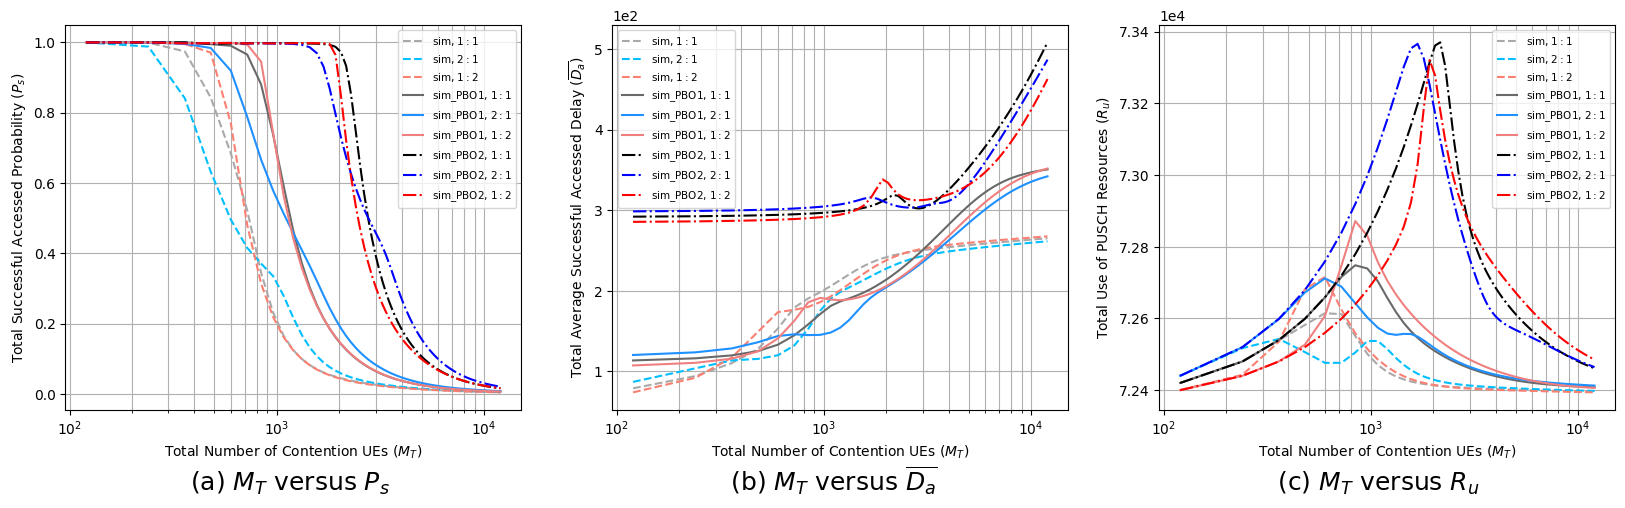

In [168]:
ana_m_1 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_m_1.csv')
ana_m_2 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_m_2.csv')
ana_m_3 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_m_3.csv')

ana_m_1_pre120 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_m_1_pre120.csv')
ana_m_2_pre120 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_m_2_pre120.csv')
ana_m_3_pre120 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_m_3_pre120.csv')

ana_m_1_pre480 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_m_1_pre480.csv')
ana_m_2_pre480 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_m_2_pre480.csv')
ana_m_3_pre480 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_m_3_pre480.csv')

figure_plot_IEEE_VTC(ana_m_1, ana_m_2, ana_m_3, None, 
                     ana_m_1_pre120, ana_m_2_pre120, ana_m_3_pre120, None, 
                     ana_m_1_pre480, ana_m_2_pre480, ana_m_3_pre480, None, 
                     '$1:1$', '$2:1$', '$1:2$', None)

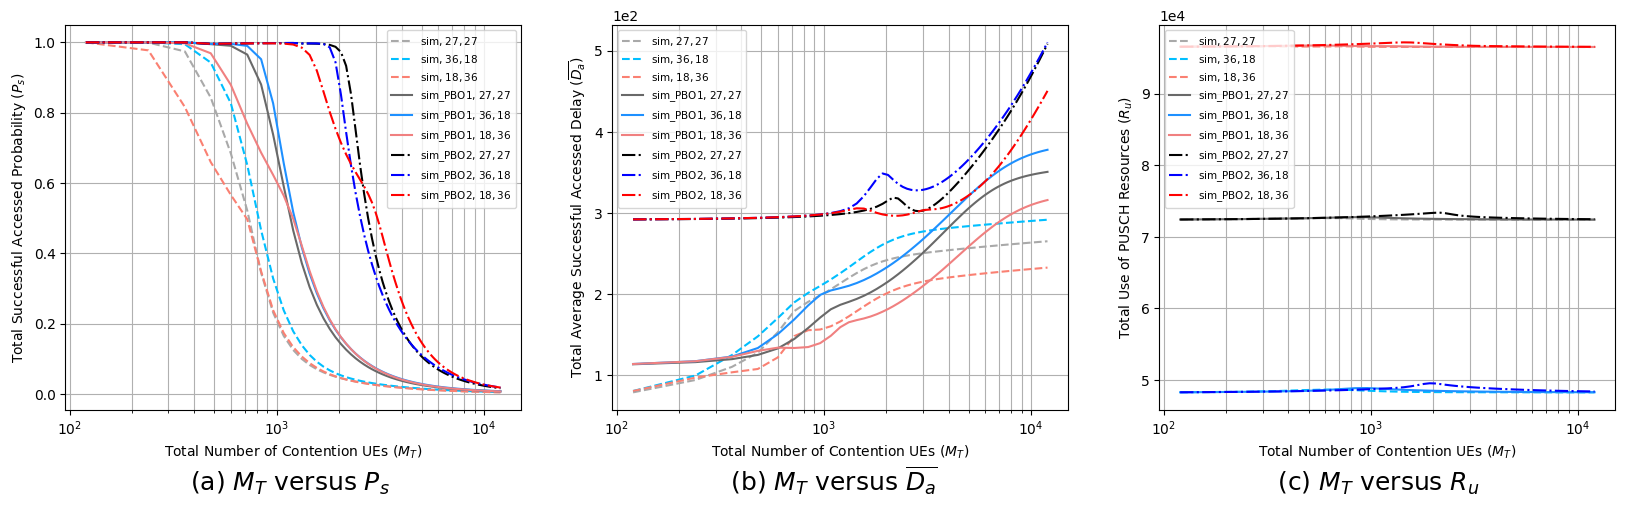

In [169]:
ana_N_1 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_m_1.csv')
ana_N_2 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_N_2.csv')
ana_N_3 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_N_3.csv')

ana_N_1_pre120 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_m_1_pre120.csv')
ana_N_2_pre120 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_N_2_pre120.csv')
ana_N_3_pre120 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_N_3_pre120.csv')

ana_N_1_pre480 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_m_1_pre480.csv')
ana_N_2_pre480 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_N_2_pre480.csv')
ana_N_3_pre480 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_N_3_pre480.csv')

figure_plot_IEEE_VTC(ana_N_1, ana_N_2, ana_N_3, None, 
                     ana_N_1_pre120, ana_N_2_pre120, ana_N_3_pre120, None, 
                     ana_N_1_pre480, ana_N_2_pre480, ana_N_3_pre480, None, 
                     '$27, 27$', '$36, 18$', '$18, 36$', None)

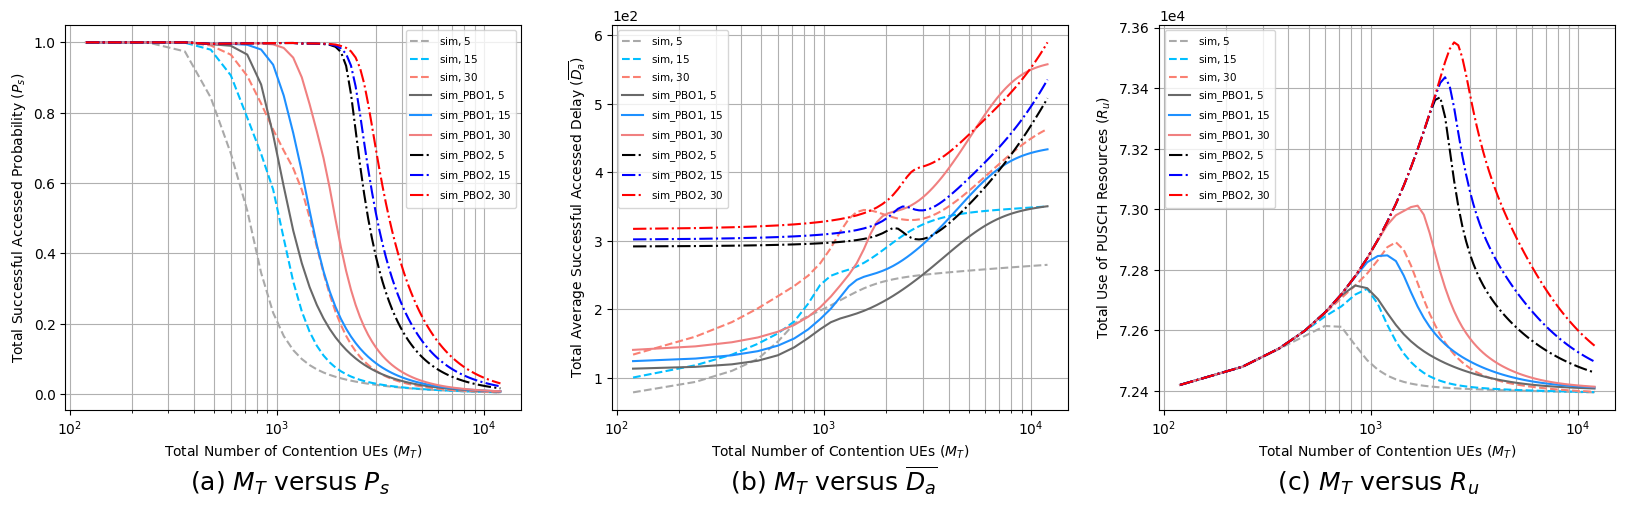

In [17]:
ana_wrar_1 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_m_1.csv')
ana_wrar_2 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_wrar_2.csv')
ana_wrar_3 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_wrar_3.csv')

ana_wrar_1_pre120 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_m_1_pre120.csv')
ana_wrar_2_pre120 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_wrar_2_pre120.csv')
ana_wrar_3_pre120 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_wrar_3_pre120.csv')

ana_wrar_1_pre480 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_m_1_pre480.csv')
ana_wrar_2_pre480 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_wrar_2_pre480.csv')
ana_wrar_3_pre480 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_wrar_3_pre480.csv')

figure_plot_IEEE_VTC(ana_wrar_1, ana_wrar_2, ana_wrar_3, None, 
                     ana_wrar_1_pre120, ana_wrar_2_pre120, ana_wrar_3_pre120, None, 
                     ana_wrar_1_pre480, ana_wrar_2_pre480, ana_wrar_3_pre480, None, 
                     '$5$', '$15$', '$30$', None)

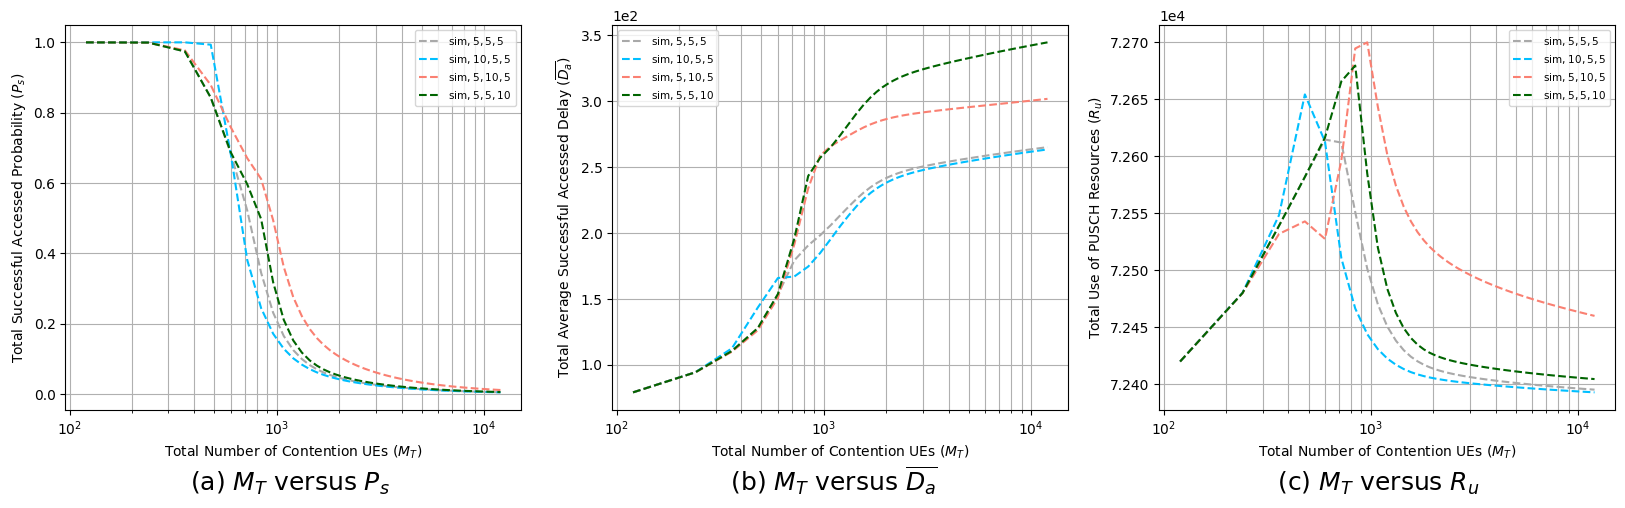

In [18]:
ana_nptmax_1 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_m_1.csv')
ana_nptmax_2 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_nptmax_2.csv')
ana_nptmax_3 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_nptmax_3.csv')
ana_nptmax_4 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_nptmax_4.csv')

ana_nptmax_1_pre120 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_m_1_pre120.csv')
ana_nptmax_2_pre120 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_nptmax_2_pre120.csv')
ana_nptmax_3_pre120 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_nptmax_3_pre120.csv')
ana_nptmax_4_pre120 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_nptmax_4_pre120.csv')

ana_nptmax_1_pre480 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_m_1_pre480.csv')
ana_nptmax_2_pre480 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_nptmax_2_pre480.csv')
ana_nptmax_3_pre480 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_nptmax_3_pre480.csv')
ana_nptmax_4_pre480 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_nptmax_4_pre480.csv')

figure_plot_IEEE_VTC(ana_nptmax_1, ana_nptmax_2, ana_nptmax_3, ana_nptmax_4, 
                     None, None, None, None, 
                     None, None, None, None, 
                     '$5, 5, 5$', '$10, 5, 5$', '$5, 10, 5$', '$5, 5, 10$')

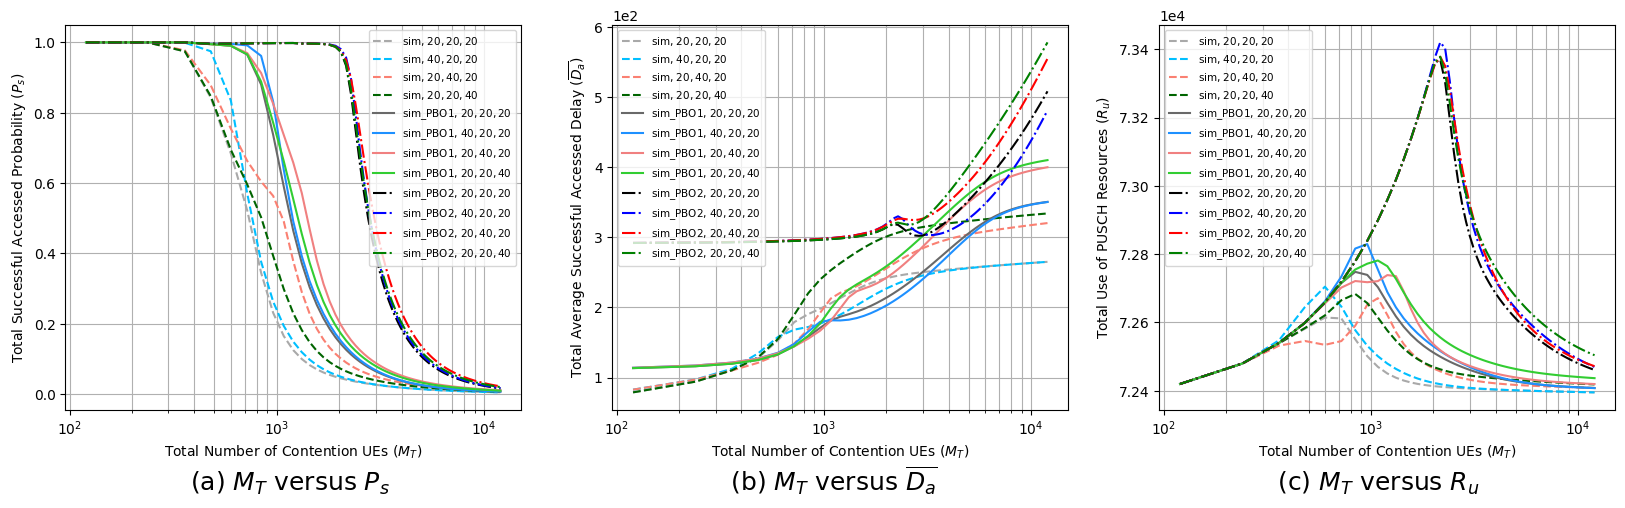

In [172]:
ana_wbo_1 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_m_1.csv')
ana_wbo_2 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_wbo_2.csv')
ana_wbo_3 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_wbo_3.csv')
ana_wbo_4 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_wbo_4.csv')

ana_wbo_1_pre120 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_m_1_pre120.csv')
ana_wbo_2_pre120 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_wbo_2_pre120.csv')
ana_wbo_3_pre120 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_wbo_3_pre120.csv')
ana_wbo_4_pre120 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_wbo_4_pre120.csv')

ana_wbo_1_pre480 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_m_1_pre480.csv')
ana_wbo_2_pre480 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_wbo_2_pre480.csv')
ana_wbo_3_pre480 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_wbo_3_pre480.csv')
ana_wbo_4_pre480 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_wbo_4_pre480.csv')

figure_plot_IEEE_VTC(ana_wbo_1, ana_wbo_2, ana_wbo_3, ana_wbo_4, 
                     ana_wbo_1_pre120, ana_wbo_2_pre120, ana_wbo_3_pre120, ana_wbo_4_pre120, 
                     ana_wbo_1_pre480, ana_wbo_2_pre480, ana_wbo_3_pre480, ana_wbo_4_pre480, 
                     '$20, 20, 20$', '$40, 20, 20$', '$20, 40, 20$', '$20, 20, 40$')

## **Numerical Results**

In [108]:
def figure_plot(nrow, ncol, figure_fontsize, legend_fontsize, plot_dotsize, legend_location, x_axis, 
                y_axis_ana_1, y_axis_ana_2, y_axis_ana_3, y_axis_ana_4, 
                y_axis_sim_1, y_axis_sim_2, y_axis_sim_3, y_axis_sim_4, 
                legend_text_1, legend_text_2, legend_text_3, legend_text_4):
    # err
    err_Ms_T = [[0.0] * int(len(x_axis)) for _ in range(0, ncol)]
    err_Ps_T = [[0.0] * int(len(x_axis)) for _ in range(0, ncol)]
    err_Da_T = [[0.0] * int(len(x_axis)) for _ in range(0, ncol)]
    err_Ur_PUSCH_T = [[0.0] * int(len(x_axis)) for _ in range(0, ncol)]
    for r in range(0, len(x_axis)):
        if y_axis_ana_1 is None and y_axis_sim_1 is None:
            err_Ms_T[0][r] = 0.0
            err_Ps_T[0][r] = 0.0
            err_Da_T[0][r] = 0.0
            err_Ur_PUSCH_T[0][r] = 0.0
        else:
            err_Ms_T[0][r] = error_rate(y_axis_ana_1.Ms_T[r], y_axis_sim_1.Ms_T[r])
            err_Ps_T[0][r] = error_rate(y_axis_ana_1.Ps_T[r], y_axis_sim_1.Ps_T[r])
            err_Da_T[0][r] = error_rate(y_axis_ana_1.Da_T[r], y_axis_sim_1.Da_T[r])
            err_Ur_PUSCH_T[0][r] = error_rate(y_axis_ana_1.Ur_PUSCH_T[r], y_axis_sim_1.Ur_PUSCH_T[r])
        if y_axis_ana_2 is None and y_axis_sim_2 is None:
            err_Ms_T[1][r] = 0.0
            err_Ps_T[1][r] = 0.0
            err_Da_T[1][r] = 0.0
            err_Ur_PUSCH_T[1][r] = 0.0
        else:
            err_Ms_T[1][r] = error_rate(y_axis_ana_2.Ms_T[r], y_axis_sim_2.Ms_T[r])
            err_Ps_T[1][r] = error_rate(y_axis_ana_2.Ps_T[r], y_axis_sim_2.Ps_T[r])
            err_Da_T[1][r] = error_rate(y_axis_ana_2.Da_T[r], y_axis_sim_2.Da_T[r])
            err_Ur_PUSCH_T[1][r] = error_rate(y_axis_ana_2.Ur_PUSCH_T[r], y_axis_sim_2.Ur_PUSCH_T[r])
        if y_axis_ana_3 is None and y_axis_sim_3 is None:
            err_Ms_T[2][r] = 0.0
            err_Ps_T[2][r] = 0.0
            err_Da_T[2][r] = 0.0
            err_Ur_PUSCH_T[2][r] = 0.0
        else:
            err_Ms_T[2][r] = error_rate(y_axis_ana_3.Ms_T[r], y_axis_sim_3.Ms_T[r])
            err_Ps_T[2][r] = error_rate(y_axis_ana_3.Ps_T[r], y_axis_sim_3.Ps_T[r])
            err_Da_T[2][r] = error_rate(y_axis_ana_3.Da_T[r], y_axis_sim_3.Da_T[r])
            err_Ur_PUSCH_T[2][r] = error_rate(y_axis_ana_3.Ur_PUSCH_T[r], y_axis_sim_3.Ur_PUSCH_T[r])
        if y_axis_ana_4 is None and y_axis_sim_4 is None:
            err_Ms_T[3][r] = 0.0
            err_Ps_T[3][r] = 0.0
            err_Da_T[3][r] = 0.0
            err_Ur_PUSCH_T[3][r] = 0.0
        else:
            err_Ms_T[3][r] = error_rate(y_axis_ana_4.Ms_T[r], y_axis_sim_4.Ms_T[r])
            err_Ps_T[3][r] = error_rate(y_axis_ana_4.Ps_T[r], y_axis_sim_4.Ps_T[r])
            err_Da_T[3][r] = error_rate(y_axis_ana_4.Da_T[r], y_axis_sim_4.Da_T[r])
            err_Ur_PUSCH_T[3][r] = error_rate(y_axis_ana_4.Ur_PUSCH_T[r], y_axis_sim_4.Ur_PUSCH_T[r])
    # plot figure
    fig, ax1 = plt.subplots(nrows=nrow, ncols=ncol)
    for col in range(0, ncol):
        ax2 = ax1[col].twinx()
        # ana
        if y_axis_ana_1 is None:
            plot_1 = []
        else:
            if col == 0:
                plot_1 = ax1[col].plot(x_axis, y_axis_ana_1.Ms_T, '--', color = 'black', label = 'ana, ' + legend_text_1)
            elif col == 1:
                plot_1 = ax1[col].plot(x_axis, y_axis_ana_1.Ps_T, '--', color = 'black', label = 'ana, ' + legend_text_1)
            elif col == 2:
                plot_1 = ax1[col].plot(x_axis, y_axis_ana_1.Da_T, '--', color = 'black', label = 'ana, ' + legend_text_1)
            elif col == 3:
                plot_1 = ax1[col].plot(x_axis, y_axis_ana_1.Ur_PUSCH_T, '--', color = 'black', label = 'ana, ' + legend_text_1)
        if y_axis_ana_2 is None:
            plot_2 = []
        else:
            if col == 0:
                plot_2 = ax1[col].plot(x_axis, y_axis_ana_2.Ms_T, '-', color = 'blue', label = 'ana, ' + legend_text_2)
            elif col == 1:
                plot_2 = ax1[col].plot(x_axis, y_axis_ana_2.Ps_T, '-', color = 'blue', label = 'ana, ' + legend_text_2)
            elif col == 2:
                plot_2 = ax1[col].plot(x_axis, y_axis_ana_2.Da_T, '-', color = 'blue', label = 'ana, ' + legend_text_2)
            elif col == 3:
                plot_2 = ax1[col].plot(x_axis, y_axis_ana_2.Ur_PUSCH_T, '-', color = 'blue', label = 'ana, ' + legend_text_2)
        if y_axis_ana_3 is None:
            plot_3 = []
        else:
            if col == 0:
                plot_3 = ax1[col].plot(x_axis, y_axis_ana_3.Ms_T, '-.', color = 'red', label = 'ana, ' + legend_text_3)
            elif col == 1:
                plot_3 = ax1[col].plot(x_axis, y_axis_ana_3.Ps_T, '-.', color = 'red', label = 'ana, ' + legend_text_3)
            elif col == 2:
                plot_3 = ax1[col].plot(x_axis, y_axis_ana_3.Da_T, '-.', color = 'red', label = 'ana, ' + legend_text_3)
            elif col == 3:
                plot_3 = ax1[col].plot(x_axis, y_axis_ana_3.Ur_PUSCH_T, '-.', color = 'red', label = 'ana, ' + legend_text_3)
        if y_axis_ana_4 is None:
            plot_4 = []
        else:
            if col == 0:
                plot_4 = ax1[col].plot(x_axis, y_axis_ana_4.Ms_T, ':', color = 'darkorange', label = 'ana, ' + legend_text_4)
            elif col == 1:
                plot_4 = ax1[col].plot(x_axis, y_axis_ana_4.Ps_T, ':', color = 'darkorange', label = 'ana, ' + legend_text_4)
            elif col == 2:
                plot_4 = ax1[col].plot(x_axis, y_axis_ana_4.Da_T, ':', color = 'darkorange', label = 'ana, ' + legend_text_4)
            elif col == 3:
                plot_4 = ax1[col].plot(x_axis, y_axis_ana_4.Ur_PUSCH_T, ':', color = 'darkorange', label = 'ana, ' + legend_text_4)  
        # sim
        if y_axis_sim_1 is None:
            plot_5 = []
        else:
            if col == 0:
                plot_5 = ax1[col].plot(x_axis, y_axis_sim_1.Ms_T, '1', ms = plot_dotsize, color = 'black', label = 'sim, ' + legend_text_1)
            elif col == 1:
                plot_5 = ax1[col].plot(x_axis, y_axis_sim_1.Ps_T, '1', ms = plot_dotsize, color = 'black', label = 'sim, ' + legend_text_1)
            elif col == 2:
                plot_5 = ax1[col].plot(x_axis, y_axis_sim_1.Da_T, '1', ms = plot_dotsize, color = 'black', label = 'sim, ' + legend_text_1)
            elif col == 3:
                plot_5 = ax1[col].plot(x_axis, y_axis_sim_1.Ur_PUSCH_T, '1', ms = plot_dotsize, color = 'black', label = 'sim, ' + legend_text_1)
        if y_axis_sim_2 is None:
            plot_6 = []
        else:
            if col == 0:
                plot_6 = ax1[col].plot(x_axis, y_axis_sim_2.Ms_T, '2', ms = plot_dotsize, color = 'blue', label = 'sim, ' + legend_text_2)
            elif col == 1:
                plot_6 = ax1[col].plot(x_axis, y_axis_sim_2.Ps_T, '2', ms = plot_dotsize, color = 'blue', label = 'sim, ' + legend_text_2)
            elif col == 2:
                plot_6 = ax1[col].plot(x_axis, y_axis_sim_2.Da_T, '2', ms = plot_dotsize, color = 'blue', label = 'sim, ' + legend_text_2)
            elif col == 3:
                plot_6 = ax1[col].plot(x_axis, y_axis_sim_2.Ur_PUSCH_T, '2', ms = plot_dotsize, color = 'blue', label = 'sim, ' + legend_text_2)
        if y_axis_sim_3 is None:
            plot_7 = []
        else:
            if col == 0:
                plot_7 = ax1[col].plot(x_axis, y_axis_sim_3.Ms_T, '3', ms = plot_dotsize, color = 'red', label = 'sim, ' + legend_text_3)
            elif col == 1:
                plot_7 = ax1[col].plot(x_axis, y_axis_sim_3.Ps_T, '3', ms = plot_dotsize, color = 'red', label = 'sim, ' + legend_text_3)
            elif col == 2:
                plot_7 = ax1[col].plot(x_axis, y_axis_sim_3.Da_T, '3', ms = plot_dotsize, color = 'red', label = 'sim, ' + legend_text_3)
            elif col == 3:
                plot_7 = ax1[col].plot(x_axis, y_axis_sim_3.Ur_PUSCH_T, '3', ms = plot_dotsize, color = 'red', label = 'sim, ' + legend_text_3)
        if y_axis_sim_4 is None:
            plot_8 = []
        else:
            if col == 0:
                plot_8 = ax1[col].plot(x_axis, y_axis_sim_4.Ms_T, '4', ms = plot_dotsize, color = 'darkorange', label = 'sim, ' + legend_text_4)
            elif col == 1:
                plot_8 = ax1[col].plot(x_axis, y_axis_sim_4.Ps_T, '4', ms = plot_dotsize, color = 'darkorange', label = 'sim, ' + legend_text_4)
            elif col == 2:
                plot_8 = ax1[col].plot(x_axis, y_axis_sim_4.Da_T, '4', ms = plot_dotsize, color = 'darkorange', label = 'sim, ' + legend_text_4)
            elif col == 3:
                plot_8 = ax1[col].plot(x_axis, y_axis_sim_4.Ur_PUSCH_T, '4', ms = plot_dotsize, color = 'darkorange', label = 'sim, ' + legend_text_4)
        # err
        if y_axis_ana_1 is None and y_axis_sim_1 is None:
            plot_9 = []
        else:
            if col == 0:
                plot_9 = ax2.plot(x_axis, err_Ms_T[0], '-o', markerfacecolor='none', color = 'green', label = 'err, ' + legend_text_1)
            elif col == 1:
                plot_9 = ax2.plot(x_axis, err_Ps_T[0], '-o', markerfacecolor='none', color = 'green', label = 'err, ' + legend_text_1)
            elif col == 2:
                plot_9 = ax2.plot(x_axis, err_Da_T[0], '-o', markerfacecolor='none', color = 'green', label = 'err, ' + legend_text_1)
            elif col == 3:
                plot_9 = ax2.plot(x_axis, err_Ur_PUSCH_T[0], '-o', markerfacecolor='none', color = 'green', label = 'err, ' + legend_text_1)
        if y_axis_ana_2 is None and y_axis_sim_2 is None:
            plot_10 = []
        else:
            if col == 0:
                plot_10 = ax2.plot(x_axis, err_Ms_T[1], '-s', markerfacecolor='none', color = 'lightgreen', label = 'err, ' + legend_text_2)
            elif col == 1:
                plot_10 = ax2.plot(x_axis, err_Ps_T[1], '-s', markerfacecolor='none', color = 'lightgreen', label = 'err, ' + legend_text_2)
            elif col == 2:
                plot_10 = ax2.plot(x_axis, err_Da_T[1], '-s', markerfacecolor='none', color = 'lightgreen', label = 'err, ' + legend_text_2)
            elif col == 3:
                plot_10 = ax2.plot(x_axis, err_Ur_PUSCH_T[1], '-s', markerfacecolor='none', color = 'lightgreen', label = 'err, ' + legend_text_2)
        if y_axis_ana_3 is None and y_axis_sim_3 is None:
            plot_11 = []
        else:
            if col == 0:
                plot_11 = ax2.plot(x_axis, err_Ms_T[2], '-p', markerfacecolor='none', color = 'limegreen', label = 'err, ' + legend_text_3)
            elif col == 1:
                plot_11 = ax2.plot(x_axis, err_Ps_T[2], '-p', markerfacecolor='none', color = 'limegreen', label = 'err, ' + legend_text_3)
            elif col == 2:
                plot_11 = ax2.plot(x_axis, err_Da_T[2], '-p', markerfacecolor='none', color = 'limegreen', label = 'err, ' + legend_text_3)
            elif col == 3:
                plot_11 = ax2.plot(x_axis, err_Ur_PUSCH_T[2], '-p', markerfacecolor='none', color = 'limegreen', label = 'err, ' + legend_text_3)
        if y_axis_ana_4 is None and y_axis_sim_4 is None:
            plot_12 = []
        else:
            if col == 0:
                plot_12 = ax2.plot(x_axis, err_Ms_T[3], '-v', markerfacecolor='none', color = 'yellowgreen', label = 'err, ' + legend_text_4)
            elif col == 1:
                plot_12 = ax2.plot(x_axis, err_Ps_T[3], '-v', markerfacecolor='none', color = 'yellowgreen', label = 'err, ' + legend_text_4)
            elif col == 2:
                plot_12 = ax2.plot(x_axis, err_Da_T[3], '-v', markerfacecolor='none', color = 'yellowgreen', label = 'err, ' + legend_text_4)
            elif col == 3:
                plot_12 = ax2.plot(x_axis, err_Ur_PUSCH_T[3], '-v', markerfacecolor='none', color = 'yellowgreen', label = 'err, ' + legend_text_4)
        
        plt.xscale('log')
        if col == 0:
            ax1[col].set_xlabel("Arrival Rate of UEs ($\lambda$)", color='black', fontsize=figure_fontsize)
            ax1[col].set_ylabel("Total Number of Successful Devices ($M_{s,T}$)", color='black', fontsize=figure_fontsize)
        elif col == 1:
            ax1[col].set_xlabel("Arrival Rate of UEs ($\lambda$)", color='black', fontsize=figure_fontsize)
            ax1[col].set_ylabel("Total Successful Accessed Probability ($P_{s,T}$)", color='black', fontsize=figure_fontsize)
        elif col == 2:
            ax1[col].set_xlabel("Arrival Rate of UEs ($\lambda$)", color='black', fontsize=figure_fontsize)
            ax1[col].set_ylabel("Total Average Successful Accessed Delay ($\overline{D_{a,T}}$)", color='black', fontsize=figure_fontsize)
            ax1[col].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
        elif col == 3:
            ax1[col].set_xlabel("Arrival Rate of UEs ($\lambda$)", color='black', fontsize=figure_fontsize)
            ax1[col].set_ylabel("Total Use of PUSCH Resources ($R_{u,T}$)", color='black', fontsize=figure_fontsize)
            ax1[col].ticklabel_format(axis='y', style='sci', scilimits=(0, 3))
        ax2.set_ylabel("Error (%)", color='darkgreen', fontsize=figure_fontsize)
        ax2.set_ylim([0, 25])

        ax1[col].tick_params(axis='x', labelcolor='black', labelsize=figure_fontsize)
        ax1[col].tick_params(axis='y', labelcolor='black', labelsize=figure_fontsize)
        ax2.tick_params(axis='y', labelcolor='darkgreen', labelsize=figure_fontsize)

        plt.grid(True, which="both")
        lns = plot_1 + plot_2 + plot_3 + plot_4 + plot_5 + plot_6 + plot_7 + plot_8 + plot_9 + plot_10 + plot_11 + plot_12
        labels = [l.get_label() for l in lns]
        if col == 2:
            plt.legend(lns, labels, markerscale=1, fontsize=legend_fontsize, loc="upper left", bbox_to_anchor=(0, 1))
        else:
            plt.legend(lns, labels, markerscale=1, fontsize=legend_fontsize, loc=legend_location, bbox_to_anchor=(1, 1))
    
    plt.suptitle("(a) $\lambda$ versus $M_{s,T}$                                          (b) $\lambda$ versus $P_{s,T}$                                          (c) $\lambda$ versus $\overline{D_{a,T}}$                                         (d) $\lambda$ versus $R_{u,T}$", fontsize=18, x=0.5, y=0.0)
    plt.rcParams["figure.figsize"] = (25, 5)
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.3)
    plt.show()

### **Different Ratio**

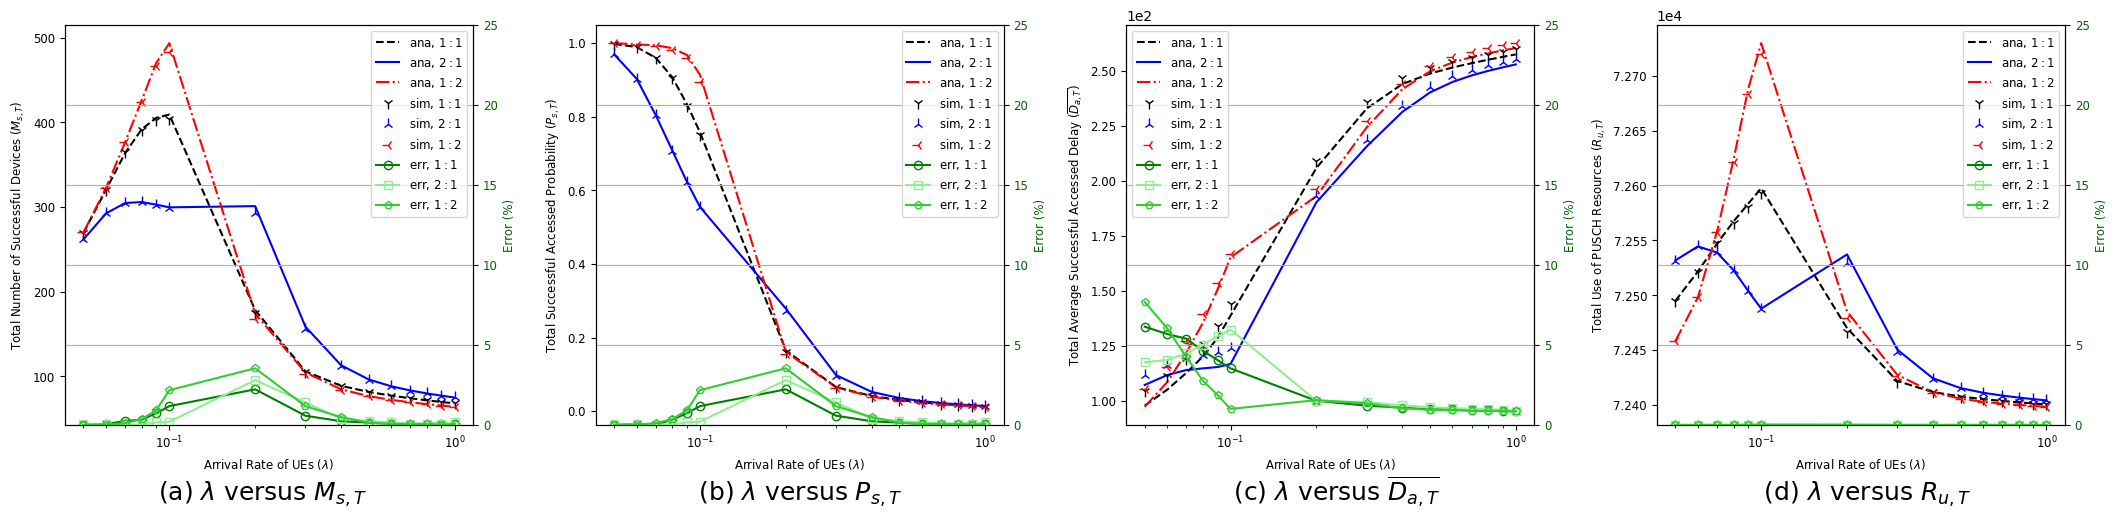

In [109]:
nrow = 1
ncol = 4
figure_fontsize = 8.5
legend_fontsize = 8.5
plot_dotsize = 8
legend_location = 'best'

ana_m_1 = pandas.read_csv('./Journal_1e4_results/ana_testresult_1e4_m_1.csv')
sim_m_1 = pandas.read_csv('./Journal_1e4_results/sim_testresult_1e4_m_1.csv')

ana_m_2 = pandas.read_csv('./Journal_1e4_results/ana_testresult_1e4_m_2.csv')
sim_m_2 = pandas.read_csv('./Journal_1e4_results/sim_testresult_1e4_m_2.csv')

ana_m_3 = pandas.read_csv('./Journal_1e4_results/ana_testresult_1e4_m_3.csv')
sim_m_3 = pandas.read_csv('./Journal_1e4_results/sim_testresult_1e4_m_3.csv')

figure_plot(nrow, ncol, figure_fontsize, legend_fontsize, plot_dotsize, legend_location, arrival_rate, 
            ana_m_1, ana_m_2, ana_m_3, None, 
            sim_m_1, sim_m_2, sim_m_3, None, 
            '$1:1$', '$2:1$', '$1:2$', '')

### **Different Preamble**

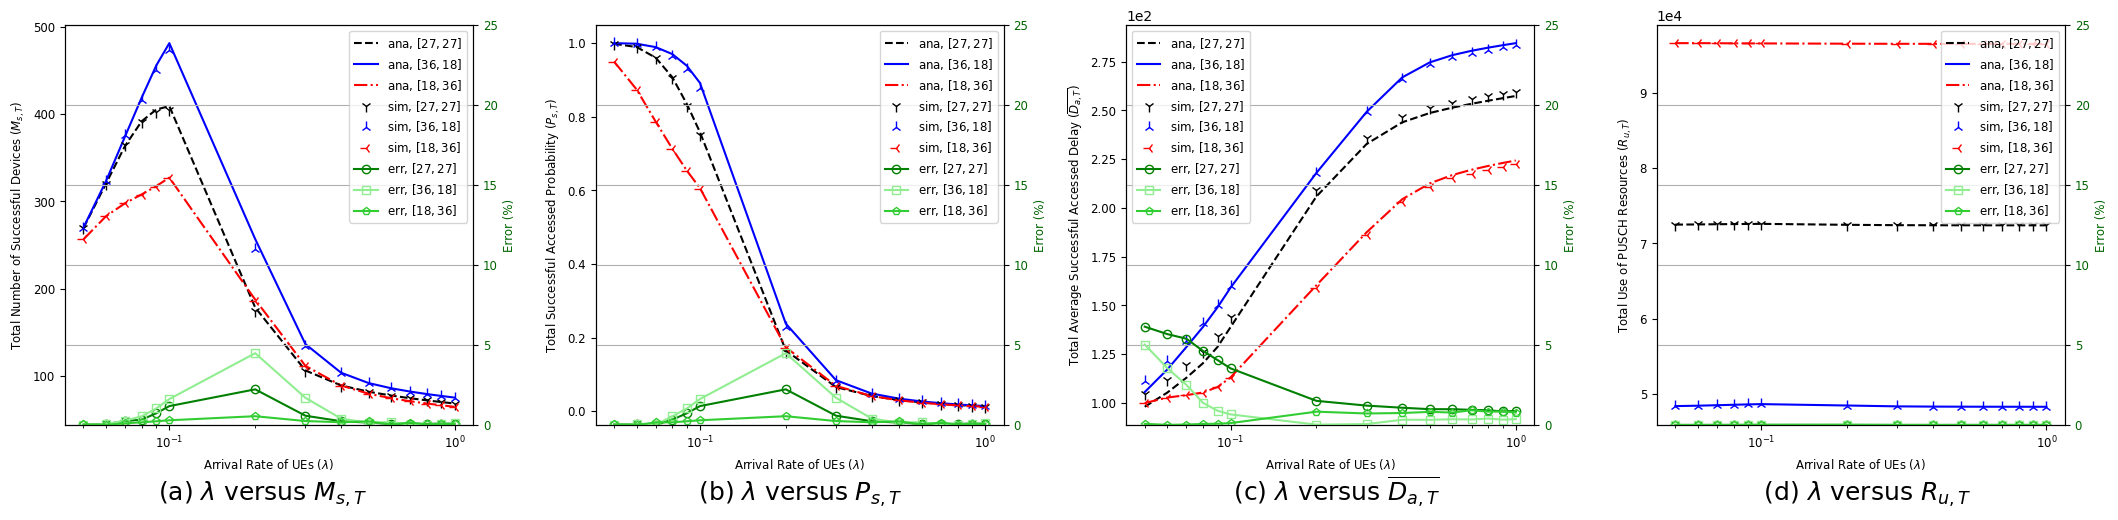

In [110]:
nrow = 1
ncol = 4
figure_fontsize = 8.5
legend_fontsize = 8.5
plot_dotsize = 8
legend_location = 'best'

ana_N_1 = pandas.read_csv('./Journal_1e4_results/ana_testresult_1e4_m_1.csv')
sim_N_1 = pandas.read_csv('./Journal_1e4_results/sim_testresult_1e4_m_1.csv')

ana_N_2 = pandas.read_csv('./Journal_1e4_results/ana_testresult_1e4_N_2.csv')
sim_N_2 = pandas.read_csv('./Journal_1e4_results/sim_testresult_1e4_N_2.csv')

ana_N_3 = pandas.read_csv('./Journal_1e4_results/ana_testresult_1e4_N_3.csv')
sim_N_3 = pandas.read_csv('./Journal_1e4_results/sim_testresult_1e4_N_3.csv')

figure_plot(nrow, ncol, figure_fontsize, legend_fontsize, plot_dotsize, legend_location, arrival_rate, 
            ana_N_1, ana_N_2, ana_N_3, None, 
            sim_N_1, sim_N_2, sim_N_3, None, 
            '$[27,27]$', '$[36,18]$', '$[18,36]$', '')

### **Different RAR**

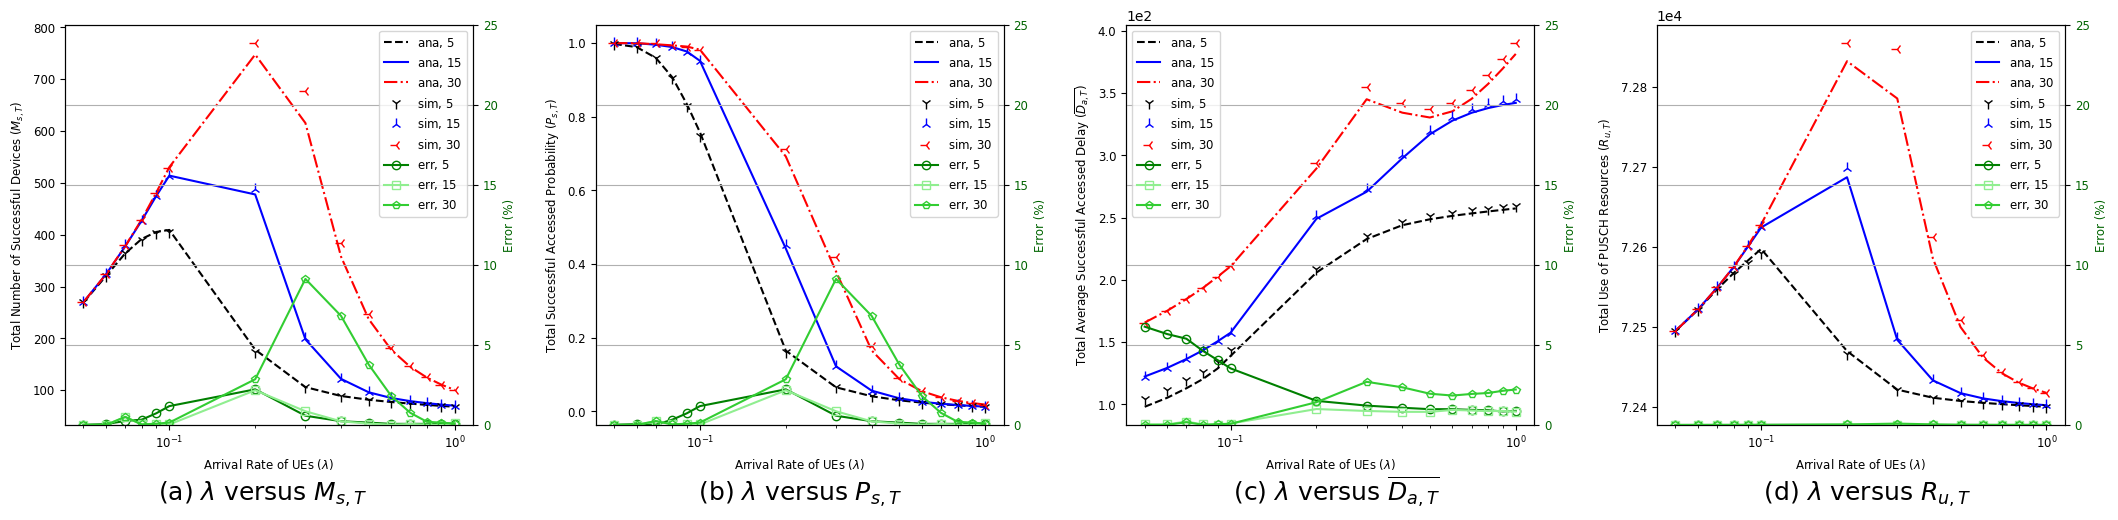

In [111]:
nrow = 1
ncol = 4
figure_fontsize = 8.5
legend_fontsize = 8.5
plot_dotsize = 8
legend_location = 'best'

ana_wrar_1 = pandas.read_csv('./Journal_1e4_results/ana_testresult_1e4_m_1.csv')
sim_wrar_1 = pandas.read_csv('./Journal_1e4_results/sim_testresult_1e4_m_1.csv')

ana_wrar_2 = pandas.read_csv('./Journal_1e4_results/ana_testresult_1e4_wrar_2.csv')
sim_wrar_2 = pandas.read_csv('./Journal_1e4_results/sim_testresult_1e4_wrar_2.csv')

ana_wrar_3 = pandas.read_csv('./Journal_1e4_results/ana_testresult_1e4_wrar_3.csv')
sim_wrar_3 = pandas.read_csv('./Journal_1e4_results/sim_testresult_1e4_wrar_3.csv')

figure_plot(nrow, ncol, figure_fontsize, legend_fontsize, plot_dotsize, legend_location, arrival_rate, 
            ana_wrar_1, ana_wrar_2, ana_wrar_3, None, 
            sim_wrar_1, sim_wrar_2, sim_wrar_3, None, 
            '$5$', '$15$', '$30$', '')

### **Different RetransLimit**

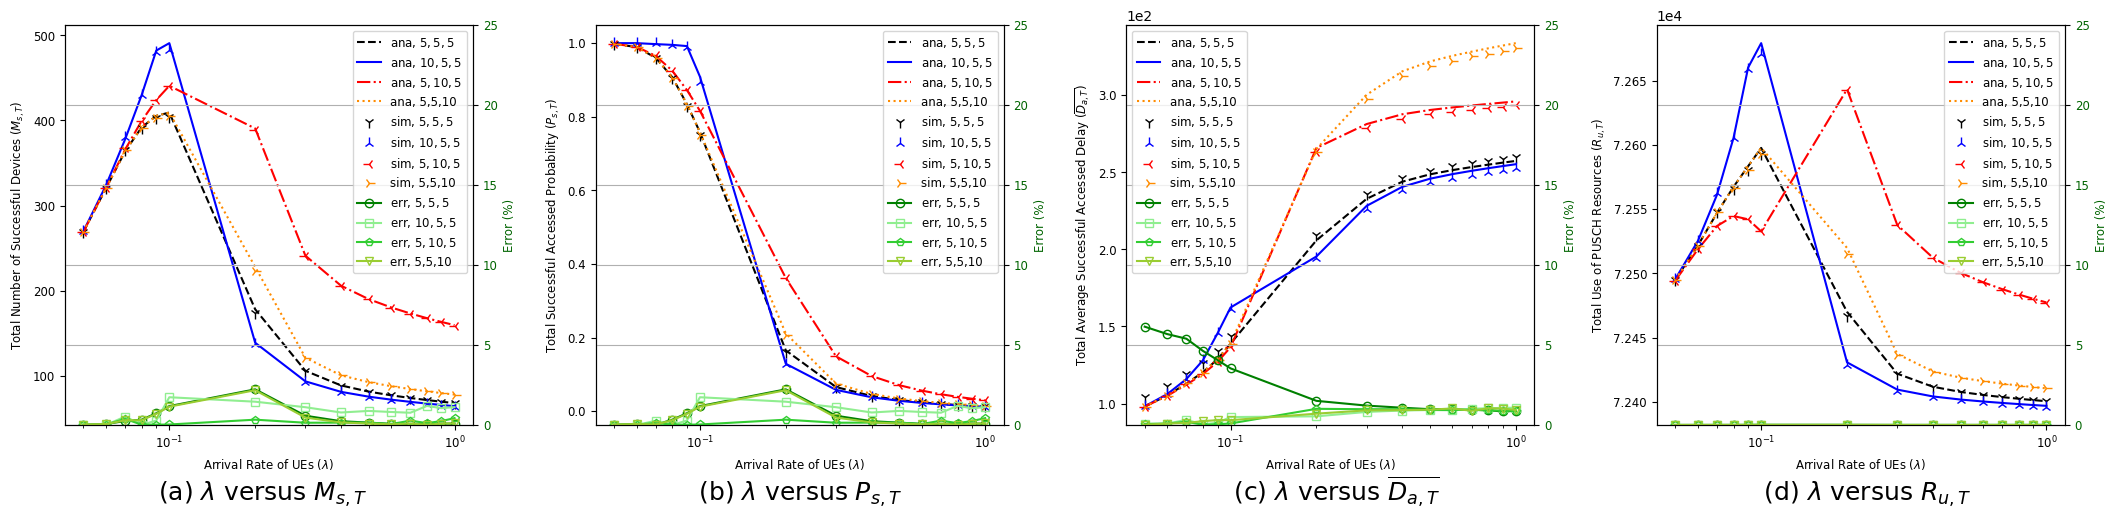

In [112]:
nrow = 1
ncol = 4
figure_fontsize = 8.5
legend_fontsize = 8.5
plot_dotsize = 8
legend_location = 'best'

ana_nptmax_1 = pandas.read_csv('./Journal_1e4_results/ana_testresult_1e4_m_1.csv')
sim_nptmax_1 = pandas.read_csv('./Journal_1e4_results/sim_testresult_1e4_m_1.csv')

ana_nptmax_2 = pandas.read_csv('./Journal_1e4_results/ana_testresult_1e4_nptmax_2.csv')
sim_nptmax_2 = pandas.read_csv('./Journal_1e4_results/sim_testresult_1e4_nptmax_2.csv')

ana_nptmax_3 = pandas.read_csv('./Journal_1e4_results/ana_testresult_1e4_nptmax_3.csv')
sim_nptmax_3 = pandas.read_csv('./Journal_1e4_results/sim_testresult_1e4_nptmax_3.csv')

ana_nptmax_4 = pandas.read_csv('./Journal_1e4_results/ana_testresult_1e4_nptmax_4.csv')
sim_nptmax_4 = pandas.read_csv('./Journal_1e4_results/sim_testresult_1e4_nptmax_4.csv')

figure_plot(nrow, ncol, figure_fontsize, legend_fontsize, plot_dotsize, legend_location, arrival_rate, 
            ana_nptmax_1, ana_nptmax_2, ana_nptmax_3, ana_nptmax_4, 
            sim_nptmax_1, sim_nptmax_2, sim_nptmax_3, sim_nptmax_4, 
            '$5,5,5$', '$10,5,5$', '$5,10,5$', '5,5,10')

### **Different BackoffWindow**

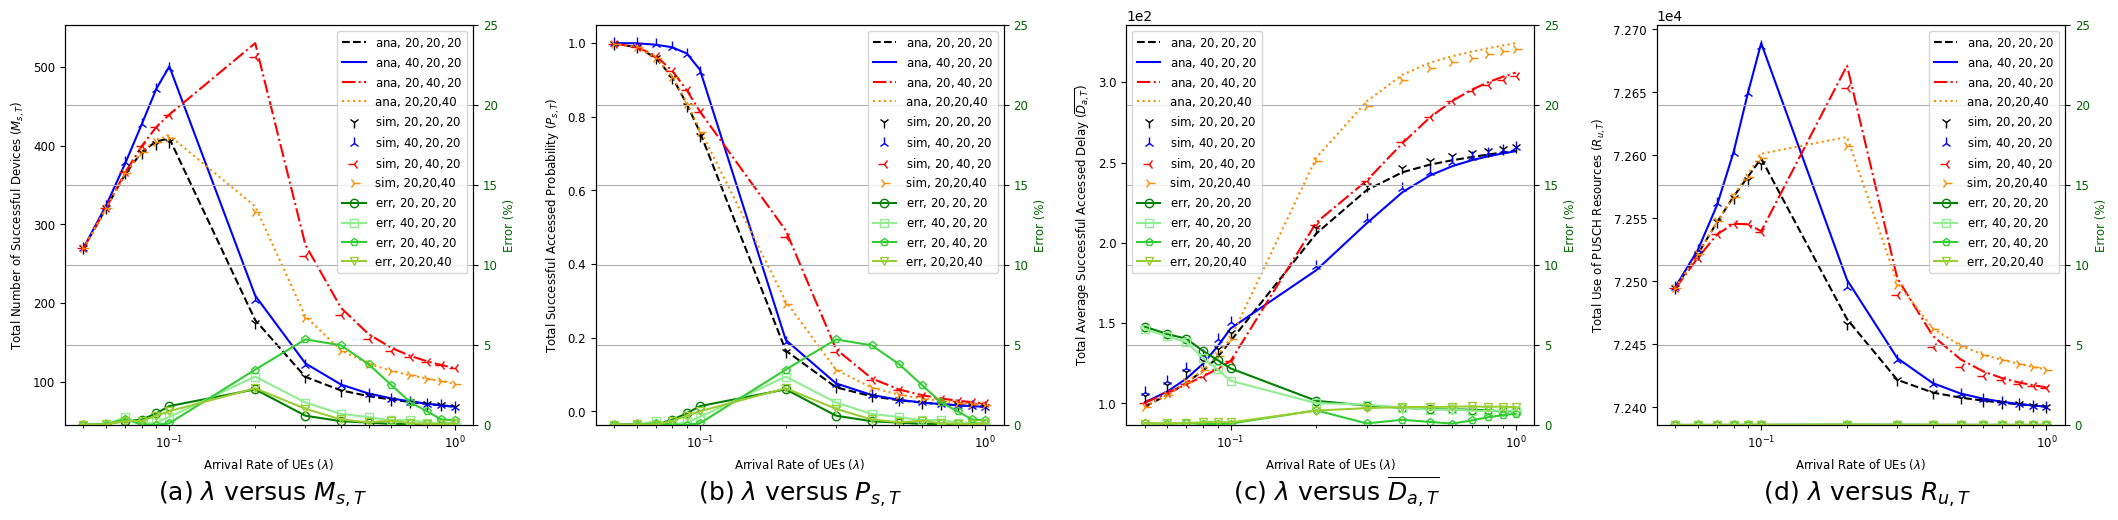

In [113]:
nrow = 1
ncol = 4
figure_fontsize = 8.5
legend_fontsize = 8.5
plot_dotsize = 8
legend_location = 'best'

ana_wbo_1 = pandas.read_csv('./Journal_1e4_results/ana_testresult_1e4_m_1.csv')
sim_wbo_1 = pandas.read_csv('./Journal_1e4_results/sim_testresult_1e4_m_1.csv')

ana_wbo_2 = pandas.read_csv('./Journal_1e4_results/ana_testresult_1e4_wbo_2.csv')
sim_wbo_2 = pandas.read_csv('./Journal_1e4_results/sim_testresult_1e4_wbo_2.csv')

ana_wbo_3 = pandas.read_csv('./Journal_1e4_results/ana_testresult_1e4_wbo_3.csv')
sim_wbo_3 = pandas.read_csv('./Journal_1e4_results/sim_testresult_1e4_wbo_3.csv')

ana_wbo_4 = pandas.read_csv('./Journal_1e4_results/ana_testresult_1e4_wbo_4.csv')
sim_wbo_4 = pandas.read_csv('./Journal_1e4_results/sim_testresult_1e4_wbo_4.csv')

figure_plot(nrow, ncol, figure_fontsize, legend_fontsize, plot_dotsize, legend_location, arrival_rate, 
            ana_wbo_1, ana_wbo_2, ana_wbo_3, ana_wbo_4, 
            sim_wbo_1, sim_wbo_2, sim_wbo_3, sim_wbo_4, 
            '$20,20,20$', '$40,20,20$', '$20,40,20$', '20,20,40')

## **Other Testing**

### **W_RAR Testing**

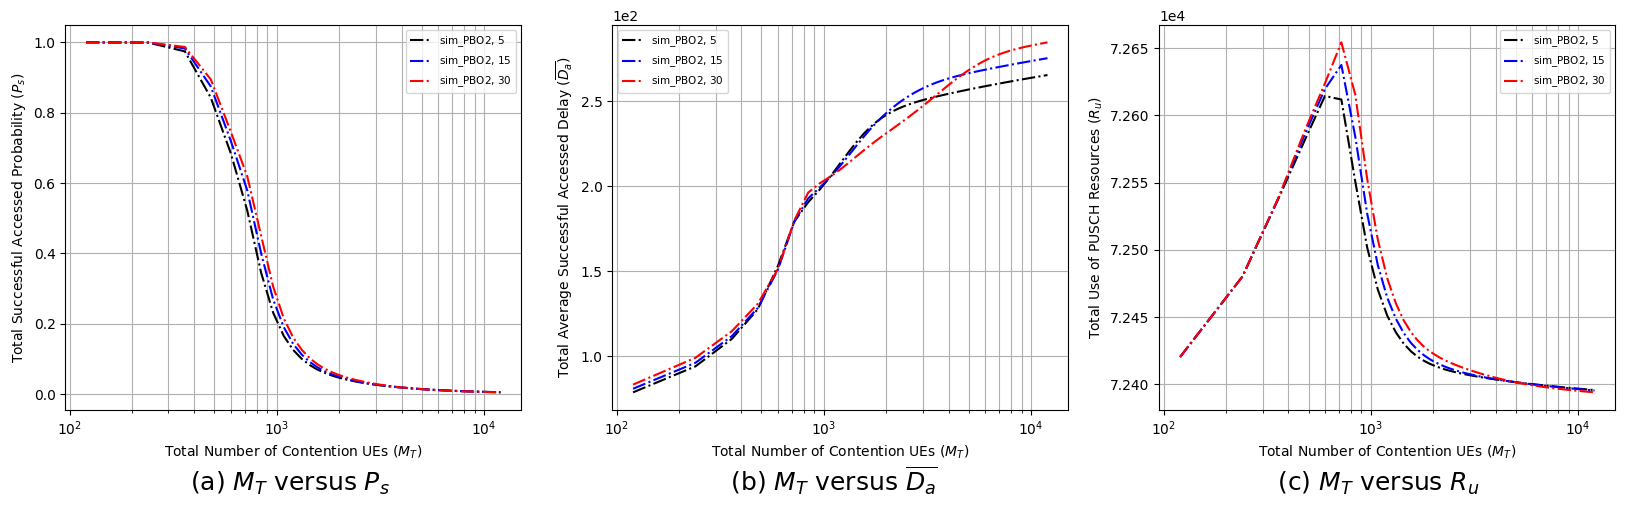

In [22]:
ana_wrar_1 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_m_1.csv') # 5
ana_wrar_2 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_wrar_2.csv') # 15
ana_wrar_3 = pandas.read_csv('./IEEE_VTC_2024_withPB/ana_testresult_wrar_3.csv') # 30

ana_wrar_1_cud = pandas.read_csv('ana_testresult_wrar_1_cud.csv') # 5
ana_wrar_2_cud = pandas.read_csv('ana_testresult_wrar_2_cud.csv') # 15
ana_wrar_3_cud = pandas.read_csv('ana_testresult_wrar_3_cud.csv') # 30

ana_wrar_1_dud = pandas.read_csv('ana_testresult_wrar_1_dud.csv') # 5
ana_wrar_2_dud = pandas.read_csv('ana_testresult_wrar_2_dud.csv') # 15
ana_wrar_3_dud = pandas.read_csv('ana_testresult_wrar_3_dud.csv') # 30

ana_wrar_1_OSonly = pandas.read_csv('ana_testresult_wrar_1_OSonly.csv') # 5
ana_wrar_2_OSonly = pandas.read_csv('ana_testresult_wrar_2_OSonly.csv') # 6
ana_wrar_3_OSonly = pandas.read_csv('ana_testresult_wrar_3_OSonly.csv') # 7

figure_plot_IEEE_VTC(None, None, None, None, 
                     None, None, None, None, 
                     ana_wrar_1_OSonly, ana_wrar_2_OSonly, ana_wrar_3_OSonly, None, 
                     '$5$', '$15$', '$30$', None)

### **Plotting Figures 1**

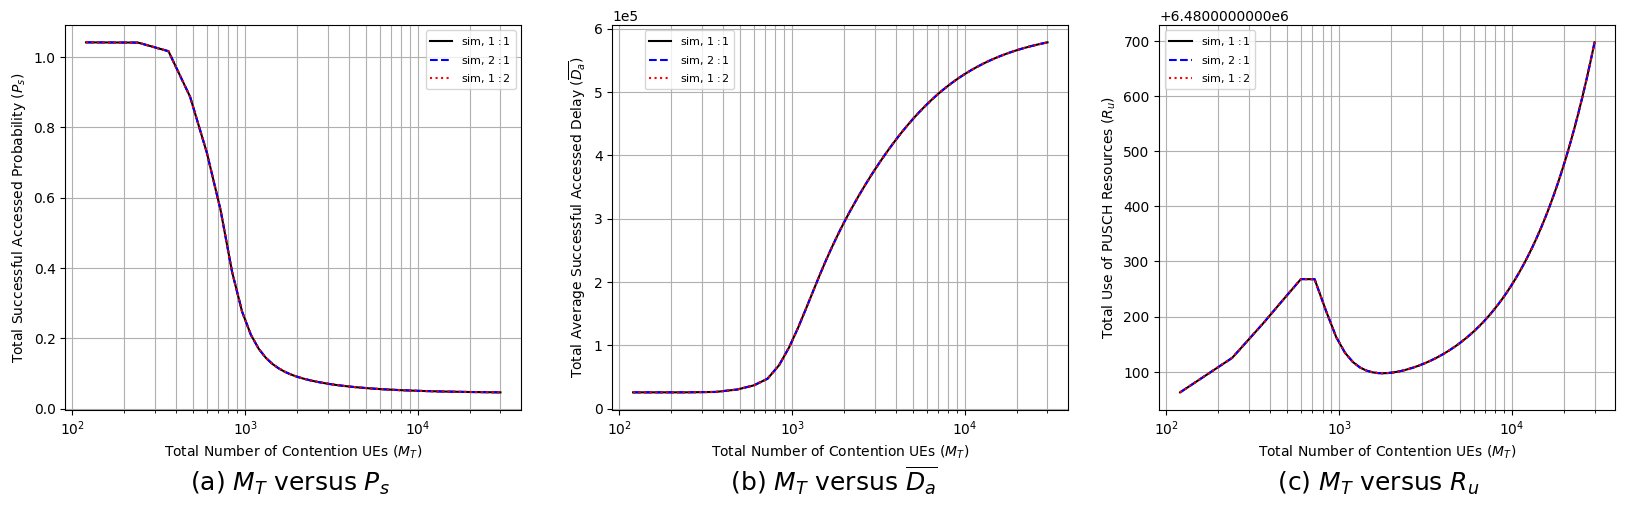

In [56]:
ana_30k = pandas.read_csv('ana_testresult_30k.csv')

plt.subplot(131)
plt.plot(ana_30k.M_4SRA+ana_30k.M_2SRA, ana_30k.Ps_T, '-', color = 'black', label = 'sim, $1:1$')
# plt.plot(sim_m_1.M_4SRA+sim_m_1.M_2SRA, sim_m_1.Ps_T, '-', color = 'black')
plt.plot(ana_30k.M_4SRA+ana_30k.M_2SRA, ana_30k.Ps_T, '--', color = 'blue', label = 'sim, $2:1$')
plt.plot(ana_30k.M_4SRA+ana_30k.M_2SRA, ana_30k.Ps_T, ':', color = 'red', label = 'sim, $1:2$')
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Successful Accessed Probability ($P_s$)")
# plt.title("(a) $M_T$ versus $P_s$")
# plt.suptitle("(a) $M_T$ versus $P_s$", fontsize=18, x=0.23, y=0.0)
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(1, 1))

plt.subplot(132)
plt.plot(ana_30k.M_4SRA+ana_30k.M_2SRA, ana_30k.Da_T, '-', color = 'black', label = 'sim, $1:1$')
# plt.plot(sim_m_1.M_4SRA+sim_m_1.M_2SRA, sim_m_1.Da_T, '-', color = 'black')
plt.plot(ana_30k.M_4SRA+ana_30k.M_2SRA, ana_30k.Da_T, '--', color = 'blue', label = 'sim, $2:1$')
plt.plot(ana_30k.M_4SRA+ana_30k.M_2SRA, ana_30k.Da_T, ':', color = 'red', label = 'sim, $1:2$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 0))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Average Successful Accessed Delay ($\overline{D_{a}}$)")
# plt.title("(b) $M_T$ versus $\overline{D_{a}}$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(0.28, 1))

plt.subplot(133)
plt.plot(ana_30k.M_4SRA+ana_30k.M_2SRA, ana_30k.Ur_PUSCH_T, '-', color = 'black', label = 'sim, $1:1$')
# plt.plot(sim_m_1.M_4SRA+sim_m_1.M_2SRA, sim_m_1.Ur_PUSCH_T, '-', color = 'black', label = 'sim, $1:1$')
plt.plot(ana_30k.M_4SRA+ana_30k.M_2SRA, ana_30k.Ur_PUSCH_T, '--', color = 'blue', label = 'sim, $2:1$')
plt.plot(ana_30k.M_4SRA+ana_30k.M_2SRA, ana_30k.Ur_PUSCH_T, ':', color = 'red', label = 'sim, $1:2$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 3))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Use of PUSCH Resources ($R_u$)")
# plt.title("(c) $M_T$ versus $R_u$")
plt.grid(True, which="both")

plt.suptitle("(a) $M_T$ versus $P_s$                                           (b) $M_T$ versus $\overline{D_{a}}$                                           (c) $M_T$ versus $R_u$", fontsize=18, x=0.51, y=0.0)


plt.legend(markerscale=1, fontsize=8, loc='best')
plt.rcParams["figure.figsize"] = (20, 5)
plt.show()

### **Plotting Figures 2**

In [139]:
ana_1 = pandas.read_csv('ana_testresult_1.csv')
ana_2 = pandas.read_csv('ana_testresult_2.csv')
ana_3 = pandas.read_csv('ana_testresult_3.csv')
ana_4 = pandas.read_csv('ana_testresult_4.csv')

sim_1 = pandas.read_csv('sim_testresult_1.csv')
sim_2 = pandas.read_csv('sim_testresult_2.csv')
sim_3 = pandas.read_csv('sim_testresult_3.csv')
sim_4 = pandas.read_csv('sim_testresult_4.csv')

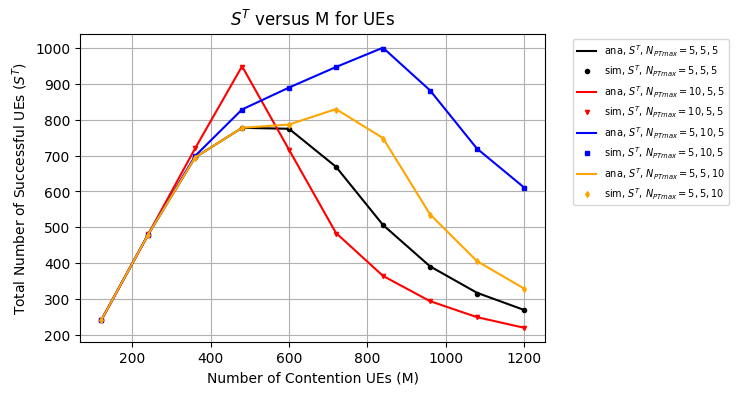

In [140]:
plt.plot(ana_1.M_4SRA, ana_1.Ms_T, '-', color = 'black', label = 'ana, $S^T$, $N_{PTmax}=5,5,5$')
plt.plot(sim_1.M_4SRA, sim_1.Ms_T, 'o', ms = 3, color = 'black', label = 'sim, $S^T$, $N_{PTmax}=5,5,5$')

plt.plot(ana_2.M_4SRA, ana_2.Ms_T, '-', color = 'red', label = 'ana, $S^T$, $N_{PTmax}=10,5,5$')
plt.plot(sim_2.M_4SRA, sim_2.Ms_T, 'v', ms = 3, color = 'red', label = 'sim, $S^T$, $N_{PTmax}=10,5,5$')

plt.plot(ana_3.M_4SRA, ana_3.Ms_T, '-', color = 'blue', label = 'ana, $S^T$, $N_{PTmax}=5,10,5$')
plt.plot(sim_3.M_4SRA, sim_3.Ms_T, 's', ms = 3, color = 'blue', label = 'sim, $S^T$, $N_{PTmax}=5,10,5$')

plt.plot(ana_4.M_4SRA, ana_4.Ms_T, '-', color = 'orange', label = 'ana, $S^T$, $N_{PTmax}=5,5,10$')
plt.plot(sim_4.M_4SRA, sim_4.Ms_T, 'd', ms = 3, color = 'orange', label = 'sim, $S^T$, $N_{PTmax}=5,5,10$')

plt.xlabel("Number of Contention UEs (M)")
plt.ylabel("Total Number of Successful UEs ($S^T$)")
plt.grid(True, which="both")
plt.legend(markerscale=1, fontsize=7, loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('$S^T$ versus M for UEs')
plt.rcParams["figure.figsize"] = (6, 4)
plt.show()

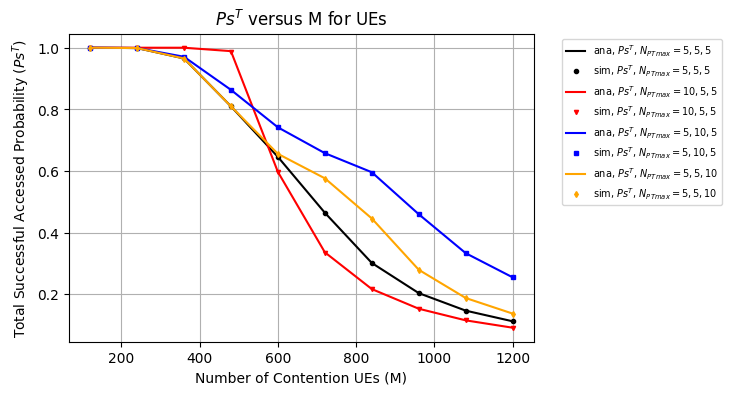

In [141]:
plt.plot(ana_1.M_4SRA, ana_1.Ps_T, '-', color = 'black', label = 'ana, $Ps^T$, $N_{PTmax}=5,5,5$')
plt.plot(sim_1.M_4SRA, sim_1.Ps_T, 'o', ms = 3, color = 'black', label = 'sim, $Ps^T$, $N_{PTmax}=5,5,5$')

plt.plot(ana_2.M_4SRA, ana_2.Ps_T, '-', color = 'red', label = 'ana, $Ps^T$, $N_{PTmax}=10,5,5$')
plt.plot(sim_2.M_4SRA, sim_2.Ps_T, 'v', ms = 3, color = 'red', label = 'sim, $Ps^T$, $N_{PTmax}=10,5,5$')

plt.plot(ana_3.M_4SRA, ana_3.Ps_T, '-', color = 'blue', label = 'ana, $Ps^T$, $N_{PTmax}=5,10,5$')
plt.plot(sim_3.M_4SRA, sim_3.Ps_T, 's', ms = 3, color = 'blue', label = 'sim, $Ps^T$, $N_{PTmax}=5,10,5$')

plt.plot(ana_4.M_4SRA, ana_4.Ps_T, '-', color = 'orange', label = 'ana, $Ps^T$, $N_{PTmax}=5,5,10$')
plt.plot(sim_4.M_4SRA, sim_4.Ps_T, 'd', ms = 3, color = 'orange', label = 'sim, $Ps^T$, $N_{PTmax}=5,5,10$')

plt.xlabel("Number of Contention UEs (M)")
plt.ylabel("Total Successful Accessed Probability ($Ps^T$)")
plt.grid(True, which="both")
plt.legend(markerscale=1, fontsize=7, loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('$Ps^T$ versus M for UEs')
plt.rcParams["figure.figsize"] = (6, 4)
plt.show()

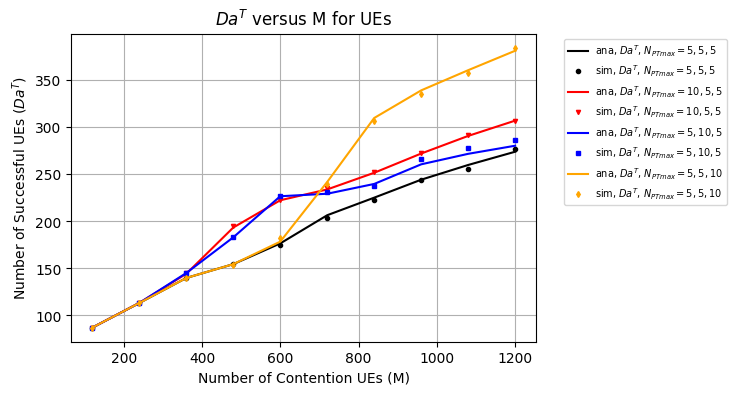

In [196]:
plt.plot(ana_1.M_4SRA, ana_1.Da_T, '-', color = 'black', label = 'ana, $Da^T$, $N_{PTmax}=5,5,5$')
plt.plot(sim_1.M_4SRA, sim_1.Da_T, 'o', ms = 3, color = 'black', label = 'sim, $Da^T$, $N_{PTmax}=5,5,5$')

plt.plot(ana_2.M_4SRA, ana_2.Da_T, '-', color = 'red', label = 'ana, $Da^T$, $N_{PTmax}=10,5,5$')
plt.plot(sim_2.M_4SRA, sim_2.Da_T, 'v', ms = 3, color = 'red', label = 'sim, $Da^T$, $N_{PTmax}=10,5,5$')

plt.plot(ana_3.M_4SRA, ana_3.Da_T, '-', color = 'blue', label = 'ana, $Da^T$, $N_{PTmax}=5,10,5$')
plt.plot(sim_3.M_4SRA, sim_3.Da_T, 's', ms = 3, color = 'blue', label = 'sim, $Da^T$, $N_{PTmax}=5,10,5$')

plt.plot(ana_4.M_4SRA, ana_4.Da_T, '-', color = 'orange', label = 'ana, $Da^T$, $N_{PTmax}=5,5,10$')
plt.plot(sim_4.M_4SRA, sim_4.Da_T, 'd', ms = 3, color = 'orange', label = 'sim, $Da^T$, $N_{PTmax}=5,5,10$')

plt.xlabel("Number of Contention UEs (M)")
plt.ylabel("Number of Successful UEs ($Da^T$)")
plt.grid(True, which="both")
plt.legend(markerscale=1, fontsize=7, loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('$Da^T$ versus M for UEs')
plt.rcParams["figure.figsize"] = (6, 4)
plt.show()

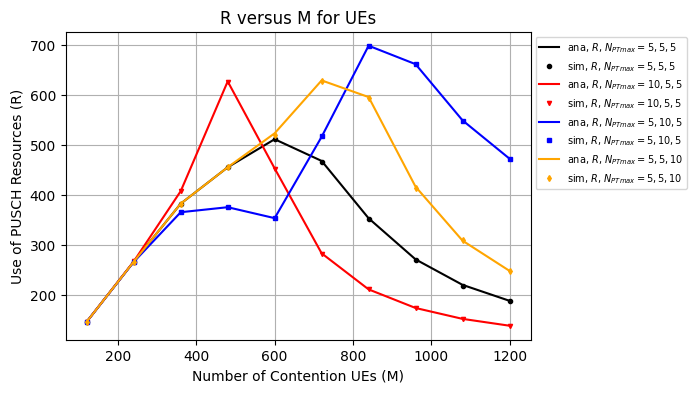

In [143]:
plt.plot(ana_1.M_4SRA, ana_1.Ur_PUSCH_T, '-', color = 'black', label = 'ana, $R$, $N_{PTmax}=5,5,5$')
plt.plot(sim_1.M_4SRA, sim_1.Ur_PUSCH_T, 'o', ms = 3, color = 'black', label = 'sim, $R$, $N_{PTmax}=5,5,5$')

plt.plot(ana_2.M_4SRA, ana_2.Ur_PUSCH_T, '-', color = 'red', label = 'ana, $R$, $N_{PTmax}=10,5,5$')
plt.plot(sim_2.M_4SRA, sim_2.Ur_PUSCH_T, 'v', ms = 3, color = 'red', label = 'sim, $R$, $N_{PTmax}=10,5,5$')

plt.plot(ana_3.M_4SRA, ana_3.Ur_PUSCH_T, '-', color = 'blue', label = 'ana, $R$, $N_{PTmax}=5,10,5$')
plt.plot(sim_3.M_4SRA, sim_3.Ur_PUSCH_T, 's', ms = 3, color = 'blue', label = 'sim, $R$, $N_{PTmax}=5,10,5$')

plt.plot(ana_4.M_4SRA, ana_4.Ur_PUSCH_T, '-', color = 'orange', label = 'ana, $R$, $N_{PTmax}=5,5,10$')
plt.plot(sim_4.M_4SRA, sim_4.Ur_PUSCH_T, 'd', ms = 3, color = 'orange', label = 'sim, $R$, $N_{PTmax}=5,5,10$')

plt.xlabel("Number of Contention UEs (M)")
plt.ylabel("Use of PUSCH Resources (R)")
plt.grid(True, which="both")
plt.legend(markerscale=1, fontsize=7, loc='upper left', bbox_to_anchor=(1, 1))
plt.title('R versus M for UEs')
plt.rcParams["figure.figsize"] = (6, 4)
plt.show()

In [7]:
ana_1 = pandas.read_csv('ana_testresult_1.csv')
ana_5 = pandas.read_csv('ana_testresult_5.csv')
ana_6 = pandas.read_csv('ana_testresult_6.csv')
ana_7 = pandas.read_csv('ana_testresult_7.csv')

sim_1 = pandas.read_csv('sim_testresult_1.csv')
sim_5 = pandas.read_csv('sim_testresult_5.csv')
sim_6 = pandas.read_csv('sim_testresult_6.csv')
sim_7 = pandas.read_csv('sim_testresult_7.csv')

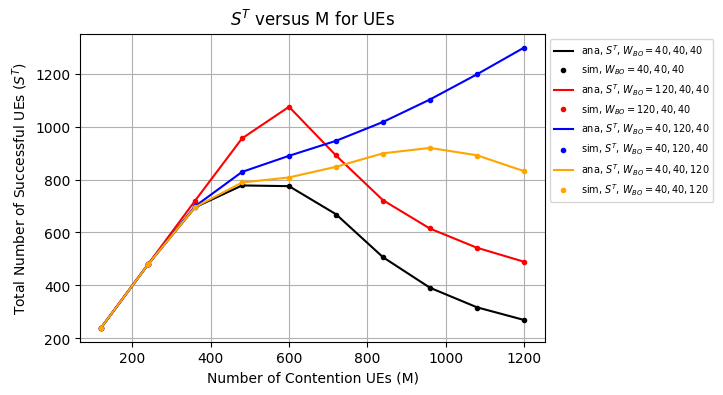

In [8]:
plt.plot(ana_1.M_4SRA, ana_1.Ms_T, '-', color = 'black', label = 'ana, $S^T$, $W_{BO}=40,40,40$')
plt.plot(sim_1.M_4SRA, sim_1.Ms_T, 'o', ms = 3, color = 'black', label = 'sim, $W_{BO}=40,40,40$')

plt.plot(ana_5.M_4SRA, ana_5.Ms_T, '-', color = 'red', label = 'ana, $S^T$, $W_{BO}=120,40,40$')
plt.plot(sim_5.M_4SRA, sim_5.Ms_T, 'o', ms = 3, color = 'red', label = 'sim, $W_{BO}=120,40,40$')

plt.plot(ana_6.M_4SRA, ana_6.Ms_T, '-', color = 'blue', label = 'ana, $S^T$, $W_{BO}=40,120,40$')
plt.plot(sim_6.M_4SRA, sim_6.Ms_T, 'o', ms = 3, color = 'blue', label = 'sim, $S^T$, $W_{BO}=40,120,40$')

plt.plot(ana_7.M_4SRA, ana_7.Ms_T, '-', color = 'orange', label = 'ana, $S^T$, $W_{BO}=40,40,120$')
plt.plot(sim_7.M_4SRA, sim_7.Ms_T, 'o', ms = 3, color = 'orange', label = 'sim, $S^T$, $W_{BO}=40,40,120$')

plt.xlabel("Number of Contention UEs (M)")
plt.ylabel("Total Number of Successful UEs ($S^T$)")
plt.grid(True, which="both")
plt.legend(markerscale=1, fontsize=7, loc='upper left', bbox_to_anchor=(1, 1))
plt.title('$S^T$ versus M for UEs')
plt.rcParams["figure.figsize"] = (6, 4)
plt.show()

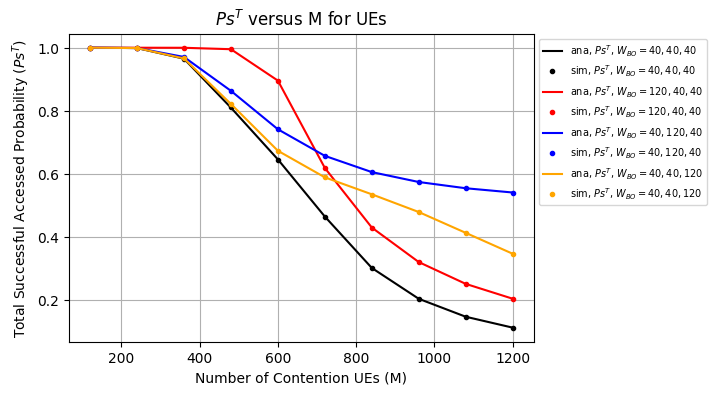

In [9]:
plt.plot(ana_1.M_4SRA, ana_1.Ps_T, '-', color = 'black', label = 'ana, $Ps^T$, $W_{BO}=40,40,40$')
plt.plot(sim_1.M_4SRA, sim_1.Ps_T, 'o', ms = 3, color = 'black', label = 'sim, $Ps^T$, $W_{BO}=40,40,40$')

plt.plot(ana_5.M_4SRA, ana_5.Ps_T, '-', color = 'red', label = 'ana, $Ps^T$, $W_{BO}=120,40,40$')
plt.plot(sim_5.M_4SRA, sim_5.Ps_T, 'o', ms = 3, color = 'red', label = 'sim, $Ps^T$, $W_{BO}=120,40,40$')

plt.plot(ana_6.M_4SRA, ana_6.Ps_T, '-', color = 'blue', label = 'ana, $Ps^T$, $W_{BO}=40,120,40$')
plt.plot(sim_6.M_4SRA, sim_6.Ps_T, 'o', ms = 3, color = 'blue', label = 'sim, $Ps^T$, $W_{BO}=40,120,40$')

plt.plot(ana_7.M_4SRA, ana_7.Ps_T, '-', color = 'orange', label = 'ana, $Ps^T$, $W_{BO}=40,40,120$')
plt.plot(sim_7.M_4SRA, sim_7.Ps_T, 'o', ms = 3, color = 'orange', label = 'sim, $Ps^T$, $W_{BO}=40,40,120$')

plt.xlabel("Number of Contention UEs (M)")
plt.ylabel("Total Successful Accessed Probability ($Ps^T$)")
plt.grid(True, which="both")
plt.legend(markerscale=1, fontsize=7, loc='upper left', bbox_to_anchor=(1, 1))
plt.title('$Ps^T$ versus M for UEs')
plt.rcParams["figure.figsize"] = (6, 4)
plt.show()

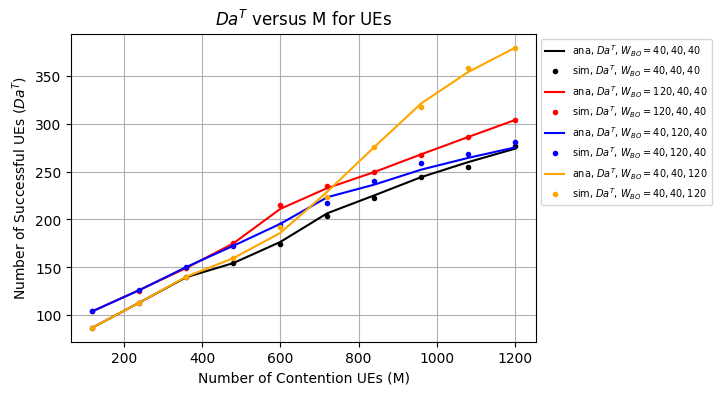

In [10]:
plt.plot(ana_1.M_4SRA, ana_1.Da_T, '-', color = 'black', label = 'ana, $Da^T$, $W_{BO}=40,40,40$')
plt.plot(sim_1.M_4SRA, sim_1.Da_T, 'o', ms = 3, color = 'black', label = 'sim, $Da^T$, $W_{BO}=40,40,40$')

plt.plot(ana_5.M_4SRA, ana_5.Da_T, '-', color = 'red', label = 'ana, $Da^T$, $W_{BO}=120,40,40$')
plt.plot(sim_5.M_4SRA, sim_5.Da_T, 'o', ms = 3, color = 'red', label = 'sim, $Da^T$, $W_{BO}=120,40,40$')

plt.plot(ana_6.M_4SRA, ana_6.Da_T, '-', color = 'blue', label = 'ana, $Da^T$, $W_{BO}=40,120,40$')
plt.plot(sim_6.M_4SRA, sim_6.Da_T, 'o', ms = 3, color = 'blue', label = 'sim, $Da^T$, $W_{BO}=40,120,40$')

plt.plot(ana_7.M_4SRA, ana_7.Da_T, '-', color = 'orange', label = 'ana, $Da^T$, $W_{BO}=40,40,120$')
plt.plot(sim_7.M_4SRA, sim_7.Da_T, 'o', ms = 3, color = 'orange', label = 'sim, $Da^T$, $W_{BO}=40,40,120$')

plt.xlabel("Number of Contention UEs (M)")
plt.ylabel("Number of Successful UEs ($Da^T$)")
plt.grid(True, which="both")
plt.legend(markerscale=1, fontsize=7, loc='upper left', bbox_to_anchor=(1, 1))
plt.title('$Da^T$ versus M for UEs')
plt.rcParams["figure.figsize"] = (6, 4)
plt.show()

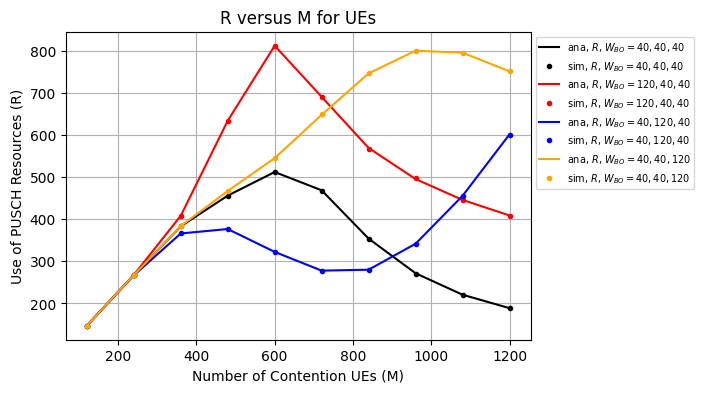

In [12]:
plt.plot(ana_1.M_4SRA, ana_1.Ur_PUSCH_T, '-', color = 'black', label = 'ana, $R$, $W_{BO}=40,40,40$')
plt.plot(sim_1.M_4SRA, sim_1.Ur_PUSCH_T, 'o', ms = 3, color = 'black', label = 'sim, $R$, $W_{BO}=40,40,40$')

plt.plot(ana_5.M_4SRA, ana_5.Ur_PUSCH_T, '-', color = 'red', label = 'ana, $R$, $W_{BO}=120,40,40$')
plt.plot(sim_5.M_4SRA, sim_5.Ur_PUSCH_T, 'o', ms = 3, color = 'red', label = 'sim, $R$, $W_{BO}=120,40,40$')

plt.plot(ana_6.M_4SRA, ana_6.Ur_PUSCH_T, '-', color = 'blue', label = 'ana, $R$, $W_{BO}=40,120,40$')
plt.plot(sim_6.M_4SRA, sim_6.Ur_PUSCH_T, 'o', ms = 3, color = 'blue', label = 'sim, $R$, $W_{BO}=40,120,40$')

plt.plot(ana_7.M_4SRA, ana_7.Ur_PUSCH_T, '-', color = 'orange', label = 'ana, $R$, $W_{BO}=40,40,120$')
plt.plot(sim_7.M_4SRA, sim_7.Ur_PUSCH_T, 'o', ms = 3, color = 'orange', label = 'sim, $R$, $W_{BO}=40,40,120$')

plt.xlabel("Number of Contention UEs (M)")
plt.ylabel("Use of PUSCH Resources (R)")
plt.grid(True, which="both")
plt.legend(markerscale=1, fontsize=7, loc='upper left', bbox_to_anchor=(1, 1))
plt.title('R versus M for UEs')
plt.rcParams["figure.figsize"] = (6, 4)
plt.show()

## **Optimization 1**

### **Experiment 1-1 : search**

In [ ]:
test_mode = 0
W_RAR_available  = [1, 2, 4, 8, 10, 20, 40, 80] # number of slots
retrans_available = [3, 4, 5, 6, 7, 8, 10, 20, 50, 100, 200] # number, len = ?
W_BO_available = [5, 10, 20, 30, 40, 60, 80, 120, 160, 240, 320, 480, 960, 1920] # ms, len = ?
opt_time_test = "on"

# arrival_rate = [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1] # lambda
arrival_rate = [0.05]
T_RAREP = 5 # 5 ms
T_sat = 5400 # 5400 sec = 90 min
T_cell = 13400 # 480000 ms = 480 sec = 8 mins # 240000 ms = 240 sec = 4 mins # 13400 ms = 13.4 sec
t_c = 5386.6 # 4920 # 5160 # 5386.6 sec # t_c = T_sat - T_cell
T_s = 1 # slot time in ms

T_RTD = 13
N = 4

D_max = 2000.0 # 250 ms
D_max_check_search = [1, 1, 1]
D_max_check_enable = "true"

m_4SRA = 1 # proportion of M_T
m_2SRA = 1 # proportion of M_T

T_RAREP_4sra = 5
T_RAR_4sra = 2
T_K2_4sra = 0.5
T_delta_4sra = 1.5
T_CR_4sra = 24

T_RAREP_2sra = 5
T_RAR_2sra = 2

# number of preamble
N_4SRA = [27]
N_2SRA = [27]
  
W_RAR_4sra = 20
W_RAR_2sra = 20

# T_access_4sra = 2 * T_RTD + 2 * T_s + T_RAR_4sra + W_RAR_4sra + T_K2_4sra + T_delta_4sra + T_CR_4sra
T_access_4sra = 2 * T_RTD + 2 * T_s + W_RAR_4sra + T_K2_4sra + T_delta_4sra + T_CR_4sra
# T_access_2sra = T_RTD + 2 * T_s + T_RAR_2sra + W_RAR_2sra
T_access_2sra = T_RTD + 2 * T_s + W_RAR_2sra

T_data = T_RTD + T_K2_4sra + N * T_s

T_RA_CMPLT_4sra = T_access_4sra + T_data
T_RA_CMPLT_2sra = T_access_2sra + T_data

T_MSG_4sra = T_RA_CMPLT_4sra
T_MSG_2sra = T_RA_CMPLT_2sra

I_max_4sra = T_cell
I_max_2sra = T_cell
I_max_FB = T_cell

M_T = [0] # M_T = []
max_Ps_T_list = [0.0 for i in range(0, len(arrival_rate))]
opt_Da_T_list = [D_max for i in range(0, len(arrival_rate))]
opt_retrans_wbo_list = [[0.0] * 6 for _ in range(0, len(arrival_rate))]

for arr in range(0, len(arrival_rate)):
  total_M = int(math.ceil(arrival_rate[arr] * T_sat)) # M_T = lambda * T_sat
  M_T[0] = total_M # M_T.append(total_M)
  M_4SRA = []
  M_2SRA = []
  for m in range(0, len(M_T)):
    M_4SRA.append(M_T[m] * (m_4SRA / (m_4SRA + m_2SRA)))
    M_2SRA.append(M_T[m] * (m_2SRA / (m_4SRA + m_2SRA)))
  M = len(M_T) + 1
  
  print("ue : ", total_M)

  # three cases (1:1, 2:1, 1:2) and constant D_max with varying M_T
  for retrans_4SRA_ite in retrans_available:
    retrans_4sra = retrans_4SRA_ite
    
    for W_BO_4SRA_ite in W_BO_available:
      W_BO_4sra = W_BO_4SRA_ite
        
      for retrans_FB_ite in retrans_available:
        retrans_FB = retrans_FB_ite

        for W_BO_FB_ite in W_BO_available:
          W_BO_FB = W_BO_FB_ite
          
          for retrans_2SRA_ite in retrans_available:
            retrans_2sra = retrans_2SRA_ite
        
            for W_BO_2SRA_ite in W_BO_available:
              W_BO_2sra = W_BO_2SRA_ite
              
              # print("retrans_4sra : ", retrans_4sra, ", retrans_2sra : ", retrans_2sra, ", retrans_FB : ", retrans_FB,
              #       ", W_BO_4sra : ", W_BO_4sra, ", W_BO_2sra : ", W_BO_2sra, ", W_BO_FB : ", W_BO_FB)

              M_4SRA, Ms_4SRA_list, Ps_4SRA_list, Da_4SRA_list, Ur_PRACH_4SRA_list, Ur_PUSCH_4SRA_list, \
                M_2SRA, Ms_2SRA_list, Ps_2SRA_list, Da_2SRA_list, Ur_PRACH_2SRA_list, Ur_PUSCH_2SRA_list, \
                  M_FB, Ms_FB_list, Ps_FB_list, Da_FB_list, Ur_PRACH_FB_list, Ur_PUSCH_FB_list, \
                    Ms_T_list, Ps_T_list, Da_2SRA_T_list, Da_T_list, \
                      Ur_PUSCH_4SRA_T_list, Ur_PUSCH_T_list, \
                        Wr_PUSCH_4SRA_T_list, Wr_PUSCH_2SRA_list, Wr_PUSCH_T_list = main(retrans_4sra, 
                                                                                         retrans_2sra, 
                                                                                         retrans_FB, 
                                                                                         W_BO_4sra, 
                                                                                         W_BO_2sra, 
                                                                                         W_BO_FB,
                                                                                         N_4SRA[0],
                                                                                         N_2SRA[0])

              # if (D_max_check_search[0] * D_max_check_search[1] * D_max_check_search[2]) == 0:
              if Da_4SRA_list[0] > D_max and Da_2SRA_list[0] > D_max and Da_FB_list[0] > D_max:
                # print("False optimal configuration")
                continue
              else:
                # print("Valid optimal configuration")
                
                if Ps_T_list[0] == max_Ps_T_list[arr] and Da_T_list[0] < opt_Da_T_list[arr]:
                  print("retrans_4sra : ", retrans_4sra, ", retrans_2sra : ", retrans_2sra, ", retrans_FB : ", retrans_FB,
                        ", W_BO_4sra : ", W_BO_4sra, ", W_BO_2sra : ", W_BO_2sra, ", W_BO_FB : ", W_BO_FB,
                        ", Ps_T_list : ", Ps_T_list[0], ", Da_T_list : ", Da_T_list[0])
                  max_Ps_T_list[arr] = Ps_T_list[0]
                  opt_Da_T_list[arr] = Da_T_list[0]
                  opt_retrans_wbo_list[arr][0] = retrans_4sra
                  opt_retrans_wbo_list[arr][1] = retrans_2sra
                  opt_retrans_wbo_list[arr][2] = retrans_FB
                  opt_retrans_wbo_list[arr][3] = W_BO_4sra
                  opt_retrans_wbo_list[arr][4] = W_BO_2sra
                  opt_retrans_wbo_list[arr][5] = W_BO_FB
                elif Ps_T_list[0] > max_Ps_T_list[arr]:
                  print("retrans_4sra : ", retrans_4sra, ", retrans_2sra : ", retrans_2sra, ", retrans_FB : ", retrans_FB,
                        ", W_BO_4sra : ", W_BO_4sra, ", W_BO_2sra : ", W_BO_2sra, ", W_BO_FB : ", W_BO_FB,
                        ", Ps_T_list : ", Ps_T_list[0], ", Da_T_list : ", Da_T_list[0])
                  max_Ps_T_list[arr] = Ps_T_list[0]
                  opt_Da_T_list[arr] = Da_T_list[0]
                  opt_retrans_wbo_list[arr][0] = retrans_4sra
                  opt_retrans_wbo_list[arr][1] = retrans_2sra
                  opt_retrans_wbo_list[arr][2] = retrans_FB
                  opt_retrans_wbo_list[arr][3] = W_BO_4sra
                  opt_retrans_wbo_list[arr][4] = W_BO_2sra
                  opt_retrans_wbo_list[arr][5] = W_BO_FB
                # else:
                #   break

  print(max_Ps_T_list, opt_Da_T_list, opt_retrans_wbo_list)
              
columns = ["Lambda", "Ps_T", "Da_T", "retrans_wbo"]
                
data = {"Lambda": arrival_rate, "Ps_T": max_Ps_T_list, "Da_T": opt_Da_T_list, "retrans_wbo": opt_retrans_wbo_list}     
           
result = pandas.DataFrame(data)
cvs_pandas = result.to_csv("ana_testresult_search.csv", mode='a+', index=False, header=True, columns=columns)

opt_test = "off"

### **Experiment 1-2 : opt**

In [ ]:
test_mode = 0
W_RAR_available  = [1, 2, 4, 8, 10, 20, 40, 80] # number of slots
retrans_available = [3, 4, 5, 6, 7, 8, 10, 20, 50, 100, 200] # number, len = ?
W_BO_available = [5, 10, 20, 30, 40, 60, 80, 120, 160, 240, 320, 480, 960, 1920] # ms, len = ?
opt_time_test = "on"

# arrival_rate = [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1] # lambda
arrival_rate = [0.05]
T_RAREP = 5 # 5 ms
T_sat = 5400 # 5400 sec = 90 min
T_cell = 13400 # 480000 ms = 480 sec = 8 mins # 240000 ms = 240 sec = 4 mins # 13400 ms = 13.4 sec
t_c = 5386.6 # 4920 # 5160 # 5386.6 sec # t_c = T_sat - T_cell
T_s = 1 # slot time in ms

T_RTD = 13
N = 4

D_max = 2000.0 # 250 ms
D_max_check_search = [0, 0, 0]
D_max_check_search_enable = "false"

m_4SRA = 1 # proportion of M_T
m_2SRA = 1 # proportion of M_T

T_RAREP_4sra = 5
T_RAR_4sra = 2
T_K2_4sra = 0.5
T_delta_4sra = 1.5
T_CR_4sra = 24

T_RAREP_2sra = 5
T_RAR_2sra = 2

# number of preamble
N_4SRA = [27]
N_2SRA = [27]
  
W_RAR_4sra = 20
W_RAR_2sra = 20

# T_access_4sra = 2 * T_RTD + 2 * T_s + T_RAR_4sra + W_RAR_4sra + T_K2_4sra + T_delta_4sra + T_CR_4sra
T_access_4sra = 2 * T_RTD + 2 * T_s + W_RAR_4sra + T_K2_4sra + T_delta_4sra + T_CR_4sra
# T_access_2sra = T_RTD + 2 * T_s + T_RAR_2sra + W_RAR_2sra
T_access_2sra = T_RTD + 2 * T_s + W_RAR_2sra

T_data = T_RTD + T_K2_4sra + N * T_s

T_RA_CMPLT_4sra = T_access_4sra + T_data
T_RA_CMPLT_2sra = T_access_2sra + T_data

T_MSG_4sra = T_RA_CMPLT_4sra
T_MSG_2sra = T_RA_CMPLT_2sra

I_max_4sra = T_cell
I_max_2sra = T_cell
I_max_FB = T_cell

M_T = [0] # M_T = []
max_Ps_T_list = [0.0 for i in range(0, len(arrival_rate))]
opt_Da_T_list = [D_max for i in range(0, len(arrival_rate))]
opt_retrans_wbo_list = [[0.0] * 6 for _ in range(0, len(arrival_rate))]

for arr in range(0, len(arrival_rate)):
  total_M = int(math.ceil(arrival_rate[arr] * T_sat)) # M_T = lambda * T_sat
  M_T[0] = total_M # M_T.append(total_M)
  M_4SRA = []
  M_2SRA = []
  for m in range(0, len(M_T)):
    M_4SRA.append(M_T[m] * (m_4SRA / (m_4SRA + m_2SRA)))
    M_2SRA.append(M_T[m] * (m_2SRA / (m_4SRA + m_2SRA)))
  M = len(M_T) + 1
  
  print("ue : ", total_M)

  # three cases (1:1, 2:1, 1:2) and constant D_max with varying M_T
  for retrans_4SRA_ite in retrans_available:
    retrans_4sra = retrans_4SRA_ite
    
    for W_BO_4SRA_ite in W_BO_available:
      W_BO_4sra = W_BO_4SRA_ite
        
      for retrans_FB_ite in retrans_available:
        retrans_FB = retrans_FB_ite

        for W_BO_FB_ite in W_BO_available:
          W_BO_FB = W_BO_FB_ite
          
          for retrans_2SRA_ite in retrans_available:
            retrans_2sra = retrans_2SRA_ite
        
            for W_BO_2SRA_ite in W_BO_available:
              W_BO_2sra = W_BO_2SRA_ite
              
              # print("retrans_4sra : ", retrans_4sra, ", retrans_2sra : ", retrans_2sra, ", retrans_FB : ", retrans_FB,
              #       ", W_BO_4sra : ", W_BO_4sra, ", W_BO_2sra : ", W_BO_2sra, ", W_BO_FB : ", W_BO_FB)
              
              # M_4SRA, Ms_4SRA_list, Ps_4SRA_list, Da_4SRA_list, Ur_PRACH_4SRA_list, Ur_PUSCH_4SRA_list, M_2SRA, Ms_2SRA_list, Ps_2SRA_list, Da_2SRA_list, Ur_PRACH_2SRA_list, Ur_PUSCH_2SRA_list, j_start, M_FB, Ms_FB_list, Ps_FB_list, Da_FB_list, Ur_PRACH_FB_list, Ur_PUSCH_FB_list, Ms_T_list, Ps_T_list, Da_2SRA_T_list, Da_T_list, Ur_PUSCH_4SRA_T_list, Ur_PUSCH_T_list = main(retrans_4sra, retrans_2sra, retrans_FB, W_BO_4sra, W_BO_2sra, W_BO_FB)
              
              I_RA_4sra = I_RA_slot("4SRA", T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, 0, retrans_4sra)
              I_RA_2sra = I_RA_slot("2SRA", T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, 0, retrans_2sra)
              I_RA_FB = I_RA_slot("FB", T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_FB, retrans_2sra, retrans_FB)
              
              D_max_check_4sra = D_max_check_opt(I_RA_4sra, T_RAREP_4sra, T_RA_CMPLT_4sra, D_max)
              D_max_check_2sra = D_max_check_opt(I_RA_2sra, T_RAREP_2sra, T_RA_CMPLT_2sra, D_max)
              D_max_check_FB = D_max_check_opt(I_RA_FB, T_RAREP_4sra, T_RA_CMPLT_4sra, D_max)
              
              if (D_max_check_4sra * D_max_check_2sra * D_max_check_FB) == 0:
                # print("False optimal configuration")
                continue
              else:
                # print("Valid optimal configuration")
                
                M_4SRA, Ms_4SRA_list, Ps_4SRA_list, Da_4SRA_list, Ur_PRACH_4SRA_list, Ur_PUSCH_4SRA_list, \
                  M_2SRA, Ms_2SRA_list, Ps_2SRA_list, Da_2SRA_list, Ur_PRACH_2SRA_list, Ur_PUSCH_2SRA_list, \
                    M_FB, Ms_FB_list, Ps_FB_list, Da_FB_list, Ur_PRACH_FB_list, Ur_PUSCH_FB_list, \
                      Ms_T_list, Ps_T_list, Da_2SRA_T_list, Da_T_list, \
                        Ur_PUSCH_4SRA_T_list, Ur_PUSCH_T_list, \
                          Wr_PUSCH_4SRA_T_list, Wr_PUSCH_2SRA_list, Wr_PUSCH_T_list = main(retrans_4sra, 
                                                                                           retrans_2sra, 
                                                                                           retrans_FB, 
                                                                                           W_BO_4sra, 
                                                                                           W_BO_2sra, 
                                                                                           W_BO_FB,
                                                                                           N_4SRA[0],
                                                                                           N_2SRA[0])
                
                if Ps_T_list[0] == max_Ps_T_list[arr] and Da_T_list[0] < opt_Da_T_list[arr]:
                  print("retrans_4sra : ", retrans_4sra, ", retrans_2sra : ", retrans_2sra, ", retrans_FB : ", retrans_FB,
                        ", W_BO_4sra : ", W_BO_4sra, ", W_BO_2sra : ", W_BO_2sra, ", W_BO_FB : ", W_BO_FB,
                        ", Ps_T_list : ", Ps_T_list[0], ", Da_T_list : ", Da_T_list[0])
                  max_Ps_T_list[arr] = Ps_T_list[0]
                  opt_Da_T_list[arr] = Da_T_list[0]
                  opt_retrans_wbo_list[arr][0] = retrans_4sra
                  opt_retrans_wbo_list[arr][1] = retrans_2sra
                  opt_retrans_wbo_list[arr][2] = retrans_FB
                  opt_retrans_wbo_list[arr][3] = W_BO_4sra
                  opt_retrans_wbo_list[arr][4] = W_BO_2sra
                  opt_retrans_wbo_list[arr][5] = W_BO_FB
                elif Ps_T_list[0] > max_Ps_T_list[arr]:
                  print("retrans_4sra : ", retrans_4sra, ", retrans_2sra : ", retrans_2sra, ", retrans_FB : ", retrans_FB,
                        ", W_BO_4sra : ", W_BO_4sra, ", W_BO_2sra : ", W_BO_2sra, ", W_BO_FB : ", W_BO_FB,
                        ", Ps_T_list : ", Ps_T_list[0], ", Da_T_list : ", Da_T_list[0])
                  max_Ps_T_list[arr] = Ps_T_list[0]
                  opt_Da_T_list[arr] = Da_T_list[0]
                  opt_retrans_wbo_list[arr][0] = retrans_4sra
                  opt_retrans_wbo_list[arr][1] = retrans_2sra
                  opt_retrans_wbo_list[arr][2] = retrans_FB
                  opt_retrans_wbo_list[arr][3] = W_BO_4sra
                  opt_retrans_wbo_list[arr][4] = W_BO_2sra
                  opt_retrans_wbo_list[arr][5] = W_BO_FB
                # else:
                #   break
  
  print(max_Ps_T_list, opt_Da_T_list, opt_retrans_wbo_list)
              
columns = ["Lambda", "Ps_T", "Da_T", "retrans_wbo"]
                
data = {"Lambda": arrival_rate, "Ps_T": max_Ps_T_list, "Da_T": opt_Da_T_list, "retrans_wbo": opt_retrans_wbo_list}     
           
result = pandas.DataFrame(data)
cvs_pandas = result.to_csv("ana_testresult_opt.csv", mode='a+', index=False, header=True, columns=columns)

opt_test = "off"


### **Experiment 2-1 : search**

In [ ]:
def main_opt_resource(retrans_4sra, retrans_2sra, retrans_FB, W_BO_4sra, W_BO_2sra, W_BO_FB, N_4SRA, N_2SRA, slot):
  # initail number of fallback UE
  M_FB = [0.0 for i in range(0, M - 1)]

  Ms_4SRA_list = [0.0 for i in range(0, len(M_4SRA))]
  Mf_4SRA_list = [0.0 for i in range(0, len(M_4SRA))]
  Ps_4SRA_list = [0.0 for i in range(0, len(M_4SRA))]
  Da_4SRA_list = [0.0 for i in range(0, len(M_4SRA))]
  Ur_PRACH_4SRA_list = [0.0 for i in range(0, len(M_4SRA))]
  Ur_PUSCH_4SRA_list = [0.0 for i in range(0, len(M_4SRA))]
  MiSn_4SRA_list = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
  # MiSn_4SRA_list = [0.0 for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]

  Ms_2SRA_list = [0.0 for i in range(0, len(M_2SRA))]
  Mf_2SRA_list = [0.0 for i in range(0, len(M_2SRA))]
  Ps_2SRA_list = [0.0 for i in range(0, len(M_2SRA))]
  Da_2SRA_list = [0.0 for i in range(0, len(M_2SRA))]
  Ur_PRACH_2SRA_list = [0.0 for i in range(0, len(M_2SRA))]
  Ur_PUSCH_2SRA_list = [0.0 for i in range(0, len(M_2SRA))]
  MiSn_2SRA_list = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
  # MiSn_2SRA_list = [0.0 for i in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra) + 1)]

  Ms_FB_list = [0.0 for i in range(0, len(M_4SRA))]
  Mf_FB_list = [0.0 for i in range(0, len(M_4SRA))]
  Ps_FB_list = [0.0 for i in range(0, len(M_4SRA))]
  Da_FB_list = [0.0 for i in range(0, len(M_4SRA))]
  Ur_PRACH_FB_list = [0.0 for i in range(0, len(M_4SRA))]
  Ur_PUSCH_FB_list = [0.0 for i in range(0, len(M_4SRA))]
  MiSn_FB_list = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
  # MiSn_FB_list = [0.0 for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]

  Ms_T_list = [0.0 for i in range(0, M - 1)]
  Ps_T_list = [0.0 for i in range(0, M - 1)]
  Da_2SRA_T_list = [0.0 for i in range(0, M - 1)]
  Da_T_list = [0.0 for i in range(0, M - 1)]
  Ur_PRACH_T_list = [0.0 for i in range(0, M - 1)]
  Ur_PUSCH_4SRA_T_list = [0.0 for i in range(0, M - 1)]
  Ur_PUSCH_T_list = [0.0 for i in range(0, M - 1)]
  Wr_PUSCH_4SRA_T_list = [0.0 for i in range(0, M - 1)]
  Wr_PUSCH_2SRA_list = [0.0 for i in range(0, M - 1)]
  Wr_PUSCH_T_list = [0.0 for i in range(0, M - 1)]
  MiSn_T_list = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
  # MiSn_T_list = [0.0 for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]

  Slot = [i for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
  # Slot = [i for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]
  Mi_FB_list = [0.0 for i in range(0, len(Slot))]
  
  j_list = [0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
  j_start = 0.0

  for ue in range(0, M - 1):
    if opt_time_test == "off" or opt_resource_test == "off":
      print("ue : ", M_2SRA[ue] + M_4SRA[ue])
    # initial the MiSn and MiFn: Mi[slot][num of trans + 1]
    # the last time of retrans needed to be ignored
    '''
    MiCn_4SRA = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]
    MiSn_4SRA = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]
    MiFn_4SRA = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]
    T_4SRA = [0.0 for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]

    MiCn_2SRA = [[0.0] * int((retrans_2sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra) + 1)]
    MiSn_2SRA = [[0.0] * int((retrans_2sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra) + 1)]
    MiFn_2SRA = [[0.0] * int((retrans_2sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra) + 1)]
    T_2SRA = [0.0 for i in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra) + 1)]

    MiCn_FB = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]
    MiSn_FB = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]
    MiFn_FB = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]
    T_FB = [0.0 for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]
    '''
    MiCn_4SRA = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    MiSn_4SRA = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    MiFn_4SRA = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    Mi_Wr_PUSCH_4SRA_FB = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    T_4SRA = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]

    MiCn_2SRA = [[0.0] * int((retrans_2sra + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    MiSn_2SRA = [[0.0] * int((retrans_2sra + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    MiFn_2SRA = [[0.0] * int((retrans_2sra + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    Mi_Wr_PUSCH_2SRA = [N_2SRA for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    T_2SRA = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]

    MiCn_FB = [[0.0] * int((retrans_FB + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    MiSn_FB = [[0.0] * int((retrans_FB + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    MiFn_FB = [[0.0] * int((retrans_FB + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    T_FB = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]

    # num of total UE in slot 0
    # MiFn_2SRA[0][0] = M_2SRA[ue]
    # MiFn_2SRA[0][0] = traffic_arrival(M_2SRA[ue], T_sat, t_c, T_s, T_RAREP_2sra)[0] + uniform_test
    delta_2SRA, uniform_2SRA, interval_2SRA = traffic_arrival(traffic_mode, M_2SRA[ue], T_sat, t_c, T_s, T_RAREP_2sra)
    if pre_backoff == "off":
      MiFn_2SRA[0][0] = delta_2SRA
    elif pre_backoff == "on":
      for prebackoff_slot in range(0, math.ceil(pre_backoff_wbo / T_RAREP_2sra)):
        MiFn_2SRA[prebackoff_slot][0] = delta_2SRA / math.ceil(pre_backoff_wbo / T_RAREP_2sra)
    if interval_2SRA[0] == -1:
      for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1):
        # print(traffic_arrival(M_2SRA[ue], T_sat, t_c, T_s)[1])
        # MiFn_2SRA[i][0] += uniform_test
        MiFn_2SRA[i][0] += uniform_2SRA
    else:
      for i in range(0, len(interval_2SRA)):
        MiFn_2SRA[interval_2SRA[i]][0] += uniform_2SRA
    # print(np.matrix(MiFn_2SRA))

    # 2SRA procedure sure be finished before 4SRA procedure
    for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
    # for i in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra)):
      # print("i = ", i, "\n")
      kmin_2sra = find_kmin(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, i)
      kmax_2sra = find_kmax(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, i)
      # print("kmin = ", kmin, "kmax = ", kmax, "\n")
      m_2SRA_accum = 0
      for n in range(0, int(retrans_2sra + 1)):
        m_2SRA_accum += MiFn_2SRA[i][n] # Mi
      # print("m_2SRA_accum = ", m_2SRA_accum)

      if N_2SRA == 0:
        E_M = 0
      else:
        E_M = np.exp(-(m_2SRA_accum / N_2SRA))
        # print("i =", i, ",E_M =", E_M)

      for n in range(0, int(retrans_2sra + 1)):
        # print("n = ", n, "\n")
        k_list_2SRA = []
        # if the waiting time for receiving MSG2 is larger than T_RAREP
        k_shift_2SRA = math.ceil((T_RAR_2sra + W_RAR_2sra) / T_RAREP_2sra)
        # print("k_shift_2SRA", k_shift_2SRA)
        if MiFn_2SRA[i][n] != 0:
          for k in range(int(kmin_2sra), int(kmax_2sra + 1)):
            # print("k = ", k, "\n")
            alpha_2sra = find_alpha(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, i, k, kmin_2sra, kmax_2sra)
            if preamble_detection == "false":
              k_list_2SRA.append(alpha_2sra * (MiFn_2SRA[i][n] * (1.0 - E_M)))
              # k_list_2SRA.append(alpha * MiCn_2SRA[i][n])
            elif preamble_detection == "true":
              if i == 0:
                # transmit the first preamble
                if n == 0 and MiFn_2SRA[i][n] * E_M * P_N(n + 1) >= N_UL_2sra:
                  k_list_2SRA.append(alpha_2sra * (MiFn_2SRA[i][n] - N_UL_2sra))
                elif n == 0 and MiFn_2SRA[i][n] * E_M * P_N(n + 1) < N_UL_2sra:
                  k_list_2SRA.append(alpha_2sra * (MiFn_2SRA[i][n] * (1.0 - E_M * P_N(n + 1))))
                elif n != 0:
                  k_list_2SRA.append(alpha_2sra * (0))
              else:
                total_MiFn_2SRA = 0
                for n_2sra in range(0, int(retrans_2sra + 1)):
                  total_MiFn_2SRA += MiFn_2SRA[i][n_2sra] * E_M * P_N(n_2sra + 1)
                # print("n =", n, ",total_MiFn_2SRA =", total_MiFn_2SRA)
                # print("P_N =", P_N, ",MiFn_2SRA[i][n] * E_M * P_N =", MiFn_2SRA[i][n] * E_M * P_N)
                if total_MiFn_2SRA <= N_UL_2sra:
                  k_list_2SRA.append(alpha_2sra * (MiFn_2SRA[i][n] * (1.0 - E_M * P_N(n + 1))))
                  # k_list_2SRA.append(alpha * MiCn_2SRA[i][n])
                else:
                  k_list_2SRA.append(alpha_2sra * (MiFn_2SRA[i][n] - (((MiFn_2SRA[i][n] * E_M * P_N(n + 1)) / total_MiFn_2SRA) * N_UL_2sra)))
                  # print("S =", (MiFn_2SRA[i][n] * E_M * P_N) / total_MiFn_2SRA)
                  # print("S' =", ((MiFn_2SRA[i][n] * E_M * P_N) / total_MiFn_2SRA) * N_UL_2sra)
                  # print("F-S' =", MiFn_2SRA[i][n] - (((MiFn_2SRA[i][n] * E_M * P_N) / total_MiFn_2SRA) * N_UL_2sra))
                  # print("alpha*(F-S') =", alpha * (MiFn_2SRA[i][n] - (((MiFn_2SRA[i][n] * E_M * P_N) / total_MiFn_2SRA) * N_UL_2sra)))

                  # k_list_2SRA.append(alpha * (MiFn_2SRA[i][n] - MiSn_2SRA[i][n]))
            # print("alpha = ", alpha, "\n")
          # process the data to put it into array like type 1
          # print("k_list_2SRA", len(k_list_2SRA))
          for itr_k in range(0, len(k_list_2SRA)):
            # print("i + itr_k + k_shift_2SRA", i + itr_k + k_shift_2SRA)
            # if you find problem after adjusting the parameters, you need to set T_RAREP > T_RAR + W_RAR
            # if you still want to set T_RAREP < T_RAR + W_RAR, you need to change the value "1" in "i + itr_k + 1"
            # print(k_list_2SRA[(len(k_list_2SRA) - 1) - itr_k])
            if (i + itr_k + k_shift_2SRA) <= test_maxslot(I_max_4sra, I_max_2sra, I_max_FB):
              MiFn_2SRA[i + itr_k + k_shift_2SRA][n + 1] += k_list_2SRA[(len(k_list_2SRA) - 1) - itr_k]
            # print("MiCn = ", MiFn[i][n] * (1.0 - E_M), "\n")
            # print(np.matrix(MiFn))
      # print("MiFn_2SRA", MiFn_2SRA[i])

      for n in range(0, int(retrans_2sra + 1)):
        # move MiSn and MiCn calculation part above the kmin, kma, alpha calculation part
        if preamble_detection == "false":
          # the RA complete time exceeds the coverage time
          if (i + T_RA_CMPLT_2sra) > T_cell:
            MiSn_2SRA[i][n] = 0
            MiCn_2SRA[i][n] = MiFn_2SRA[i][n]
          # the RA complete time still in the coverage time
          else:
            MiSn_2SRA[i][n] = MiFn_2SRA[i][n] * E_M
            MiCn_2SRA[i][n] = MiFn_2SRA[i][n] * (1.0 - E_M)
          '''
          MiSn_2SRA[i][n] = MiFn_2SRA[i][n] * E_M
          MiCn_2SRA[i][n] = MiFn_2SRA[i][n] * (1.0 - E_M)
          '''
        elif preamble_detection == "true":
          # transmission at the first RA slot
          if i == 0:
            # transmit the first preamble
            if n == 0 and MiFn_2SRA[i][n] * E_M * P_N(n + 1) >= N_UL_2sra:
              MiSn_2SRA[i][n] = N_UL_2sra
              MiCn_2SRA[i][n] = MiFn_2SRA[i][n] - N_UL_2sra
            elif n == 0 and MiFn_2SRA[i][n] * E_M * P_N(n + 1) < N_UL_2sra:
              MiSn_2SRA[i][n] = MiFn_2SRA[i][n] * E_M * P_N(n + 1)
              MiCn_2SRA[i][n] = MiFn_2SRA[i][n] * (1.0 - E_M * P_N(n + 1))
            elif n != 0:
              MiSn_2SRA[i][n] = 0
              MiCn_2SRA[i][n] = 0
          else:
            # the RA complete time exceeds the coverage time
            if (i + T_RA_CMPLT_2sra) > T_cell:
              MiSn_2SRA[i][n] = 0
              MiCn_2SRA[i][n] = MiFn_2SRA[i][n]
            # the RA complete time still in the coverage time
            else:
              total_MiFn_2SRA = 0
              for n_2sra in range(0, int(retrans_2sra + 1)):
                # print("n_2sra", n_2sra, "MiFn_2SRA_Loop", MiFn_2SRA[i][n_2sra] * E_M * (1 - (1 / math.exp(n_2sra + 1))))
                total_MiFn_2SRA += MiFn_2SRA[i][n_2sra] * E_M * P_N(n_2sra + 1)
              # transmission at the rest of RA slot
              if total_MiFn_2SRA <= N_UL_2sra:
                MiSn_2SRA[i][n] = MiFn_2SRA[i][n] * E_M * P_N(n + 1)
              else:
                # print("MiFn_2SRA_One", MiFn_2SRA[i][n] * E_M * P_N, total_MiFn_2SRA)
                MiSn_2SRA[i][n] = ((MiFn_2SRA[i][n] * E_M * P_N(n + 1)) / total_MiFn_2SRA) * N_UL_2sra
              MiCn_2SRA[i][n] = MiFn_2SRA[i][n] - MiSn_2SRA[i][n]
        # if n == retrans_2sra:
        #   if (MiCn_2SRA[i][n]) != 0:
        #     M_FB[ue] += MiCn_2SRA[i][n]
        #     Mi_FB_list[i + 1] += MiCn_2SRA[i][n]
        #     MiFn_FB[i + 1][0] += MiCn_2SRA[i][n]
      # print("MiCn_2SRA", MiCn_2SRA[i])
      # print("MiSn_2SRA", MiSn_2SRA[i])
      # print("--------------------------------------------------------------------")

      # define delay
      if payload_decoding == "true":
        # T_2SRA[i] = (i - 1) * T_RAREP_2sra + T_RAR_2sra + W_RAR_2sra + 9 + T_total_2sra + T_MSG_2sra
        # T_2SRA[i] = (i - 1) * T_RAREP_2sra + T_RAR_2sra + W_RAR_2sra + T_MSG_2sra
        T_2SRA[i] = (i - 1) * T_RAREP_2sra + T_MSG_2sra
      elif payload_decoding == "false":
        # T_2SRA[i] = (i - 1) * T_RAREP_2sra + T_RAR_2sra + W_RAR_2sra + 9 + T_total_2sra
        # T_2SRA[i] = (i - 1) * T_RAREP_2sra + T_RAR_2sra + W_RAR_2sra + 1
        T_2SRA[i] = (i - 1) * T_RAREP_2sra + T_RA_CMPLT_2sra

    # print("-------------------------------------------------------------")
    # num of total UE in slot 0
    # MiFn_4SRA[0][0] = M_4SRA[ue]
    # MiFn_4SRA[0][0] = traffic_arrival(M_4SRA[ue], T_sat, t_c, T_s, T_RAREP_4sra)[0] + uniform_test
    delta_4SRA, uniform_4SRA, interval_4SRA = traffic_arrival(traffic_mode, M_4SRA[ue], T_sat, t_c, T_s, T_RAREP_4sra)
    if pre_backoff == "off":
      MiFn_4SRA[0][0] = delta_4SRA
    elif pre_backoff == "on":
      for prebackoff_slot in range(0, math.ceil(pre_backoff_wbo / T_RAREP_4sra)):
        MiFn_4SRA[prebackoff_slot][0] = delta_4SRA / math.ceil(pre_backoff_wbo / T_RAREP_4sra)
    if interval_4SRA[0] == -1:
      for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1):
        # MiFn_4SRA[i][0] += uniform_test
        MiFn_4SRA[i][0] += uniform_4SRA
    else:
      for i in range(0, len(interval_4SRA)):
        MiFn_4SRA[interval_4SRA[i]][0] += uniform_4SRA
    
    # sum all the failed 2SRA UE to become total number of M_FB
    '''
    if T_RAREP_4sra < T_RAREP_2sra:
      for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
      # for i in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra)):
        # if (MiCn_2SRA[i][3]) != 0: -> cannot use this condition, it will make error
        M_FB[ue] += MiCn_2SRA[i][3]
        # print(M_FB[ue], MiCn_2SRA[i])
        # jmin and jmax must minus 2 here to fix the problem caused by starting slot i = 0
        jmin = find_jmin(T_RAREP_4sra, T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, i) - 2
        jmax = find_jmax(T_RAREP_4sra, T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, i) - 2
        # print(i - 1, jmax, jmin)
        if jmax == jmin:
          MiFn_FB[i - 1][0] = MiCn_2SRA[int(jmax)][retrans_2sra]
        # print(MiFn_FB[i])
    if T_RAREP_4sra == T_RAREP_2sra:
      for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
      # for i in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra)):
        if (MiCn_2SRA[i][retrans_2sra]) != 0:
          M_FB[ue] += MiCn_2SRA[i][retrans_2sra]
          # print(M_FB[ue], MiCn_2SRA[i])
          jmax = find_jmax(T_RAREP_4sra, T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, i) - 2
          # print(i, jmax)
          MiFn_FB[i - 1][0] = MiCn_2SRA[int(jmax)][retrans_2sra]
          # print(MiFn_FB[i])
    if T_RAREP_4sra > T_RAREP_2sra:
      # max value of i iteration could be 4sra or 2sra, they will still have the same result
      for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
      # for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra)):
        if (MiCn_2SRA[i][3]) != 0:
          M_FB[ue] += MiCn_2SRA[i][3]
          # print(MiCn_2SRA[i])
          # jmin and jmax must minus 2 here to fix the problem caused by starting slot i = 0
          jmin = find_jmin(T_RAREP_4sra, T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, i) - 2
          jmax = find_jmax(T_RAREP_4sra, T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, i) - 2
          # print(i, jmin, jmax)
          for j in range(int(jmin), int(jmax + 1)):
            MiFn_FB[i - 1][0] += MiCn_2SRA[j][retrans_2sra]
          # print(MiFn_FB[i])
          # print("---------------------------------------------")
    # print(np.matrix(MiCn_2SRA))
    # print(np.matrix(MiFn_FB))
    '''
    
    # for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
    #   print(MiCn_2SRA[i])
    # print("---------------------------------")
    # for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):  
    #   print(MiFn_FB[i])
    # print("---------------------------------")
    # This part is just to find the start point of j, just used to verify the I_RA
    # to check in all MiCn_2SRA, whether they have 1 in all value
    j_mode_check = 0
    for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
      if (MiCn_2SRA[i][retrans_2sra]) >= 1:
        j_mode_check = 1
    for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
    # for i in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra)):
      if (MiCn_2SRA[i][retrans_2sra]) != 0:
        M_FB[ue] += MiCn_2SRA[i][retrans_2sra]
        Mi_FB_list[i + 1] += MiCn_2SRA[i][retrans_2sra]
        # print(M_FB[ue], MiCn_2SRA[i])
        j = find_jmax(T_RAREP_4sra, T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, i) - 2
        # print(i, j)
        # if without j_mode_check, the j_list[i] cannot have correct value
        if j_mode_check == 1:
          if (MiCn_2SRA[i][retrans_2sra]) >= 1:
            j_list[i] = j
        elif j_mode_check == 0:
          j_list[i] = j
        if (int(j)) <= test_maxslot(I_max_4sra, I_max_2sra, I_max_FB):
          MiFn_FB[i + 1][0] = MiCn_2SRA[int(j)][retrans_2sra]
        # print(MiFn_FB[i])
      # print("i = ", i, "; j = ", j_list[i])
    # print(j_list)
    # find the first non-zero value of the j_list, to offset the start of the FB procedure
    j_start = next((i for i, x in enumerate(j_list) if x), 0)
    # print(j_start)
    # print("####################################")

    # 4SRA procedure
    for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
    # for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra)):
      # print("i = ", i, "\n")
      kmin_4sra = find_kmin(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, i)
      kmax_4sra = find_kmax(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, i)
      kmin_FB = find_kmin(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_FB, i)
      kmax_FB = find_kmax(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_FB, i)
      # print("kmin = ", kmin, "kmax = ", kmax, "\n")
      m_4SRA_accum = 0
      m_FB_accum = 0
      for n in range(0, int(retrans_4sra + 1)):
        m_4SRA_accum += MiFn_4SRA[i][n] # Mi
      for n in range(0, int(retrans_FB + 1)):
        m_FB_accum += MiFn_FB[i][n] # Mi

      if N_4SRA == 0:
        E_M = 0
      else:
        E_M = np.exp(-((m_4SRA_accum + m_FB_accum) / N_4SRA))

      # In case of we use different "retrans" for 4SRA and Fallback
      for n in range(0, int(min(retrans_4sra, retrans_FB) + 1)):
        # print("n = ", n, "\n")
        k_list_4SRA = []
        k_list_FB = []
        # if the waiting time for receiving MSG2 is larger than T_RAREP
        k_shift_4SRA = math.ceil((T_RAR_4sra + W_RAR_4sra) / T_RAREP_4sra)
        # print("k_shift_4SRA", k_shift_4SRA)
        k_shift_FB = math.ceil((T_RAR_4sra + W_RAR_4sra) / T_RAREP_4sra)
        # print("k_shift_FB", k_shift_FB)
        if (MiFn_4SRA[i][n] + MiFn_FB[i][n]) != 0:
          for k in range(int(kmin_4sra), int(kmax_4sra + 1)):
            # print("k = ", k, "\n")
            alpha_4SRA = find_alpha(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, i, k, kmin_4sra, kmax_4sra)
            if preamble_detection == "false":
              k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] * (1.0 - E_M)))
              # k_list_4SRA.append(alpha_4SRA * MiCn_4SRA[i][n])
            elif preamble_detection == "true":
              if i == 0:
                # transmit the first preamble
                if n == 0 and MiFn_4SRA[i][n] * E_M * P_N(n + 1) >= N_UL_4sra:
                  k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] - N_UL_4sra))
                elif n == 0 and MiFn_4SRA[i][n] * E_M * P_N(n + 1) < N_UL_4sra:
                  k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] * (1.0 - E_M * P_N(n + 1))))
                elif n != 0:
                  k_list_4SRA.append(alpha_4SRA * (0))
              else:
                total_MiFn_4SRA_FB = 0
                for n_4sra in range(0, int(retrans_4sra + 1)):
                  total_MiFn_4SRA_FB += (MiFn_4SRA[i][n_4sra]) * E_M * P_N(n_4sra + 1)
                for n_FB in range(0, int(retrans_FB + 1)):
                  total_MiFn_4SRA_FB += (MiFn_FB[i][n_FB]) * E_M * P_N(n_FB + 1)
                if total_MiFn_4SRA_FB <= N_UL_4sra:
                  k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] * (1.0 - E_M * P_N(n + 1))))
                  # k_list_4SRA.append(alpha_4SRA * MiCn_4SRA[i][n])
                else:
                  k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] - (((MiFn_4SRA[i][n] * E_M * P_N(n + 1)) / total_MiFn_4SRA_FB) * N_UL_4sra)))
                  # k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] - MiSn_4SRA[i][n]))
          for k in range(int(kmin_FB), int(kmax_FB + 1)):
            # print("k = ", k, "\n")
            alpha_FB = find_alpha(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_FB, i, k, kmin_FB, kmax_FB)
            if preamble_detection == "false":
              k_list_FB.append(alpha_FB * (MiFn_FB[i][n] * (1.0 - E_M)))
              # k_list_FB.append(alpha_FB * MiCn_FB[i][n])
            elif preamble_detection == "true":
              if i == 0:
                # transmit the first preamble
                if n == 0 and MiFn_FB[i][n] * E_M * P_N(n + 1) >= N_UL_4sra:
                  k_list_FB.append(alpha_FB * (MiFn_FB[i][n] - N_UL_4sra))
                elif n == 0 and MiFn_FB[i][n] * E_M * P_N(n + 1) < N_UL_4sra:
                  k_list_FB.append(alpha_FB * (MiFn_FB[i][n] * (1.0 - E_M * P_N(n + 1))))
                elif n != 0:
                  k_list_FB.append(alpha_FB * (0))
              else:
                total_MiFn_4SRA_FB = 0
                for n_4sra in range(0, int(retrans_4sra + 1)):
                  total_MiFn_4SRA_FB += (MiFn_4SRA[i][n_4sra]) * E_M * P_N(n_4sra + 1)
                for n_FB in range(0, int(retrans_FB + 1)):
                  total_MiFn_4SRA_FB += (MiFn_FB[i][n_FB]) * E_M * P_N(n_FB + 1)
                if total_MiFn_4SRA_FB <= N_UL_4sra:
                  k_list_FB.append(alpha_FB * (MiFn_FB[i][n] * (1.0 - E_M * P_N(n + 1))))
                  # k_list_FB.append(alpha_FB * MiCn_FB[i][n])
                else:
                  k_list_FB.append(alpha_FB * (MiFn_FB[i][n] - (((MiFn_FB[i][n] * E_M * P_N(n + 1)) / total_MiFn_4SRA_FB) * N_UL_4sra)))
                  # k_list_FB.append(alpha_FB * (MiFn_FB[i][n] - MiSn_FB[i][n]))
            # print("alpha = ", alpha, "\n")
          # process the data to put it into array like type 1
          # print("k_list_4SRA", len(k_list_4SRA))
          for itr_k in range(0, len(k_list_4SRA)):
            # print("i + itr_k + k_shift_4SRA", i + itr_k + k_shift_4SRA)
            # itr_k must plus 1 here to fix the problem caused by starting from slot i = 0
            # if you find problem after adjusting the parameters, you need to set T_RAREP > T_RAR + W_RAR
            # if you still want to set T_RAREP < T_RAR + W_RAR, you need to change the value "1" in "i + itr_k + 1"
            if (i + itr_k + k_shift_4SRA) <= test_maxslot(I_max_4sra, I_max_2sra, I_max_FB):
              MiFn_4SRA[i + itr_k + k_shift_4SRA][n + 1] += k_list_4SRA[(len(k_list_4SRA) - 1) - itr_k]
            # print("MiCn = ", MiFn[i][n] * (1.0 - E_M), "\n")
            # print(np.matrix(MiFn))
          for itr_k in range(0, len(k_list_FB)):
            # itr_k must plus 1 here to fix the problem caused by starting from slot i = 0
            # if you find problem after adjusting the parameters, you need to set T_RAREP > T_RAR + W_RAR
            # if you still want to set T_RAREP < T_RAR + W_RAR, you need to change the value "1" in "i + itr_k + 1"
            if (i + itr_k + k_shift_FB) <= test_maxslot(I_max_4sra, I_max_2sra, I_max_FB):
              MiFn_FB[i + itr_k + k_shift_FB][n + 1] += k_list_FB[(len(k_list_FB) - 1) - itr_k]
            # print("MiCn = ", MiFn[i][n] * (1.0 - E_M), "\n")
            # print(np.matrix(MiFn))
      for n in range(int(min(retrans_4sra, retrans_FB) + 1), int(max(retrans_4sra, retrans_FB) + 1)):
        # print("n = ", n, "\n")
        k_list_4SRA = []
        k_list_FB = []
        k_shift_4SRA = math.ceil((T_RAR_4sra + W_RAR_4sra) / T_RAREP_4sra)
        k_shift_FB = math.ceil((T_RAR_4sra + W_RAR_4sra) / T_RAREP_4sra)
        if retrans_4sra > retrans_FB:
          if (MiFn_4SRA[i][n]) != 0:
            for k in range(int(kmin_4sra), int(kmax_4sra + 1)):
              # print("k = ", k, "\n")
              alpha_4SRA = find_alpha(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, i, k, kmin_4sra, kmax_4sra)
              if preamble_detection == "false":
                k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] * (1.0 - E_M)))
                # k_list_4SRA.append(alpha_4SRA * MiCn_4SRA[i][n])
              elif preamble_detection == "true":
                total_MiFn_4SRA_FB = 0
                for n_4sra in range(0, int(retrans_4sra + 1)):
                  total_MiFn_4SRA_FB += (MiFn_4SRA[i][n_4sra]) * E_M * P_N(n_4sra + 1)
                for n_FB in range(0, int(retrans_FB + 1)):
                  total_MiFn_4SRA_FB += (MiFn_FB[i][n_FB]) * E_M * P_N(n_FB + 1)
                if total_MiFn_4SRA_FB <= N_UL_4sra:
                  k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] * (1.0 - E_M * P_N(n + 1))))
                  # k_list_4SRA.append(alpha_4SRA * MiCn_4SRA[i][n])
                else:
                  k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] - (((MiFn_4SRA[i][n] * E_M * P_N(n + 1)) / total_MiFn_4SRA_FB) * N_UL_4sra)))
                  # k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] - MiSn_4SRA[i][n]))
              # print("alpha = ", alpha, "\n")
            # process the data to put it into array like type 1
            for itr_k in range(0, len(k_list_4SRA)):
              # itr_k must plus 1 here to fix the problem caused by starting from slot i = 0
              # if you find problem after adjusting the parameters, you need to set T_RAREP > T_RAR + W_RAR
              # if you still want to set T_RAREP < T_RAR + W_RAR, you need to change the value "1" in "i + itr_k + 1"
              if (i + itr_k + k_shift_4SRA) <= test_maxslot(I_max_4sra, I_max_2sra, I_max_FB):
                MiFn_4SRA[i + itr_k + k_shift_4SRA][n + 1] += k_list_4SRA[(len(k_list_4SRA) - 1) - itr_k]
              # print("MiCn = ", MiFn[i][n] * (1.0 - E_M), "\n")
              # print(np.matrix(MiFn))
        elif retrans_4sra < retrans_FB:
          if (MiFn_FB[i][n]) != 0:
            for k in range(int(kmin_FB), int(kmax_FB + 1)):
              # print("k = ", k, "\n")
              alpha_FB = find_alpha(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_FB, i, k, kmin_FB, kmax_FB)
              if preamble_detection == "false":
                k_list_FB.append(alpha_FB * (MiFn_FB[i][n] * (1.0 - E_M)))
                # k_list_FB.append(alpha_FB * MiCn_FB[i][n])
              elif preamble_detection == "true":
                total_MiFn_4SRA_FB = 0
                for n_4sra in range(0, int(retrans_4sra + 1)):
                  total_MiFn_4SRA_FB += (MiFn_4SRA[i][n_4sra]) * E_M * P_N(n_4sra + 1)
                for n_FB in range(0, int(retrans_FB + 1)):
                  total_MiFn_4SRA_FB += (MiFn_FB[i][n_FB]) * E_M * P_N(n_FB + 1)
                if total_MiFn_4SRA_FB <= N_UL_4sra:
                  k_list_FB.append(alpha_FB * (MiFn_FB[i][n] * (1.0 - E_M * P_N(n + 1))))
                  # k_list_FB.append(alpha_FB * MiCn_FB[i][n])
                else:
                  k_list_FB.append(alpha_FB * (MiFn_FB[i][n] - (((MiFn_FB[i][n] * E_M * P_N(n + 1)) / total_MiFn_4SRA_FB) * N_UL_4sra)))
                  # k_list_FB.append(alpha_FB * (MiFn_FB[i][n] - MiSn_FB[i][n]))
              # print("alpha = ", alpha, "\n")
            # process the data to put it into array like type 1
            for itr_k in range(0, len(k_list_FB)):
              # itr_k must plus 1 here to fix the problem caused by starting from slot i = 0
              # if you find problem after adjusting the parameters, you need to set T_RAREP > T_RAR + W_RAR
              # if you still want to set T_RAREP < T_RAR + W_RAR, you need to change the value "1" in "i + itr_k + 1"
              if (i + itr_k + k_shift_FB) <= test_maxslot(I_max_4sra, I_max_2sra, I_max_FB):
                MiFn_FB[i + itr_k + k_shift_FB][n + 1] += k_list_FB[(len(k_list_FB) - 1) - itr_k]
              # print("MiCn = ", MiFn[i][n] * (1.0 - E_M), "\n")
              # print(np.matrix(MiFn))

      for n in range(0, int(min(retrans_4sra, retrans_FB) + 1)):
        # move MiSn and MiCn calculation part above the kmin, kma, alpha calculation part
        if preamble_detection == "false":
          # the RA complete time exceeds the coverage time
          if (i + T_RA_CMPLT_4sra) > T_cell:
            MiSn_4SRA[i][n] = 0
            MiSn_FB[i][n] = 0
            MiCn_4SRA[i][n] = MiFn_4SRA[i][n]
            MiCn_FB[i][n] = MiFn_FB[i][n]
          # the RA complete time still in the coverage time
          else:
            MiSn_4SRA[i][n] = MiFn_4SRA[i][n] * E_M
            MiSn_FB[i][n] = MiFn_FB[i][n] * E_M
            MiCn_4SRA[i][n] = MiFn_4SRA[i][n] * (1.0 - E_M)
            MiCn_FB[i][n] = MiFn_FB[i][n] * (1.0 - E_M)
          '''
          MiSn_4SRA[i][n] = MiFn_4SRA[i][n] * E_M
          MiSn_FB[i][n] = MiFn_FB[i][n] * E_M
          MiCn_4SRA[i][n] = MiFn_4SRA[i][n] * (1.0 - E_M)
          MiCn_FB[i][n] = MiFn_FB[i][n] * (1.0 - E_M)
          '''
        elif preamble_detection == "true":
          # transmission at the first RA slot
          if i == 0:
            # transmit the first preamble
            if n == 0 and MiFn_4SRA[i][n] * E_M * P_N(n + 1) >= N_UL_4sra:
              MiSn_4SRA[i][n] = N_UL_4sra
              MiCn_4SRA[i][n] = MiFn_4SRA[i][n] - N_UL_4sra
            elif n == 0 and MiFn_4SRA[i][n] * E_M * P_N(n + 1) < N_UL_4sra:
              MiSn_4SRA[i][n] = MiFn_4SRA[i][n] * E_M * P_N(n + 1)
              MiCn_4SRA[i][n] = MiFn_4SRA[i][n] * (1.0 - E_M * P_N(n + 1))
            elif n != 0:
              MiSn_4SRA[i][n] = 0
              MiCn_4SRA[i][n] = 0
          else:
            # the RA complete time exceeds the coverage time
            if (i + T_RA_CMPLT_4sra) > T_cell:
              MiSn_4SRA[i][n] = 0
              MiSn_FB[i][n] = 0
              MiCn_4SRA[i][n] = MiFn_4SRA[i][n]
              MiCn_FB[i][n] = MiFn_FB[i][n]
            # the RA complete time still in the coverage time
            else:
              total_MiFn_4SRA_FB = 0
              for n_4sra in range(0, int(retrans_4sra + 1)):
                total_MiFn_4SRA_FB += (MiFn_4SRA[i][n_4sra]) * E_M * P_N(n_4sra + 1)
              for n_FB in range(0, int(retrans_FB + 1)):
                total_MiFn_4SRA_FB += (MiFn_FB[i][n_FB]) * E_M * P_N(n_FB + 1)
              # transmission at the rest of RA slot
              if total_MiFn_4SRA_FB <= N_UL_4sra:
                MiSn_4SRA[i][n] = MiFn_4SRA[i][n] * E_M * P_N(n + 1)
                MiSn_FB[i][n] = MiFn_FB[i][n] * E_M * P_N(n + 1)
              else:
                MiSn_4SRA[i][n] = ((MiFn_4SRA[i][n] * E_M * P_N(n + 1)) / total_MiFn_4SRA_FB) * N_UL_4sra
                MiSn_FB[i][n] = ((MiFn_FB[i][n] * E_M * P_N(n + 1)) / total_MiFn_4SRA_FB) * N_UL_4sra
              MiCn_4SRA[i][n] = MiFn_4SRA[i][n] - MiSn_4SRA[i][n]
              MiCn_FB[i][n] = MiFn_FB[i][n] - MiSn_FB[i][n]
              # print("i", i, "total_MiFn", total_MiFn_4SRA_FB)
              # print("************************************************************************************")
      for n in range(int(min(retrans_4sra, retrans_FB) + 1), int(max(retrans_4sra, retrans_FB) + 1)):
        if retrans_4sra > retrans_FB:
          # move MiSn and MiCn calculation part above the kmin, kma, alpha calculation part
          if preamble_detection == "false":
            MiSn_4SRA[i][n] = MiFn_4SRA[i][n] * E_M
            MiCn_4SRA[i][n] = MiFn_4SRA[i][n] * (1.0 - E_M)
          elif preamble_detection == "true":
            total_MiFn_4SRA_FB = 0
            for n_4sra in range(0, int(retrans_4sra + 1)):
              total_MiFn_4SRA_FB += (MiFn_4SRA[i][n_4sra]) * E_M * P_N(n_4sra + 1)
            for n_4sra in range(0, int(retrans_FB + 1)):
              total_MiFn_4SRA_FB += (MiFn_FB[i][n_4sra]) * E_M * P_N(n_4sra + 1)
            # transmission at the rest of RA slot
            if total_MiFn_4SRA_FB <= N_UL_4sra:
              MiSn_4SRA[i][n] = MiFn_4SRA[i][n] * E_M * P_N(n + 1)
            else:
              MiSn_4SRA[i][n] = ((MiFn_4SRA[i][n] * E_M * P_N(n + 1)) / total_MiFn_4SRA_FB) * N_UL_4sra
            MiCn_4SRA[i][n] = MiFn_4SRA[i][n] - MiSn_4SRA[i][n]
            # print("i", i, "total_MiFn", total_MiFn_4SRA_FB)
            # print("************************************************************************************")
        elif retrans_4sra < retrans_FB:
          # move MiSn and MiCn calculation part above the kmin, kma, alpha calculation part
          if preamble_detection == "false":
            MiSn_FB[i][n] = MiFn_FB[i][n] * E_M
            MiCn_FB[i][n] = MiFn_FB[i][n] * (1.0 - E_M)
          elif preamble_detection == "true":
            # transmission at the first RA slot
            total_MiFn_4SRA_FB = 0
            for n_4sra in range(0, int(retrans_4sra + 1)):
              total_MiFn_4SRA_FB += (MiFn_4SRA[i][n_4sra]) * E_M * P_N(n_4sra + 1)
            for n_4sra in range(0, int(retrans_FB + 1)):
              total_MiFn_4SRA_FB += (MiFn_FB[i][n_4sra]) * E_M * P_N(n_4sra + 1)
            # transmission at the rest of RA slot
            if total_MiFn_4SRA_FB <= N_UL_4sra:
              MiSn_FB[i][n] = MiFn_FB[i][n] * E_M * P_N(n + 1)
            else:
              MiSn_FB[i][n] = ((MiFn_FB[i][n] * E_M * P_N(n + 1)) / total_MiFn_4SRA_FB) * N_UL_4sra
            MiCn_FB[i][n] = MiFn_FB[i][n] - MiSn_FB[i][n]
              # print("i", i, "total_MiFn", total_MiFn_4SRA_FB)
              # print("************************************************************************************")
      # print("MiSn_4SRA", MiSn_4SRA[i])
      # print("MiFn_4SRA", MiFn_4SRA[i])
      # print("MiFn_FB", MiFn_FB[i])
      # print("-------------------------------------------------------------")
      # print("MiFn_4SRA_FB", MiFn_4SRA[i] + MiFn_FB[i])
      # print("=============================================================")

      # define delay
      if payload_decoding == "true":
        # T_4SRA[i] = (i - 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + 15 + T_total_4sra + T_MSG_4sra
        # T_FB[i] = (i - 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + 15 + T_total_FB + T_MSG_4sra
        # T_4SRA[i] = (i - 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + T_MSG_4sra
        T_4SRA[i] = (i - 1) * T_RAREP_4sra + T_MSG_4sra
        if T_RAREP_2sra == T_RAREP_4sra:
          T_FB[i] = (i - 1) * T_RAREP_4sra + T_MSG_4sra
        else:
          if i < j_start:
            T_FB[i] = 0
          else:
            # T_FB[i] = (i - j_list[i] - 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + 15 + T_MSG_4sra
            # T_FB[i] = (i - j_start - 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + T_MSG_4sra
            T_FB[i] = (j_start - 1) * T_RAREP_2sra + (i - j_start) * T_RAREP_4sra + T_MSG_4sra
      elif payload_decoding == "false":
        # T_4SRA[i] = (i - 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + 15 + T_total_4sra
        # T_FB[i] = (i - 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + 15 + T_total_FB
        # T_4SRA[i] = (i - 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + 15
        T_4SRA[i] = (i - 1) * T_RAREP_4sra + T_RA_CMPLT_4sra
        if T_RAREP_2sra == T_RAREP_4sra:
          T_FB[i] = (i - 1) * T_RAREP_4sra + T_RA_CMPLT_4sra
        else:
          if i < j_start:
            T_FB[i] = 0
          else:
            # T_FB[i] = (i - j_list[i] - 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + 15
            # T_FB[i] = (i - j_start - 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + 15
            T_FB[i] = (j_start - 1) * T_RAREP_2sra + (i - j_start) * T_RAREP_4sra + T_RA_CMPLT_4sra
    
    # Ms, Ps, Da
    for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
    # for i in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra)):
      if opt_time_test == "on":
        if sum(MiSn_2SRA[i]) != 0 and T_2SRA[i] > D_max:
          D_max_check_search[0] = 0
        if sum(MiSn_4SRA[i]) != 0 and T_4SRA[i] > D_max:
          D_max_check_search[1] = 0
        if sum(MiSn_FB[i]) != 0 and T_FB[i] > D_max:
          D_max_check_search[2] = 0
      for n in range(0, int(retrans_2sra + 1)):
        # sum the number of succeed UE for every transmission in each slot
        Ms_2SRA_list[ue] += MiSn_2SRA[i][n]
        Mf_2SRA_list[ue] += MiFn_2SRA[i][n]
        Da_2SRA_list[ue] += MiSn_2SRA[i][n] * float(T_2SRA[i])
        MiSn_2SRA_list[i] += MiSn_2SRA[i][n]
      for n in range(0, int(retrans_4sra + 1)):
        # sum the number of succeed UE for every transmission in each slot
        Ms_4SRA_list[ue] += MiSn_4SRA[i][n]
        Mf_4SRA_list[ue] += MiFn_4SRA[i][n]
        Da_4SRA_list[ue] += MiSn_4SRA[i][n] * float(T_4SRA[i])
        MiSn_4SRA_list[i] += MiSn_4SRA[i][n]
      for n in range(0, int(retrans_FB + 1)):
        # sum the number of succeed UE for every transmission in each slot
        Ms_FB_list[ue] += MiSn_FB[i][n]
        Mf_FB_list[ue] += MiFn_FB[i][n]
        Da_FB_list[ue] += MiSn_FB[i][n] * float(T_FB[i])
        MiSn_FB_list[i] += MiSn_FB[i][n]
    #     print(MiSn_FB[i][n] * float(T_FB[i]))
    #   print("------------------------------------")
    # print("####################################")

    # total number of succeed UE when there have k UE in the system
    Ms_4SRA_list[ue] = round(Ms_4SRA_list[ue] * 1000000) / 1000000
    Ms_2SRA_list[ue] = round(Ms_2SRA_list[ue] * 1000000) / 1000000
    Ms_FB_list[ue] = round(Ms_FB_list[ue] * 1000000) / 1000000
    Ms_T_list[ue] = round((Ms_4SRA_list[ue] + Ms_2SRA_list[ue] + Ms_FB_list[ue]) * 1000000) / 1000000
    
    Mf_4SRA_list[ue] = round(Mf_4SRA_list[ue] * 1000000) / 1000000
    Mf_2SRA_list[ue] = round(Mf_2SRA_list[ue] * 1000000) / 1000000
    Mf_FB_list[ue] = round(Mf_FB_list[ue] * 1000000) / 1000000

    # total number of fallback UE
    M_FB[ue] = round(M_FB[ue] * 1000000) / 1000000

    # MiSn (only work for when 2SRA T_RAREP = 4SRA T_RAREP)
    if T_RAREP_4sra == T_RAREP_2sra:
      for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
      # for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra)):
        MiSn_4SRA_list[i] = round(MiSn_4SRA_list[i] * 1000000) / 1000000
        MiSn_2SRA_list[i] = round(MiSn_2SRA_list[i] * 1000000) / 1000000
        MiSn_FB_list[i] = round(MiSn_FB_list[i] * 1000000) / 1000000
        MiSn_T_list[i] = round((MiSn_4SRA_list[i] + MiSn_2SRA_list[i] + MiSn_FB_list[i]) * 1000000) / 1000000

   # Calculate wasted UL resources from each i slot
    for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
      MiSn_2SRA_count = 0.0
      MiFn_4SRA_FB_count = 0.0
      MiSn_4SRA_FB_count = 0.0
      for n in range(0, int(retrans_2sra + 1)):
        MiSn_2SRA_count += MiSn_2SRA[i][n]
      for n in range(0, int(retrans_4sra + 1)):
        MiFn_4SRA_FB_count += MiFn_4SRA[i][n]
        MiSn_4SRA_FB_count += MiSn_4SRA[i][n]
      for n in range(0, int(retrans_FB + 1)):
        MiFn_4SRA_FB_count += MiFn_FB[i][n]
        MiSn_4SRA_FB_count += MiSn_FB[i][n]
      Mi_Wr_PUSCH_2SRA[i] -= MiSn_2SRA_count
      if MiFn_4SRA_FB_count != 0:
        Mi_Wr_PUSCH_4SRA_FB[i] += (1 - (MiSn_4SRA_FB_count / MiFn_4SRA_FB_count)) * N_4SRA
      else:
        Mi_Wr_PUSCH_4SRA_FB[i] += 0.0
   
    # Access Success Probability
    # for 4SRA
    if M_4SRA[ue] != 0:
      # Ps_4SRA_list[ue] = round((Ms_4SRA_list[ue] / (M_4SRA[ue] + (uniform_test * T_cell))) * 1000000) / 1000000
      Ps_4SRA_list[ue] = round((Ms_4SRA_list[ue] / (M_4SRA[ue])) * 1000000) / 1000000
      if Ps_4SRA_list[ue] >= 1.0:
        Ps_4SRA_list[ue] = 1.0
    else:
      Ps_4SRA_list[ue] = 0
    # for 2SRA
    if M_2SRA[ue] != 0:
      # Ps_2SRA_list[ue] = round((Ms_2SRA_list[ue] / (M_2SRA[ue] + (uniform_test * T_cell))) * 1000000) / 1000000
      Ps_2SRA_list[ue] = round((Ms_2SRA_list[ue] / (M_2SRA[ue])) * 1000000) / 1000000
      if Ps_2SRA_list[ue] >= 1.0:
        Ps_2SRA_list[ue] = 1.0
    else:
      Ps_2SRA_list[ue] = 0
    # for Fallback
    if M_FB[ue] != 0:
      Ps_FB_list[ue] = round((Ms_FB_list[ue] / M_FB[ue]) * 1000000) / 1000000
      if Ps_FB_list[ue] >= 1.0:
        Ps_FB_list[ue] = 1.0
    else:
      Ps_FB_list[ue] = 0
    # for total
    if M_4SRA[ue] + M_2SRA[ue] != 0:
      # Ps_T_list[ue] = round((Ms_T_list[ue] / (M_4SRA[ue] + M_2SRA[ue] + (2 * uniform_test * T_cell))) * 1000000) / 1000000
      Ps_T_list[ue] = round((Ms_T_list[ue] / (M_4SRA[ue] + M_2SRA[ue])) * 1000000) / 1000000
      if Ps_T_list[ue] >= 1.0:
        Ps_T_list[ue] = 1.0
    else:
      Ps_T_list[ue] = 0

    # Average Access Delay
    # for total for 2SRA
    if M_2SRA[ue] != 0:
      Da_2SRA_T_list[ue] = round(((Da_2SRA_list[ue] + Da_FB_list[ue]) / (round((Ms_2SRA_list[ue] + Ms_FB_list[ue]) * 1000000) / 1000000)) * 1000000) / 1000000
    else:
      Da_2SRA_T_list[ue] = 0.0
    # for total
    if M_4SRA[ue] + M_2SRA[ue] != 0:
      Da_T_list[ue] = round(((Da_4SRA_list[ue] + Da_2SRA_list[ue] + Da_FB_list[ue]) / Ms_T_list[ue]) * 1000000) / 1000000
    else:
      Da_T_list[ue] = 0.0
    # for 4SRA
    if M_4SRA[ue] != 0 and Ms_4SRA_list[ue] != 0:
      Da_4SRA_list[ue] = round((Da_4SRA_list[ue] / Ms_4SRA_list[ue]) * 1000000) / 1000000
    else:
      Da_4SRA_list[ue] = 0.0
    # for 2SRA
    if M_2SRA[ue] != 0 and Ms_2SRA_list[ue] != 0:
      Da_2SRA_list[ue] = round((Da_2SRA_list[ue] / Ms_2SRA_list[ue]) * 1000000) / 1000000
    else:
      Da_2SRA_list[ue] = 0.0
    # for Fallback
    if M_FB[ue] != 0 and Ms_FB_list[ue] != 0:
      # print(Da_FB_list[ue], Ms_FB_list[ue])
      Da_FB_list[ue] = round((Da_FB_list[ue] / Ms_FB_list[ue]) * 1000000) / 1000000
    else:
      Da_FB_list[ue] = 0.0

    # Resource Utilization
    # for 4SRA
    if N_4SRA != 0:
      Ur_PRACH_4SRA_list[ue] = round((Ms_4SRA_list[ue] / (test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) * N_4SRA)) * 1000000) / 1000000
      # Ur_PUSCH_4SRA_list[ue] = Ms_4SRA_list[ue]
      Ur_PUSCH_4SRA_list[ue] = Mf_4SRA_list[ue]
    else:
      Ur_PRACH_4SRA_list[ue] = 0.0
      Ur_PUSCH_4SRA_list[ue] = 0.0
    # for 2SRA
    if N_2SRA != 0:
      Ur_PRACH_2SRA_list[ue] = round((Ms_2SRA_list[ue] / (test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) * N_2SRA)) * 1000000) / 1000000
      Ur_PUSCH_2SRA_list[ue] = test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) * N_2SRA
    else:
      Ur_PRACH_2SRA_list[ue] = 0.0
      Ur_PUSCH_2SRA_list[ue] = 0.0
    # for Fallback
    if N_4SRA != 0:
      Ur_PRACH_FB_list[ue] = round((Ms_FB_list[ue] / (test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) * N_4SRA)) * 1000000) / 1000000
      # Ur_PUSCH_FB_list[ue] = Ms_FB_list[ue]
      Ur_PUSCH_FB_list[ue] = Mf_FB_list[ue]
    else:
      Ur_PRACH_FB_list[ue] = 0.0
      Ur_PUSCH_FB_list[ue] = 0.0
    # for total
    if N_4SRA != 0 and N_2SRA != 0:
      Ur_PUSCH_4SRA_T_list[ue] = round((Ur_PUSCH_4SRA_list[ue] + Ur_PUSCH_FB_list[ue]) * 1000000) / 1000000
      Ur_PUSCH_T_list[ue] = round((Ur_PUSCH_4SRA_list[ue] + Ur_PUSCH_2SRA_list[ue] + Ur_PUSCH_FB_list[ue]) * 1000000) / 1000000
    else:
      Ur_PUSCH_4SRA_T_list[ue] = 0.0
      Ur_PUSCH_T_list[ue] = 0.0

    # Wasted uplink resources
    if N_4SRA != 0 and N_2SRA != 0:
      Wr_PUSCH_4SRA_T_list[ue] = sum(Mi_Wr_PUSCH_4SRA_FB)
      Wr_PUSCH_2SRA_list[ue] = sum(Mi_Wr_PUSCH_2SRA)
      Wr_PUSCH_T_list[ue] = sum(Mi_Wr_PUSCH_2SRA) + sum(Mi_Wr_PUSCH_4SRA_FB)
    
    # print(len(M), len(Ms_list), len(Ps_list), len(Da_list))

  if test_mode == 0:
    return M_4SRA, Ms_4SRA_list, Ps_4SRA_list, Da_4SRA_list, Ur_PRACH_4SRA_list, Ur_PUSCH_4SRA_list, \
      M_2SRA, Ms_2SRA_list, Ps_2SRA_list, Da_2SRA_list, Ur_PRACH_2SRA_list, Ur_PUSCH_2SRA_list, \
        M_FB, Ms_FB_list, Ps_FB_list, Da_FB_list, Ur_PRACH_FB_list, Ur_PUSCH_FB_list, \
          Ms_T_list, Ps_T_list, Da_2SRA_T_list, Da_T_list, Ur_PUSCH_4SRA_T_list, Ur_PUSCH_T_list, \
            Wr_PUSCH_4SRA_T_list, Wr_PUSCH_2SRA_list, Wr_PUSCH_T_list
  elif test_mode == 1:
    return Slot, MiSn_4SRA_list, MiSn_2SRA_list, j_start, Mi_FB_list, MiSn_FB_list, MiSn_T_list

In [ ]:
test_mode = 1
opt_resource_test = "on"

arrival_rate = [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1] # lambda
T_RAREP = 5 # 5 ms
T_sat = 5400 # 5400 sec = 90 min
T_cell = 13400 # 480000 ms = 480 sec = 8 mins # 240000 ms = 240 sec = 4 mins # 13400 ms = 13.4 sec
t_c = 5386.6 # 4920 # 5160 # 5386.6 sec # t_c = T_sat - T_cell
T_s = 1 # slot time in ms

T_RTD = 13
N = 4

m_4SRA = 1 # proportion of M_T
m_2SRA = 1 # proportion of M_T

T_RAREP_4sra = 5
T_RAR_4sra = 2
T_K2_4sra = 0.5
T_delta_4sra = 1.5
T_CR_4sra = 24

T_RAREP_2sra = 5
T_RAR_2sra = 2

# number of preamble
N_4SRA = [27]
N_2SRA = [27]
  
W_RAR_4sra = 5
W_RAR_2sra = 5

# T_access_4sra = 2 * T_RTD + 2 * T_s + T_RAR_4sra + W_RAR_4sra + T_K2_4sra + T_delta_4sra + T_CR_4sra
T_access_4sra = 2 * T_RTD + 2 * T_s + W_RAR_4sra + T_K2_4sra + T_delta_4sra + T_CR_4sra
# T_access_2sra = T_RTD + 2 * T_s + T_RAR_2sra + W_RAR_2sra
T_access_2sra = T_RTD + 2 * T_s + W_RAR_2sra

T_data = T_RTD + T_K2_4sra + N * T_s

T_RA_CMPLT_4sra = T_access_4sra + T_data
T_RA_CMPLT_2sra = T_access_2sra + T_data

T_MSG_4sra = T_RA_CMPLT_4sra
T_MSG_2sra = T_RA_CMPLT_2sra

I_max_4sra = T_cell
I_max_2sra = T_cell
I_max_FB = T_cell

M_T = [0] # M_T = []
max_Ps_T_list = [0.0 for i in range(0, len(arrival_rate))]
opt_Da_T_list = [D_max for i in range(0, len(arrival_rate))]
opt_retrans_wbo_list = [[0.0] * 6 for _ in range(0, len(arrival_rate))]

for arr in range(0, len(arrival_rate)):
  total_M = int(math.ceil(arrival_rate[arr] * T_sat)) # M_T = lambda * T_sat
  M_T[0] = total_M # M_T.append(total_M)
  M_4SRA = []
  M_2SRA = []
  for m in range(0, len(M_T)):
    M_4SRA.append(M_T[m] * (m_4SRA / (m_4SRA + m_2SRA)))
    M_2SRA.append(M_T[m] * (m_2SRA / (m_4SRA + m_2SRA)))
  M = len(M_T) + 1
  
  print("ue : ", total_M)

  # three cases (1:1, 2:1, 1:2) and constant D_max with varying M_T
  for retrans_4SRA_ite in retrans_available:
    retrans_4sra = retrans_4SRA_ite
    
    for W_BO_4SRA_ite in W_BO_available:
      W_BO_4sra = W_BO_4SRA_ite
    
      for retrans_2SRA_ite in retrans_available:
        retrans_2sra = retrans_2SRA_ite
        
        for W_BO_2SRA_ite in W_BO_available:
          W_BO_2sra = W_BO_2SRA_ite
        
          for retrans_FB_ite in retrans_available:
            retrans_FB = retrans_FB_ite

            for W_BO_FB_ite in W_BO_available:
              W_BO_FB = W_BO_FB_ite
              
              # print("retrans_4sra : ", retrans_4sra, ", retrans_2sra : ", retrans_2sra, ", retrans_FB : ", retrans_FB,
              #       ", W_BO_4sra : ", W_BO_4sra, ", W_BO_2sra : ", W_BO_2sra, ", W_BO_FB : ", W_BO_FB)

              M_4SRA, Ms_4SRA_list, Ps_4SRA_list, Da_4SRA_list, Ur_PRACH_4SRA_list, Ur_PUSCH_4SRA_list, M_2SRA, Ms_2SRA_list, Ps_2SRA_list, Da_2SRA_list, Ur_PRACH_2SRA_list, Ur_PUSCH_2SRA_list, j_start, M_FB, Ms_FB_list, Ps_FB_list, Da_FB_list, Ur_PRACH_FB_list, Ur_PUSCH_FB_list, Ms_T_list, Ps_T_list, Da_2SRA_T_list, Da_T_list, Ur_PUSCH_4SRA_T_list, Ur_PUSCH_T_list = main_opt_resource(retrans_4sra, retrans_2sra, retrans_FB, W_BO_4sra, W_BO_2sra, W_BO_FB, N_4SRA[0], N_2SRA[0])

  print(max_Ps_T_list, opt_Da_T_list, opt_retrans_wbo_list)
              
columns = ["Lambda", "Ps_T", "Da_T", "retrans_wbo"]
                
data = {"Lambda": arrival_rate, "Ps_T": max_Ps_T_list, "Da_T": opt_Da_T_list, "retrans_wbo": opt_retrans_wbo_list}     
           
result = pandas.DataFrame(data)
cvs_pandas = result.to_csv("ana_testresult_search.csv", mode='a+', index=False, header=True, columns=columns)

opt_test = "off"